#14MBID - TFM

#El parque automovilístico de segunda mano en España. Análisis y estimación del precio de venta

##Manuel Campoy Naranjo

###Cuaderno 1

En este cuaderno se hace la importación de datasets de datos de diferentes fuentes (datamarket, autocasion y coches.net) para generar los dataframes que se usaran en la minería de datos

##Importación de paquetes y librerías. Configuración de rutas

In [1]:
import os
import io
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib.animation import FuncAnimation

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/TFM/Datasets"

 accidentes.xlsx		    'ventas marca 2019.xlsx'
 autocasion2mano.xlsx		    'ventas marca 2020.xlsx'
 autocasionnuevos.xlsx		    'ventas marca 2021.xlsx'
 coches-de-segunda-mano-sample.csv  'ventas marca 2022.xlsx'
 cochesnetnuevos.xlsx		    'ventas modelo 2015.xlsx'
 datosBI.xlsx			    'ventas modelo 2016.xlsx'
 df_2mano_dummies.xlsx		    'ventas modelo 2017.xlsx'
 df_2mano_pop_dummies.xlsx	    'ventas modelo 2018.xlsx'
 df_2mano_pop_pre_dummies.xlsx	    'ventas modelo 2019.xlsx'
 df_2mano_pop_pre.xlsx		    'ventas modelo 2020.xlsx'
 df_2mano_pop.xlsx		    'ventas modelo 2021.xlsx'
 df_2mano.xlsx			    'ventas modelo 2022.xlsx'
 df_provincias.xlsx		    'ventas provincia 2015.xlsx'
 parque.xlsx			    'ventas provincia 2016.xlsx'
 pib-capita.xlsx		    'ventas provincia 2017.xlsx'
 poblacion.xlsx			    'ventas provincia 2018.xlsx'
 transferencias.xlsx		    'ventas provincia 2019.xlsx'
'ventas marca 2015.xlsx'	    'ventas provincia 2020.xlsx'
'ventas marca 2016.xlsx'	    'ventas provincia 2

Se crea un path de acceso para más comodidad (tanto en local como en Drive)

In [4]:
#path = '/Users/manolo/Documents/Personales/Estudios/Máster Big Data y Data Science/Asignaturas/14MBID - TFM/Datasets/'
path = '/content/drive/My Drive/TFM/Datasets/'

##Carga, limpieza y procesado de datasets

Se disponen de diversos datasets de vehículos de segunda mano, nuevos y de datos de matriculación, parque de vehículos, transferencias de vehículos... Se va a proceder a la carga, limpieza y procesado de cada uno de ellos, agrupando en tres dataframes:

* Vehículos usados
* Vehículos nuevos
* Vehículos matriculados

También se cuenta con datasets de datos estadísticos como población y PIB por cápita por provincia y año 

###Datasets de vehículos de segunda mano

####Carga y preprocesado del dataset de "datamarket" 

Este dataset se ha descargado de https://datamarket.es/#coches-de-segunda-mano-dataset

In [5]:
ds_datamarket = pd.read_csv(path+'coches-de-segunda-mano-sample.csv')

In [6]:
ds_datamarket.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [7]:
ds_datamarket.columns

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')

Eliminamos las características que no vamos a utilizar: 'url', 'company', 'price_financed', 'doors', 'color', 'is_professional', 'dealer', 'country', 'publish_date', 'insert_date'

El número de puertas (doors) se elimina porque no es un dato que esté disponible en los otros datasets usados

In [8]:
drops = ['url', 'company', 'price_financed', 'doors', 'color', 'is_professional', 'dealer', 'country', 'publish_date', 'insert_date']

In [9]:
ds_datamarket.drop(drops, inplace = True, axis = 1)

In [10]:
ds_datamarket.shape

(50000, 11)

Vemos que tenemos 50.000 instancias con 11 características diferentes

In [11]:
print(ds_datamarket.dtypes)

make         object
model        object
version      object
price         int64
fuel         object
year        float64
kms           int64
power       float64
shift        object
photos        int64
province     object
dtype: object


Cambiamos los nombres de las columnas, para hacerlas más autoexplicativas

In [12]:
ds_datamarket.columns = ['Marca', 'Modelo', 'Descripcion', 'Precio', 'Combustible', 'Año', 'Kilometraje', 'Potencia', 'Cambio', 'Fotos', 'Provincia']

In [13]:
ds_datamarket.head()

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
0,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000.0,227000,NaN,Manual,5,Navarra
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,Manual,6,Tenerife
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,Manual,10,Barcelona
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,Manual,9,Navarra
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,Manual,4,Sevilla


Un análisis exploratorio previo muestra que en algunos datasets de los que se van a usar la marca DR AUTOMOBILES se denomina DR. Por homogeneindad, se adopta esta última.

También hay vehículos IVECO denominados como IVECO-PEGASO. Se usa la primera

In [14]:
ds_datamarket['Marca'] = ds_datamarket['Marca'].str.replace('DR AUTOMOBILES', 'DR')
ds_datamarket['Marca'] = ds_datamarket['Marca'].str.replace('IVECO-PEGASO', 'IVECO')

####Carga y preprocesado del dataset de coches de segunda mano de Autocasion 

Este dataset se ha obtenido por web scraping de la web https://www.autocasion.com/coches-ocasion

In [15]:
ds_autocasion2mano = pd.read_excel(path+'autocasion2mano.xlsx')

In [16]:
ds_autocasion2mano.head()

,Marca y modelo,Imagen,Fotos,Precio,Provincia,Año matriculacion,Combustible,Kilometraje,Transmisión,Potencia
0,FORD Mondeo 2.0TDCi Ghia,https://images0.autocasion.com/unsafe/273x176/...,4.0,4.500 €,Palencia,2005,Diésel,332.773 km,Manual,130 cv
1,BMW X2 sDrive 18dA,https://images0.autocasion.com/unsafe/273x176/...,48.0,29.000 €,Zaragoza,2018,Diésel,47.000 km,Automático,150 cv
2,FORD Focus 1.8TDCi Trend Latvala,https://images0.autocasion.com/unsafe/273x176/...,7.0,5.000 €,Vizcaya,2009,Diésel,139.000 km,Manual,115 cv
3,FORD S-Max 2.0TDCi Titanium,https://images0.autocasion.com/unsafe/273x176/...,9.0,7.200 €,Madrid,2009,Diésel,174.500 km,Manual,140 cv
4,FORD Focus 1.0 Ecoboost Auto-S&S Trend,https://images0.autocasion.com/unsafe/273x176/...,13.0,7.800 €,Murcia,2013,Gasolina,60.500 km,Manual,100 cv


In [17]:
print(ds_autocasion2mano.dtypes)

Marca y modelo        object
Imagen                object
Fotos                float64
Precio                object
Provincia             object
Año matriculacion      int64
Combustible           object
Kilometraje           object
Transmisión           object
Potencia              object
dtype: object


In [18]:
ds_autocasion2mano.shape

(29208, 10)

Se observa que el dataset tiene una característica llamada 'Marca y modelo' que realmente es una descripción, ya que además de esos campos, puede aparecer más información relevante.

Un análisis exploratorio previo nos muestra que existen marcas que tienen dos palabras en el nombre, principalmente:

* ALFA ROMEO
* ASTON MARTIN

De modo que se hace una unión de estas palabras con un guión para facilitar el procesado.

In [19]:
ds_autocasion2mano['Marca y modelo'] = ds_autocasion2mano['Marca y modelo'].str.replace('ALFA ROMEO', 'ALFA-ROMEO')
ds_autocasion2mano['Marca y modelo'] = ds_autocasion2mano['Marca y modelo'].str.replace('ASTON MARTIN', 'ASTON-MARTIN')

Creamos una característica llamada 'Marca', que será la primera palabra de la columna 'Marca y modelo'
Idem para modelo con la segunda palabra

In [20]:
ds_autocasion2mano['Marca']=''
ds_autocasion2mano['Modelo']=''

In [21]:
ds_autocasion2mano.loc[ds_autocasion2mano['Marca'] == '', 'Marca'] = ds_autocasion2mano['Marca y modelo'].str.split().str.get(0)
ds_autocasion2mano.loc[ds_autocasion2mano['Modelo'] == '', 'Modelo'] = ds_autocasion2mano['Marca y modelo'].str.split().str.get(1)

Eliminamos los guiones creamos para las marcas ALFA ROMEO, ASTON MARTIN

In [22]:
ds_autocasion2mano['Marca'] = ds_autocasion2mano['Marca'].str.replace('ALFA-ROMEO', 'ALFA ROMEO')
ds_autocasion2mano['Marca'] = ds_autocasion2mano['Marca'].str.replace('ASTON-MARTIN', 'ASTON MARTIN')

In [23]:
ds_autocasion2mano.head()

,Marca y modelo,Imagen,Fotos,Precio,Provincia,Año matriculacion,Combustible,Kilometraje,Transmisión,Potencia,Marca,Modelo
0,FORD Mondeo 2.0TDCi Ghia,https://images0.autocasion.com/unsafe/273x176/...,4.0,4.500 €,Palencia,2005,Diésel,332.773 km,Manual,130 cv,FORD,Mondeo
1,BMW X2 sDrive 18dA,https://images0.autocasion.com/unsafe/273x176/...,48.0,29.000 €,Zaragoza,2018,Diésel,47.000 km,Automático,150 cv,BMW,X2
2,FORD Focus 1.8TDCi Trend Latvala,https://images0.autocasion.com/unsafe/273x176/...,7.0,5.000 €,Vizcaya,2009,Diésel,139.000 km,Manual,115 cv,FORD,Focus
3,FORD S-Max 2.0TDCi Titanium,https://images0.autocasion.com/unsafe/273x176/...,9.0,7.200 €,Madrid,2009,Diésel,174.500 km,Manual,140 cv,FORD,S-Max
4,FORD Focus 1.0 Ecoboost Auto-S&S Trend,https://images0.autocasion.com/unsafe/273x176/...,13.0,7.800 €,Murcia,2013,Gasolina,60.500 km,Manual,100 cv,FORD,Focus


Hay algunos modelos que tienen más de una palabra en su nombre. Principalmente:

* BMW Serie X
* MERCEDES-BENZ Clase X
* TELSA Model X

Así que se corrige para que se incluya la nomenclatura que corresponde.

In [24]:
ds_autocasion2mano['BMW']=''
ds_autocasion2mano.loc[(ds_autocasion2mano['Marca'] == 'BMW') & (ds_autocasion2mano['Modelo'] == 'Serie'), 'BMW'] = ds_autocasion2mano['Marca y modelo'].str.split().str.get(2)
ds_autocasion2mano['Modelo'] = ds_autocasion2mano['Modelo'] + ' ' + ds_autocasion2mano['BMW']
ds_autocasion2mano.drop('BMW', inplace = True, axis = 1)
ds_autocasion2mano['Modelo'] = ds_autocasion2mano['Modelo'].str.rstrip()

In [25]:
ds_autocasion2mano['MERCEDES-BENZ']=''
ds_autocasion2mano.loc[(ds_autocasion2mano['Marca'] == 'MERCEDES-BENZ') & (ds_autocasion2mano['Modelo'] == 'Clase'), 'MERCEDES-BENZ'] = ds_autocasion2mano['Marca y modelo'].str.split().str.get(2)
ds_autocasion2mano['Modelo'] = ds_autocasion2mano['Modelo'] + ' ' + ds_autocasion2mano['MERCEDES-BENZ']
ds_autocasion2mano.drop('MERCEDES-BENZ', inplace = True, axis = 1)
ds_autocasion2mano['Modelo'] = ds_autocasion2mano['Modelo'].str.rstrip()

In [26]:
ds_autocasion2mano['TESLA']=''
ds_autocasion2mano.loc[(ds_autocasion2mano['Marca'] == 'TESLA') & (ds_autocasion2mano['Modelo'] == 'Model'), 'TESLA'] = ds_autocasion2mano['Marca y modelo'].str.split().str.get(2)
ds_autocasion2mano['Modelo'] = ds_autocasion2mano['Modelo'] + ' ' + ds_autocasion2mano['TESLA']
ds_autocasion2mano.drop('TESLA', inplace = True, axis = 1)
ds_autocasion2mano['Modelo'] = ds_autocasion2mano['Modelo'].str.rstrip()

Eliminamos la característica 'Imagen', que es una dirección web de las fotos de cada instancia, las cuales no aportan información para este análisis

In [27]:
ds_autocasion2mano.drop('Imagen', inplace = True, axis = 1)

In [28]:
ds_autocasion2mano.columns = ['Descripcion', 'Fotos', 'Precio', 'Provincia', 'Año', 'Combustible', 'Kilometraje', 'Cambio', 'Potencia', 'Marca', 'Modelo']
ds_autocasion2mano = ds_autocasion2mano[['Marca', 'Modelo', 'Descripcion', 'Precio', 'Combustible', 'Año', 'Kilometraje', 'Potencia', 'Cambio', 'Fotos', 'Provincia']]


Eliminamos los símbolos €, km y CV de las columnas 'Precio', 'Kilometraje' y 'Potencia'. 
Tambien se eliminan los . en 'Precio' y 'Kilometraje', para que no se confundan con decimales

In [29]:
ds_autocasion2mano['Precio'] = ds_autocasion2mano['Precio'].str.replace('€', '', regex=True).str.replace('.', '', regex=True)
ds_autocasion2mano['Kilometraje'] = ds_autocasion2mano['Kilometraje'].str.replace('km', '', regex=True).str.replace('.', '', regex=True)
ds_autocasion2mano['Potencia'] = ds_autocasion2mano['Potencia'].str.replace('cv', '', regex=True)

In [30]:
ds_autocasion2mano

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
0,FORD,Mondeo,FORD Mondeo 2.0TDCi Ghia,4500,Diésel,2005,332773,130,Manual,4.0,Palencia
1,BMW,X2,BMW X2 sDrive 18dA,29000,Diésel,2018,47000,150,Automático,48.0,Zaragoza
2,FORD,Focus,FORD Focus 1.8TDCi Trend Latvala,5000,Diésel,2009,139000,115,Manual,7.0,Vizcaya
3,FORD,S-Max,FORD S-Max 2.0TDCi Titanium,7200,Diésel,2009,174500,140,Manual,9.0,Madrid
4,FORD,Focus,FORD Focus 1.0 Ecoboost Auto-S&S Trend,7800,Gasolina,2013,60500,100,Manual,13.0,Murcia
...,...,...,...,...,...,...,...,...,...,...,...
29203,RENAULT,Scénic,RENAULT Scénic Berlina Manual de 5 Puertas,5900,Diésel,2010,194000,105,Manual,17.0,Cantabria
29204,SEAT,Ibiza,SEAT Ibiza 1.0 S&S Style 75,12799,Gasolina,2019,40513,75,Manual,25.0,Barcelona
29205,VOLVO,V90,VOLVO V90 Cross Country T5 AWD Aut. 254,36900,Gasolina,2017,50000,254,Automático,46.0,Vizcaya
29206,RENAULT,Mégane,RENAULT Mégane 1.9dCi Privilege,8990,Diésel,2009,103872,130,Manual,9.0,Cáceres


Tenemos 29208 instancias en 11 columnas diferentes

####Unión de ds_datamarket y de ds_autocasion2mano en un único dataframe

Con el preprocesado previo, los dataset ds_datamarket y ds_autocasion2mano tienen el mismo número y nombre de características. De como que los unimos en un único dataframe los dos datasets para proceder a su procesado

In [31]:
df_2mano = pd.concat([ds_datamarket, ds_autocasion2mano])

In [32]:
print(df_2mano.dtypes)

Marca           object
Modelo          object
Descripcion     object
Precio          object
Combustible     object
Año            float64
Kilometraje     object
Potencia        object
Cambio          object
Fotos          float64
Provincia       object
dtype: object


In [33]:
df_2mano.reset_index(inplace = True, drop = True)

In [34]:
df_2mano

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
0,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000.0,227000,NaN,Manual,5.0,Navarra
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,Manual,6.0,Tenerife
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,Manual,10.0,Barcelona
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,Manual,9.0,Navarra
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,Manual,4.0,Sevilla
...,...,...,...,...,...,...,...,...,...,...,...
79203,RENAULT,Scénic,RENAULT Scénic Berlina Manual de 5 Puertas,5900,Diésel,2010.0,194000,105,Manual,17.0,Cantabria
79204,SEAT,Ibiza,SEAT Ibiza 1.0 S&S Style 75,12799,Gasolina,2019.0,40513,75,Manual,25.0,Barcelona
79205,VOLVO,V90,VOLVO V90 Cross Country T5 AWD Aut. 254,36900,Gasolina,2017.0,50000,254,Automático,46.0,Vizcaya
79206,RENAULT,Mégane,RENAULT Mégane 1.9dCi Privilege,8990,Diésel,2009.0,103872,130,Manual,9.0,Cáceres


Con esto ya tenemos un único dataframe con todas las instancias de coches de segunda mano, de modo que podemos proceder a su limpieza

####Limpieza del dataframe de vehículos de 2ª mano

Verificamos y eliminamos posibles duplicados

In [35]:
len(df_2mano) - len(df_2mano.drop_duplicates())

283

Hay 283 duplicados, que procedemos a eliminar

In [36]:
df_2mano.drop_duplicates()

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
0,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000.0,227000,NaN,Manual,5.0,Navarra
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,Manual,6.0,Tenerife
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,Manual,10.0,Barcelona
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,Manual,9.0,Navarra
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,Manual,4.0,Sevilla
...,...,...,...,...,...,...,...,...,...,...,...
79203,RENAULT,Scénic,RENAULT Scénic Berlina Manual de 5 Puertas,5900,Diésel,2010.0,194000,105,Manual,17.0,Cantabria
79204,SEAT,Ibiza,SEAT Ibiza 1.0 S&S Style 75,12799,Gasolina,2019.0,40513,75,Manual,25.0,Barcelona
79205,VOLVO,V90,VOLVO V90 Cross Country T5 AWD Aut. 254,36900,Gasolina,2017.0,50000,254,Automático,46.0,Vizcaya
79206,RENAULT,Mégane,RENAULT Mégane 1.9dCi Privilege,8990,Diésel,2009.0,103872,130,Manual,9.0,Cáceres


In [37]:
df_2mano.reset_index(drop = True, inplace = True)

Verificamos la presencia de missings values

In [38]:
for nombre in df_2mano.columns:
    columna = df_2mano[nombre]
    NaN = sum(columna.isnull())
    print ('Número de valores nulos en la columna', nombre, 'es: ', NaN)

Número de valores nulos en la columna Marca es:  2
Número de valores nulos en la columna Modelo es:  5
Número de valores nulos en la columna Descripcion es:  0
Número de valores nulos en la columna Precio es:  0
Número de valores nulos en la columna Combustible es:  46
Número de valores nulos en la columna Año es:  2
Número de valores nulos en la columna Kilometraje es:  0
Número de valores nulos en la columna Potencia es:  8845
Número de valores nulos en la columna Cambio es:  111
Número de valores nulos en la columna Fotos es:  535
Número de valores nulos en la columna Provincia es:  6


También se puede ver de manera gráfica

<AxesSubplot:>

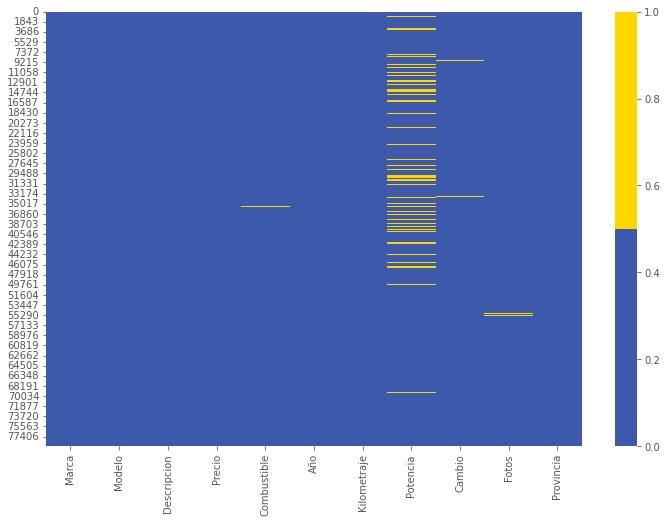

In [39]:
fig, ax = plt.subplots()
sns.heatmap(df_2mano[df_2mano.columns].isnull(), 
            cmap=sns.color_palette(['#3D59AB', '#FFD700'])) # Amarillo es missing y azul no es missing.

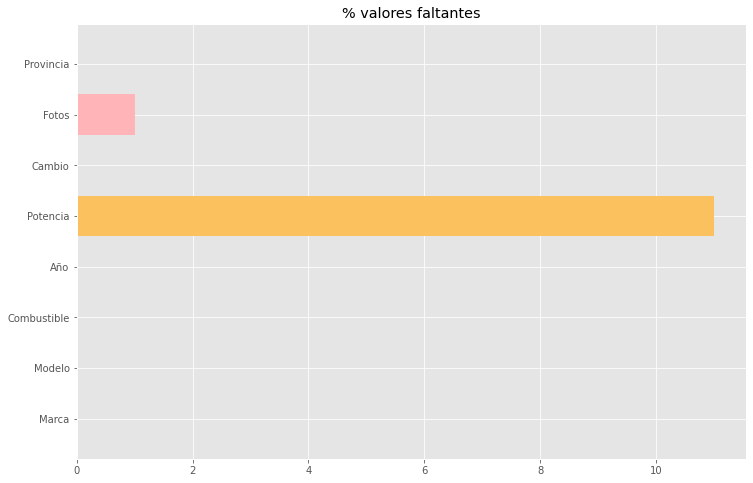

In [40]:
for nombre in df_2mano.columns:
    columna = df_2mano[nombre]
    NaN = sum(columna.isnull())/len(df_2mano)
    if NaN > 0:
      plt.barh(nombre, round(NaN*100))
      plt.title("% valores faltantes")

In [41]:
df_2mano_copy = df_2mano.copy()

created missing indicator for: Marca
created missing indicator for: Modelo
created missing indicator for: Combustible
created missing indicator for: Año
created missing indicator for: Potencia
created missing indicator for: Cambio
created missing indicator for: Fotos
created missing indicator for: Provincia


<AxesSubplot:xlabel='index'>

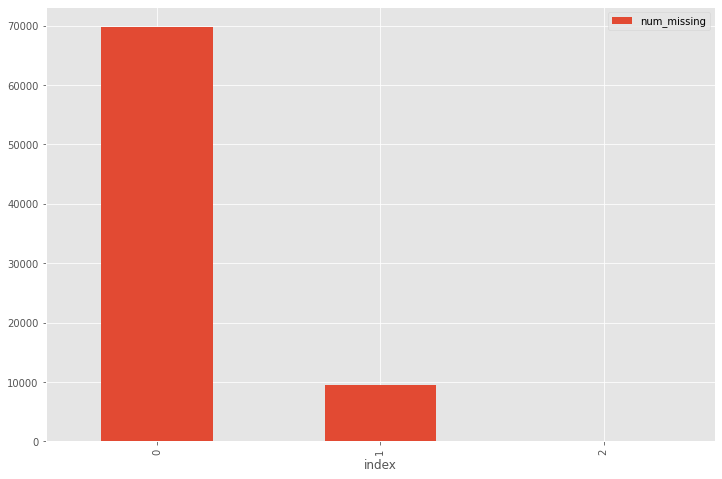

In [42]:
#Crear un histograma con missings

# first create missing indicator for features with missing data
for col in df_2mano_copy.columns:
    missing = df_2mano_copy[col].isnull() #array of false and true if there is missing value
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))  #name of column with mising values
        df_2mano_copy['{}_ismissing'.format(col)] = missing #create dataframe with the name of the column +is_missing
        
# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_2mano_copy.columns if 'ismissing' in col]
df_2mano_copy['num_missing'] = df_2mano_copy[ismissing_cols].sum(axis=1) #add one column with num of missing in each row
df_2mano_copy['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Se observa que la mayoría de instancias no tienen missing values. Una 10000 tiene un valor perdido y algunas tienen 2 valores pérdidos

Comenzamos analizando los missing values de 'Marca'

In [43]:
df_2mano.loc[df_2mano['Marca'].isna()]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
5659,NaN,D2S,D2S 27kW 3p.,21495,Eléctrico,2021.0,3,37.0,Automático,16.0,Burgos
47381,NaN,D2S,D2S 27kW 3p.,21495,Eléctrico,2021.0,6,37.0,Automático,15.0,Burgos


A partir del modelo y de la descripción, haciendo una busqueda en internet es sencillo saber que la marca que corresponde al modelo D2S de 27 kW es Invicta

In [44]:
df_2mano['Marca'] = df_2mano['Marca'].fillna('INVICTA')

Verificamos ahora los modelos faltantes en el dataset

In [45]:
df_2mano.loc[df_2mano['Modelo'].isna()]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
1330,SEAT,NaN,SEAT Cordoba 5p.,1850,Diésel,2004.0,248000,NaN,Manual,6.0,Córdoba
25574,SEAT,NaN,SEAT Toledo 4p.,1100,Diésel,2002.0,369000,NaN,Manual,4.0,Toledo
31826,SEAT,NaN,SEAT,2400,Diésel,2008.0,370000,NaN,Manual,4.0,Toledo
32831,SEAT,NaN,SEAT Leon 5p.,3500,Diésel,2003.0,333000,NaN,Manual,5.0,León
37683,SEAT,NaN,SEAT Toledo 1.9 TDI STELLA 110CV 4p.,860,Diésel,1999.0,367963,110.0,Manual,12.0,Toledo


Con la descripción es posible rellenar 4 de las instancias que le falta el modelo, pero hay una que la descripción es tan vaga que se decide eliminarla

In [46]:
df_2mano['Modelo'].iloc[1330] = 'Cordoba'
df_2mano['Modelo'].iloc[[25574, 37683]] = 'Toledo'
df_2mano['Modelo'].iloc[32831] = 'Leon'
df_2mano.drop(ds_datamarket.iloc[31826].name, inplace = True)

Se resetean los índices

In [47]:
df_2mano.reset_index(drop = True, inplace = True)

Se tratan ahora los missing values de la característica 'Combustible'

In [48]:
df_2mano.loc[df_2mano['Combustible'].isna()]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
1921,BMW,Serie 6,BMW Serie 6 2p.,17000,NaN,2008.0,180000,NaN,Automático,0.0,Barcelona
1942,FIAT,Tipo,FIAT Tipo 5p.,13900,NaN,2019.0,31000,NaN,Manual,7.0,Madrid
3293,ALFA ROMEO,147,ALFA ROMEO 147 3p.,4500,NaN,2008.0,145345,NaN,Manual,0.0,Madrid
3896,RENAULT,Kangoo,RENAULT,7000,NaN,2012.0,44000,NaN,Automático,4.0,Tenerife
6022,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C 3p.,2500,NaN,2001.0,295000,NaN,Manual,9.0,Madrid
6213,HYUNDAI,IONIQ,HYUNDAI IONIQ 5p.,19500,NaN,2019.0,9938,NaN,Manual,12.0,Huesca
7360,SEAT,Córdoba,SEAT Cordoba 5p.,1700,NaN,2008.0,205555,NaN,Manual,3.0,Valladolid
7660,TOYOTA,Auris,TOYOTA Auris 5p.,14500,NaN,2016.0,71601,NaN,Automático,28.0,Badajoz
9647,FORD,Focus,FORD Focus 5p.,23900,NaN,2020.0,7,NaN,Manual,30.0,Badajoz
12732,HYUNDAI,IONIQ,HYUNDAI IONIQ 5p.,17900,NaN,2017.0,13163,NaN,Automático,21.0,Badajoz


Por la descripción se ve que hay varios modelos del HYUNDAI Ioniq, que es un coche que es eléctrico o híbrido. Así que cambia el combustible estos a Eléctrico

In [49]:
index = df_2mano[(df_2mano['Modelo'] == 'IONIQ') & (df_2mano['Combustible'].isna())].index
df_2mano['Combustible'].iloc[index] = 'Eléctrico'

Y también se identifica fácilmente que hay un par Prius+, que es un híbrido

In [50]:
index = df_2mano[(df_2mano['Modelo'] == 'Prius+') & (df_2mano['Combustible'].isna())].index
df_2mano['Combustible'].iloc[index] = 'Híbrido'

Del resto no hay información a primera vista, de modo que se le asinga como combustible 'Gasolina', asumiendo que es lo más habitual en los coches

In [51]:
df_2mano['Combustible'] = df_2mano['Combustible'].fillna('Gasolina')

Continuamos con los valores faltantes de 'Año'

In [52]:
df_2mano.loc[df_2mano['Año'].isna()]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
31025,KIA,Stonic,KIA Stonic 1.0 TGDi 74kW 100CV Concept 5p.,16850,Gasolina,NaN,1,100.0,Manual,15.0,Sevilla
42074,SEAT,Arona,SEAT Arona 1.0 TSI 85kW 115CV Xcellence Ecomot...,22500,Gasolina,NaN,1,115.0,Manual,14.0,Sevilla


Por el kilometraje parecen que son vehículos de kilómetro 0, así que les asignamos el año más reciente que haya en en el dataset, asumiendo que será similar

In [53]:
df_2mano['Año'].max()

2022.0

Vemos que los datos más recientes de este dataset corresponde a 2022

In [54]:
df_2mano['Año'] = df_2mano['Año'].fillna(df_2mano['Año'].max())

Hay casi 9000 instancias en las que falta la característica 'Potencia'. 

Vemos si en la descripción aparecen palabras clave para obtener la potencia

Para eso, primero cambiamos los términos relacionados a CV

In [55]:
df_2mano['Descripcion'] = df_2mano['Descripcion'].str.replace('cv', 'CV').str.replace('Cv', 'CV').str.replace('cV', 'CV')
df_2mano['Descripcion'] = df_2mano['Descripcion'].str.replace('CV', ' CV')

De este modo, en la 'Descripcion' las potencias aparecerán en formato XXX CV

Las potencias de los coches tienen 2 o 3 dígitos. De modo que creamos dos características auxiliares que nos permitan extraer la información

In [56]:
df_2mano['Potencia aux3'] = df_2mano['Descripcion'].str.extract(r'(\d{3}\s+CV)')
df_2mano['Potencia aux2'] = df_2mano['Descripcion'].str.extract(r'(\d{2}\s+CV)')

Eliminamos el string ' CV' que acompaña a los números creados y los convertimos a formato numérico

In [57]:
df_2mano['Potencia aux3'] = df_2mano['Potencia aux3'].str.replace(' CV', '')
df_2mano['Potencia aux2'] = df_2mano['Potencia aux2'].str.replace(' CV', '')
df_2mano['Potencia aux3'] = pd.to_numeric(df_2mano['Potencia aux3'])
df_2mano['Potencia aux2'] = pd.to_numeric(df_2mano['Potencia aux2'])

Buscamos ahora las instancias que contienen valores de 'CV' en la descripción y valores NaN en la característica 'Potencia'

In [58]:
index = df_2mano[(df_2mano['Descripcion'].str.contains('CV')) & (df_2mano['Potencia'].isna())].index
df_2mano.iloc[index]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia,Potencia aux3,Potencia aux2
609,FIAT,500,FIAT 500 1.2 8v 51kW 69 CV Lounge 3p.,8200,Gasolina,2018.0,56168,NaN,Manual,22.0,Valencia,NaN,69.0
5142,FIAT,500,FIAT 500 1.2 8v 51kW 69 CV Lounge 3p.,8300,Gasolina,2018.0,39800,NaN,Manual,20.0,Valencia,NaN,69.0
11659,SKODA,Kodiaq,SKODA Kodiaq 1.5 TSI 110KW 150 CV DSG 4x2 Ambi...,29990,Gasolina,2019.0,10000,NaN,Manual,5.0,Vizcaya,150.0,50.0
12411,FIAT,Talento,FIAT Talento 1.2 SX Largo 1.6 EcoJet 89 kW 120...,19800,Diésel,2019.0,28900,NaN,Manual,32.0,Valencia,120.0,20.0
13055,SKODA,Octavia,SKODA Octavia Combi 1.0 TSI 85KW 115 CV Ambiti...,18091,Gasolina,2019.0,15,NaN,Manual,5.0,Vizcaya,115.0,15.0
21013,VOLKSWAGEN,Touran,VOLKSWAGEN Touran Business 1.2 TSI 81kW 110 CV...,16400,Gasolina,2018.0,52900,NaN,Manual,19.0,Valencia,110.0,10.0
25852,KIA,Sportage,KIA Sportage 1.6 CRDi 100kW 136 CV Drive 4x2 5p.,19800,Diésel,2019.0,39900,NaN,Manual,26.0,Valencia,136.0,36.0
25958,FIAT,500,FIAT 500 Lounge 1.2 8v 51KW 69 CV 3p.,9490,Gasolina,2019.0,32900,NaN,Manual,23.0,Valencia,NaN,69.0
29311,KIA,Sportage,KIA Sportage 1.6 CRDi 100kW 136 CV Drive 4x2 5p.,19300,Diésel,2019.0,51200,NaN,Manual,31.0,Valencia,136.0,36.0
29541,SKODA,Kamiq,SKODA Kamiq 1.0 TSI 85kW 115 CV DSG Style 5p.,22000,Gasolina,2020.0,1500,NaN,Manual,5.0,Vizcaya,115.0,15.0


In [59]:
len(index)

26

Se observa que hay un total de 26 instancias que tenían información sobre su 'Potencia' pero no estaban en la columna reflejado.

Rellenamos los datos faltantes de 'Potencia' que están en 'Potencia aux3' (para los que tenían 3 dígitos en la 'Descripción') y en 'Potencia aux2' (para los que tenían 2). Hay que hacerlo en ese orden, puesto que en 'Potencia aux2' aparecen los dos últimos dígitos de 'Potencia aux3'

Comprobamos que el procedimiento se ha hecho correctamente

In [60]:
df_2mano['Potencia'] = df_2mano['Potencia'].fillna(df_2mano['Potencia aux3'])
df_2mano['Potencia'] = df_2mano['Potencia'].fillna(df_2mano['Potencia aux2'])

In [61]:
df_2mano.iloc[index]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia,Potencia aux3,Potencia aux2
609,FIAT,500,FIAT 500 1.2 8v 51kW 69 CV Lounge 3p.,8200,Gasolina,2018.0,56168,69.0,Manual,22.0,Valencia,NaN,69.0
5142,FIAT,500,FIAT 500 1.2 8v 51kW 69 CV Lounge 3p.,8300,Gasolina,2018.0,39800,69.0,Manual,20.0,Valencia,NaN,69.0
11659,SKODA,Kodiaq,SKODA Kodiaq 1.5 TSI 110KW 150 CV DSG 4x2 Ambi...,29990,Gasolina,2019.0,10000,150.0,Manual,5.0,Vizcaya,150.0,50.0
12411,FIAT,Talento,FIAT Talento 1.2 SX Largo 1.6 EcoJet 89 kW 120...,19800,Diésel,2019.0,28900,120.0,Manual,32.0,Valencia,120.0,20.0
13055,SKODA,Octavia,SKODA Octavia Combi 1.0 TSI 85KW 115 CV Ambiti...,18091,Gasolina,2019.0,15,115.0,Manual,5.0,Vizcaya,115.0,15.0
21013,VOLKSWAGEN,Touran,VOLKSWAGEN Touran Business 1.2 TSI 81kW 110 CV...,16400,Gasolina,2018.0,52900,110.0,Manual,19.0,Valencia,110.0,10.0
25852,KIA,Sportage,KIA Sportage 1.6 CRDi 100kW 136 CV Drive 4x2 5p.,19800,Diésel,2019.0,39900,136.0,Manual,26.0,Valencia,136.0,36.0
25958,FIAT,500,FIAT 500 Lounge 1.2 8v 51KW 69 CV 3p.,9490,Gasolina,2019.0,32900,69.0,Manual,23.0,Valencia,NaN,69.0
29311,KIA,Sportage,KIA Sportage 1.6 CRDi 100kW 136 CV Drive 4x2 5p.,19300,Diésel,2019.0,51200,136.0,Manual,31.0,Valencia,136.0,36.0
29541,SKODA,Kamiq,SKODA Kamiq 1.0 TSI 85kW 115 CV DSG Style 5p.,22000,Gasolina,2020.0,1500,115.0,Manual,5.0,Vizcaya,115.0,15.0


Y quitamos las columnas 'Potencia aux2' y 'Potencia aux3', ya que no son necesarias en adelante

In [62]:
df_2mano.drop(['Potencia aux2', 'Potencia aux3'], inplace = True, axis = 1)

Para el resto, vamos a asignar la potencia que corresponde a la mediana del mismo valor de las características 'Marca' y 'Modelo'

Primeros convertimos 'Potencia' a numérico

In [63]:
df_2mano['Potencia'] = pd.to_numeric(df_2mano['Potencia'])

In [64]:
medianas = df_2mano.groupby(['Marca', 'Modelo'])['Potencia'].transform('median')
df_2mano['Potencia'] = df_2mano['Potencia'].fillna(medianas)

In [65]:
df_2mano.loc[df_2mano['Potencia'].isna()]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
257,MERCEDES-BENZ,400,MERCEDES-BENZ,2650,Diésel,2003.0,245000,NaN,Manual,0.0,Barcelona
430,MG,ZT,MG ZT 5p.,1200,Gasolina,2004.0,128000,NaN,Manual,7.0,Toledo
553,SKODA,Octavia Tour,SKODA Octavia Tour 5p.,3500,Diésel,2008.0,227000,NaN,Manual,0.0,Madrid
733,SEAT,Malaga,SEAT Malaga 5p.,7000,Diésel,1980.0,258000,NaN,Manual,0.0,Murcia
1330,SEAT,Cordoba,SEAT Cordoba 5p.,1850,Diésel,2004.0,248000,NaN,Manual,6.0,Córdoba
...,...,...,...,...,...,...,...,...,...,...,...
69578,FERRARI,550,FERRARI 550 Barchetta Pininfarina,385000,Gasolina,2002.0,5000,NaN,Manual,32.0,Málaga
69788,McLaren,720S,McLaren 720S Spider,306900,Gasolina,2019.0,5980,NaN,Automático,28.0,Madrid
72418,AC,Cobra,AC Cobra MkIII (Réplica) 427,79999,Gasolina,1998.0,10000,NaN,Manual,25.0,Málaga
76072,FERRARI,550,FERRARI 550 Maranello,115000,Gasolina,1999.0,55000,NaN,Manual,13.0,Barcelona


Siguen quedando 146 filas que no tienen valores repetidos de marca y modelo. Para estos, asignaremos la 'Potencia con la mediana agrupada por 'Marca'

In [66]:
medianas = df_2mano.groupby(['Marca'])['Potencia'].transform('median')
df_2mano['Potencia'] = df_2mano['Potencia'].fillna(medianas)

In [67]:
df_2mano.loc[df_2mano['Potencia'].isna()]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
5302,VAZ,111 Stawra,VAZ 111 Stawra 5p.,500,Gasolina,2004.0,114000,NaN,Manual,2.0,Lleida
18467,LADA,Niva,LADA,2800,Gasolina,1999.0,98000,NaN,Manual,0.0,Tarragona
33986,ARO,10,ARO 10 5p.,1000,Gasolina,2004.0,17000,NaN,Manual,3.0,Córdoba
45790,LADA,Niva,LADA Niva 5p.,7000,Diésel,2002.0,86000,NaN,Manual,9.0,Castellón
72418,AC,Cobra,AC Cobra MkIII (Réplica) 427,79999,Gasolina,1998.0,10000,NaN,Manual,25.0,Málaga


Finalmente, quedan 5 vehículos que proporcionar datos. Son marcas poco habituales, con una antigüedad grande y con una descripción vaga. Se decide eliminar estas instacias del dataframe.

In [68]:
index = df_2mano[(df_2mano['Potencia'].isna())].index
df_2mano.drop(index, inplace = True)
df_2mano.reset_index(drop = True, inplace = True)

Analizamos los missing values del tipo de cambio

In [69]:
df_2mano.loc[df_2mano['Cambio'].isna()]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
541,VOLKSWAGEN,Golf,VOLKSWAGEN Golf 1.6 TDI 105 CV BlueMotion 5p.,8700,Diésel,2010.0,80000,105.0,NaN,12.0,Cáceres
786,HYUNDAI,IONIQ,HYUNDAI IONIQ 1.6 GDI HEV Klass DT 5p.,18890,Híbrido,2019.0,16018,141.0,NaN,18.0,Sevilla
1537,MAZDA,CX-5,MAZDA CX-5 2.2 DE 4WD AT Lux.P.T.SR CB 5p.,16800,Diésel,2014.0,95000,175.0,NaN,8.0,Cádiz
1666,VOLKSWAGEN,Golf,VOLKSWAGEN Golf Advance 1.6 TDI 105 CV BMT 5p.,13400,Diésel,2015.0,32305,105.0,NaN,32.0,Madrid
1980,JAGUAR,F-Pace,JAGUAR F-Pace 2.0L i4D 177kW RSport AWD Auto 5p.,36000,Diésel,2018.0,110000,240.0,NaN,4.0,Murcia
...,...,...,...,...,...,...,...,...,...,...,...
48188,DACIA,Dokker,DACIA Dokker Ambiance dci 66kW 90 CV N1 2017,9300,Diésel,2017.0,85000,90.0,NaN,13.0,Asturias
48380,PEUGEOT,207,PEUGEOT 207 SW Confort 1.6 HDI 90 5p.,3000,Diésel,2007.0,200000,90.0,NaN,6.0,Valencia
49243,VOLKSWAGEN,Multivan,VOLKSWAGEN Multivan 2.5 TDI 130 CV Comfortline...,15990,Diésel,2007.0,246000,130.0,NaN,24.0,Vizcaya
49605,AUDI,A7,AUDI A7 Sportback 3.0 TDI 245 quattro tiptroni...,19900,Diésel,2012.0,205000,245.0,NaN,8.0,Córdoba


Se observa que hay algunos que son coches eléctricos, híbridos o híbridos enchufables. Todos esos cambios son automáticos

In [70]:
lista = ['Híbrido enchufable', 'Eléctrico', 'Híbrido']
for tipo in lista:
  index = df_2mano[(df_2mano['Combustible'] == tipo) & (df_2mano['Cambio'].isna())].index
  df_2mano['Cambio'].iloc[index] = 'Automático'

Se comprueba si en la descripción aparece alguna de las palabras relacionadas con los tipos de cambios automáticos que existen (consultado en: https://www.quecochemecompro.com/blog/tipos-de-cambios-automaticos/) 

In [71]:
cambios = ['tronic', 'Tronic', 'TRONIC', 'EAT', 'Skyactiv', 'Aut', 'aut','Auto', 'AUTO', 'auto', 'Multidrive']
for cambio in cambios:
  index = df_2mano[(df_2mano['Descripcion'].str.contains(pat = cambio)) & (df_2mano['Cambio'].isna())].index
  df_2mano['Cambio'].iloc[index] = 'Automático'

In [72]:
df_2mano.loc[df_2mano['Cambio'].isna()]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
541,VOLKSWAGEN,Golf,VOLKSWAGEN Golf 1.6 TDI 105 CV BlueMotion 5p.,8700,Diésel,2010.0,80000,105.0,NaN,12.0,Cáceres
1537,MAZDA,CX-5,MAZDA CX-5 2.2 DE 4WD AT Lux.P.T.SR CB 5p.,16800,Diésel,2014.0,95000,175.0,NaN,8.0,Cádiz
1666,VOLKSWAGEN,Golf,VOLKSWAGEN Golf Advance 1.6 TDI 105 CV BMT 5p.,13400,Diésel,2015.0,32305,105.0,NaN,32.0,Madrid
2119,PEUGEOT,Expert,PEUGEOT Expert Furgon Pro 2.0 BlueHDi 120 SS S...,19900,Diésel,2019.0,20000,122.0,NaN,14.0,A Coruña
2414,CITROEN,C4 Cactus,CITROEN C4 Cactus BlueHDi 74KW 100 CV SS Shine...,17500,Diésel,2019.0,2140,99.0,NaN,54.0,Cantabria
...,...,...,...,...,...,...,...,...,...,...,...
47849,CITROEN,Berlingo,CITROEN Berlingo Talla M BlueHDi 55kW CONTROL,11000,Diésel,2019.0,15298,75.0,NaN,13.0,Baleares
48042,PEUGEOT,208,PEUGEOT 208 5P ACTIVE 1.2L PureTech 82 SS ETG5...,6000,Gasolina,2014.0,98000,82.0,NaN,10.0,Madrid
48188,DACIA,Dokker,DACIA Dokker Ambiance dci 66kW 90 CV N1 2017,9300,Diésel,2017.0,85000,90.0,NaN,13.0,Asturias
48380,PEUGEOT,207,PEUGEOT 207 SW Confort 1.6 HDI 90 5p.,3000,Diésel,2007.0,200000,90.0,NaN,6.0,Valencia


Y se asume que el resto son de tipo manual, al ser lo más común

In [73]:
df_2mano['Cambio'] = df_2mano['Cambio'].fillna('Manual')

Para las fotografias, se asume que un missing value equivale a que no hay fotos de ese coche

In [74]:
df_2mano['Fotos'] = df_2mano['Fotos'].fillna(0)

Por último, vemos que sucede con las provincias

In [75]:
df_2mano.loc[df_2mano['Provincia'].isna()]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
4657,FORD,Fusion,FORD Fusion 1.4 TDCI Elegance,500,Diésel,2003.0,279000,68.0,Manual,5.0,NaN
5010,HYUNDAI,Getz,HYUNDAI Getz 1.5 CRDi 88 CV AA 5p.,2500,Diésel,2006.0,132000,88.0,Manual,9.0,NaN
10769,AUDI,A4,AUDI A4 Avant 2.0 TDI 140 CV 5p.,5500,Diésel,2007.0,180000,140.0,Manual,10.0,NaN
14162,VOLKSWAGEN,Touran,VOLKSWAGEN Touran 2.0 TDI 140 Traveller 5p.,4990,Diésel,2007.0,268000,140.0,Manual,9.0,NaN
18124,CITROEN,C3,CITROEN C3 1.4 HDi X 5p.,2900,Diésel,2002.0,177572,70.0,Manual,6.0,NaN
32021,SUBARU,Impreza,SUBARU Impreza 2.0R SPORT 5p.,7500,Gasolina,2009.0,151000,150.0,Manual,9.0,NaN


Le asignamos la provincia que sea más repetitiva en el dataset

In [76]:
df_2mano['Provincia'].mode()

0    Madrid
dtype: object

In [77]:
df_2mano['Provincia'] = df_2mano['Provincia'].fillna(str(df_2mano['Provincia'].mode()))

In [78]:
df_2mano

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
0,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000.0,227000,110.0,Manual,5.0,Navarra
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82 CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,Manual,6.0,Tenerife
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100 CV Ambie...,7851,Diésel,2016.0,103000,100.0,Manual,10.0,Barcelona
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,Manual,9.0,Navarra
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,Manual,4.0,Sevilla
...,...,...,...,...,...,...,...,...,...,...,...
79197,RENAULT,Scénic,RENAULT Scénic Berlina Manual de 5 Puertas,5900,Diésel,2010.0,194000,105.0,Manual,17.0,Cantabria
79198,SEAT,Ibiza,SEAT Ibiza 1.0 S&S Style 75,12799,Gasolina,2019.0,40513,75.0,Manual,25.0,Barcelona
79199,VOLVO,V90,VOLVO V90 Cross Country T5 AWD Aut. 254,36900,Gasolina,2017.0,50000,254.0,Automático,46.0,Vizcaya
79200,RENAULT,Mégane,RENAULT Mégane 1.9dCi Privilege,8990,Diésel,2009.0,103872,130.0,Manual,9.0,Cáceres


####Procesado del dataframe de vehículos de 2ª mano

Terminamos acondicionando el dataset para fijar variables numéricas, homogeneizar las categorías dentro de las clases, etc.

In [79]:
df_2mano.dtypes

Marca           object
Modelo          object
Descripcion     object
Precio          object
Combustible     object
Año            float64
Kilometraje     object
Potencia       float64
Cambio          object
Fotos          float64
Provincia       object
dtype: object

Se comienza por las 'Marca'

In [80]:
lista = sorted(df_2mano['Marca'].unique())
for a, b, c, d, e in zip (lista[::5], lista[1::5], lista[2::5], lista[3::5], lista[4::5]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e))

ABARTH              ALFA ROMEO          ALPINA              ALPINE              ASTON MARTIN
AUDI                AUSTIN              BENTLEY             BERTONE             BMW
BUGATTI             CADILLAC            CHEVROLET           CHRYSLER            CITROEN
CORVETTE            CUPRA               DACIA               DAEWOO              DAIHATSU
DFSK                DODGE               DR                  DS                  FERRARI
FIAT                FORD                GALLOPER            GMC                 HONDA
HUMMER              HURTAN              HYUNDAI             INFINITI            INVICTA
ISUZU               IVECO               JAGUAR              JEEP                KARMA
KIA                 KOENIGSEGG          KTM                 LAMBORGHINI         LANCIA
LAND-ROVER          LDV                 LEVC                LEXUS               LINCOLN
LOTUS               MAHINDRA            MASERATI            MAXUS               MAYBACH
MAZDA               MERCEDES-BENZ  

Se cambia la marca McLaren a mayúsculas, para homogeneizar

In [81]:
df_2mano['Marca'] = df_2mano['Marca'].str.replace('McLaren', 'MCLAREN')

In [82]:
dic = df_2mano['Marca'].value_counts().to_dict()
dic

{'BMW': 7210,
 'MERCEDES-BENZ': 6943,
 'VOLKSWAGEN': 6646,
 'AUDI': 6054,
 'PEUGEOT': 5002,
 'FORD': 4671,
 'RENAULT': 4334,
 'SEAT': 4107,
 'OPEL': 4062,
 'CITROEN': 4054,
 'TOYOTA': 2842,
 'NISSAN': 2401,
 'FIAT': 2026,
 'HYUNDAI': 1921,
 'KIA': 1921,
 'VOLVO': 1464,
 'MINI': 1372,
 'PORSCHE': 1176,
 'LAND-ROVER': 1117,
 'SKODA': 979,
 'MAZDA': 785,
 'HONDA': 642,
 'JEEP': 637,
 'JAGUAR': 621,
 'LEXUS': 606,
 'MITSUBISHI': 515,
 'DACIA': 512,
 'ALFA ROMEO': 445,
 'SUZUKI': 429,
 'SMART': 363,
 'SSANGYONG': 315,
 'CHEVROLET': 304,
 'FERRARI': 269,
 'DS': 255,
 'CUPRA': 212,
 'MASERATI': 190,
 'SUBARU': 186,
 'ABARTH': 181,
 'CHRYSLER': 170,
 'LAMBORGHINI': 151,
 'INFINITI': 130,
 'ASTON MARTIN': 110,
 'SAAB': 101,
 'BENTLEY': 89,
 'DODGE': 86,
 'LANCIA': 81,
 'TESLA': 63,
 'DAEWOO': 54,
 'IVECO': 53,
 'ROVER': 42,
 'CADILLAC': 33,
 'MCLAREN': 29,
 'ROLLS-ROYCE': 25,
 'DFSK': 20,
 'MG': 18,
 'TATA': 17,
 'BUGATTI': 15,
 'HUMMER': 14,
 'MAHINDRA': 13,
 'LINCOLN': 11,
 'GALLOPER': 11,
 '

Se observa que hay marcas que tienen muchas instancias frente a otras que tienen muy pocas. 

Respecto a 'Modelo'

In [83]:
len(df_2mano['Modelo'].unique())

1147

Hay 1147 modelos diferentes de vehículo

In [84]:
lista = sorted(df_2mano['Modelo'].unique())
for a, b, c, d, e in zip (lista[::5], lista[1::5], lista[2::5], lista[3::5], lista[4::5]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e))

02                  100                 100 NX              1007                100D
106                 107                 108                 121                 124
124 Spider          140D                146                 147                 156
159                 164                 180D                19                  190
200                 2008                205                 206                 206 +
206 SW              207                 207 +               208                 208 XAD
220                 230                 240                 25                  260
280                 2CV                 3                   300                 300 GT
300 ZX              3000                3008                3008 Hybrid         300C
300M                306                 307                 307 SW              308
309                 3200                323                 33                  350
350Z                355                 360                 370Z 

Hay muchos modelos diferentes. Agrupamos por marca, para poder ver las repeticiones

In [85]:
print(df_2mano.groupby(['Marca', 'Modelo']).size().to_dict())

{('ABARTH', '124'): 2, ('ABARTH', '124 Spider'): 2, ('ABARTH', '500'): 118, ('ABARTH', '500C'): 22, ('ABARTH', '595'): 34, ('ABARTH', 'Punto'): 1, ('ABARTH', 'Punto EVO'): 2, ('ALFA ROMEO', '146'): 1, ('ALFA ROMEO', '147'): 50, ('ALFA ROMEO', '156'): 24, ('ALFA ROMEO', '159'): 36, ('ALFA ROMEO', '164'): 1, ('ALFA ROMEO', '33'): 6, ('ALFA ROMEO', '4C'): 1, ('ALFA ROMEO', 'Brera'): 11, ('ALFA ROMEO', 'GT'): 22, ('ALFA ROMEO', 'GTV'): 4, ('ALFA ROMEO', 'Giulia'): 62, ('ALFA ROMEO', 'Giulietta'): 80, ('ALFA ROMEO', 'MiTo'): 34, ('ALFA ROMEO', 'Spider'): 5, ('ALFA ROMEO', 'Stelvio'): 102, ('ALFA ROMEO', 'Tonale'): 6, ('ALPINA', 'B10'): 1, ('ALPINA', 'XD3'): 3, ('ALPINE', 'A110'): 2, ('ASTON MARTIN', 'DB11'): 11, ('ASTON MARTIN', 'DB7'): 4, ('ASTON MARTIN', 'DB9'): 5, ('ASTON MARTIN', 'DBS'): 10, ('ASTON MARTIN', 'DBX'): 16, ('ASTON MARTIN', 'Rapide'): 7, ('ASTON MARTIN', 'V8 Vantage'): 1, ('ASTON MARTIN', 'Vanquish'): 7, ('ASTON MARTIN', 'Vantage'): 47, ('ASTON MARTIN', 'Vantage V8'): 2, ('

Se puede observar que hay muchos modelos de marcas que son básicamente el mismo modelo, con pequeñas variaciones o, incluso, en los que sólo cambia la escritura del modelo. De modo que se va a proceder a unificar diferentes modelos

Vamos a crear variables auxiliares para poder cambiar el tipo de modelo y unificar

In [86]:
abarth124 = ['124', '124 Spider']
abarth500 = ['500', '500C']
abarthPunto = ['Punto', 'Punto EVO']
astonmartinVantage = ['Vantage', 'Vantage V8']
audiA4 = ['A4', 'A4 Allroad', 'A4 Allroad Quattro']
audiA6 = ['A6', 'A6 allroad quattro']
audiAllroad = ['Allroad', 'Allroad Quattro']
audiCoupe = ['Coupe', 'Coupé']
audiQ3 = ['Q3', 'Q3 Sportback']
audiTT = ['TT', 'TT RS', 'TTS']
audiEtron= ['e-tron', 'e-tron Sportback']
bentleyContinental = ['Continental', 'Continental Flying Spur', 'Continental GT', 'Continental GTC']
bentleyFlying = ['Flying', 'Flying Spur']
bmwSerie2 = ['Serie 2', 'Serie 2 Active Tourer', 'Serie 2 Gran Tourer']
chevroletCorvette = ['Corvette', 'Corvette Stingray']
ChryslerPt = ['PT', 'PT Cruiser']
ChryslerSebring = ['Sebring', 'Sebring 200C']
CitroenEvasion = ['Evasion', 'Evasión']
CitroenSpacetourer = ['SpaceTourer', 'Spacetourer']
CitroenC4 = ['C4', 'ë-C4']
DR3 = ['3', 'DR3']
DS3 = ['DS 3', 'DS3']
DS4 = ['DS 4', 'DS4']
DS5 = ['DS 5', 'DS5']
DS7 = ['DS 7', 'DS7']
DS9 = ['DS 9', 'DS9']
FerrariGtc = ['GTC', 'GTC4']
Fiat124 = ['124', '124 Spider']
FiatDoblo = ['Doblo', 'Doblò', 'Doblò Cargo', 'Doblò Panorama', 'Dobló']
FiatGrande = ['Grande', 'Grande Punto']
FiatLinea = ['Linea', 'Línea']
FiatPanda = ['Panda', 'Panda Classic']
FiatPunto = ['Punto', 'Punto Classic', 'Punto EVO']
FordBmax = ['B-MAX', 'B-Max']
FordKa = ['KA', 'Ka', 'Ka+']
FordSmax = ['S-MAX', 'S-Max']
FordTourneo = ['Tourneo', 'Tourneo Connect', 'Tourneo Courier', 'Tourneo Custom']
FordTransit = ['Transit', 'Transit Connect', 'Transit Courier', 'Transit Custom']
GalloperSuper = ['Super', 'Super Exceed']
HondaHonda = ['Honda', 'Honda e']
HyundaiAtos = ['Atos', 'Atos Prime']
HyundaiH1 = ['H-1', 'H-1 Travel']
HyundaiIoniq = ['IONIQ', 'Ioniq']
HyundaiSantafe = ['Santa', 'Santa Fe']
HyundaiTucson = ['TUCSON', 'Tucson']
HyundaiI20 = ['i20', 'i20 Active']
JeepGrand = ['Grand', 'Grand Cherokee']
JeepWrangler = ['Wrangler', 'Wrangler Unlimited']
KiaCeed = ['Ceed', 'Ceed Tourer', 'Cee´d', 'ceed', 'ceed Sportswagon', 'ceed Sporty Wagon', 'pro_ceed GT']
KiaNiroPHEV = ['Niro PHEV', 'Niro Hïbrido Enchufable']
KiaProceed = ['Pro Ceed', 'ProCeed']
KiaSephia = ['Sephia', 'Sephia II']
LandroverDiscovery = ['Discovery', 'Discovery 4', 'Discovery Sport']
LandroverRangeRover = ['Range Rover', 'Range', 'Range Rover Sport', 'Range Rover Velar']
LexusGs = ['GS', 'GS300', 'GS450h']
LexusIs = ['IS', 'IS200', 'IS220d', 'IS250', 'IS300']
LexusLs = ['LS', 'LS460']
LexusRx = ['RX', 'RX300', 'RX350', 'RX400h']          
MahindraGoa = ['Goa', 'Goa Pik Up Plus']
MercedesbenzAmg = ['AMG', 'AMG GT', 'Mercedes-AMG GT']
MercedesbenzClasesl = ['Clase SL', 'Clase SL R129']
MiniMini = ['MINI', 'Mini']
MitsubishiEclipse = ['Eclipse', 'Eclipse Cross']
MitsubishiMontero = ['Montero', 'Montero Sport', 'Montero iO']
MitsubishiSpace = ['Space', 'Space Gear', 'Space Star', 'Space Wagon']
Nissan300 = ['300', '300 ZX']
NissanCabstar = ['Cabstar', 'Cabstar E']
NissanJuke = ['JUKE', 'Juke']
NissanLeaf = ['LEAF', 'Leaf']
NissanNt400 = ['NT400', 'NT400 Cabstar']
NissanPatrol = ['Patrol', 'Patrol GR']
NissanQashqai = ['QASHQAI', 'Qashqai']
NissanTerrano = ['Terrano', 'Terrano II']
NissanVanette = ['Vanette', 'Vanette Cargo']
NissanXtrail = ['X-TRAIL', 'X-Trail']
NissanEnv200 = ['e-NV200', 'e-NV200 EVALIA']
OpelCombo = ['Combo', 'Combo Life']
OpelCorsa = ['Corsa', 'Corsa Van', 'Corsa-e']
OpelGrandland = ['Grandland', 'Grandland X']
OpelMokka = ['Mokka', 'Mokka X']
OpelZafira = ['Zafira', 'Zafira Life', 'Zafira Tourer', 'Zafira-e Life']
Peugeot206 = ['206', '206 +', '206 SW']
Peugeot207 = ['207', '207 +']
Peugeot208 = ['208', '208 XAD']
Peugeot307 = ['307', '307 SW']
Peugeot407 = ['407', '407 SW']
PeugeotPartner = ['Partner', 'Partner Origin']
PeugeotIon = ['iOn', 'ion']
PorscheCayenne = ['Cayenne', 'Cayenne Coupé']
RenaultClio = ['Clio', 'Clio 4', 'Clio Campus', 'Clio III']
RenaultKangoo = ['Kangoo', 'Kangoo Combi', 'Kangoo Express', 'Kangoo Furgón', 'Kangoo Z.E.']
RenaultMaster = ['Master', 'Master Propulsión']
RenaultVelsatis = ['Vel', 'Vel Satis']
Saab93 = ['9-3', '9-3X', '93']
SeatAltea = ['Altea', 'Altea Freetrack']
SeatCordoba = ['Cordoba', 'Córdoba']
SeatLeon = ['Leon', 'León']
SkodaOctavia = ['Octavia', 'Octavia Tour']
SmartFortwo = ['Fortwo', 'Smart', 'fortwo', 'smart']
SmartForfour = ['Forfour', 'forfour']
SsangyongKorando = ['Korando', 'Korando KJ']
SsangyongRexton = ['Rexton', 'Rexton II']
SubaruWrx = ['WRX', 'WRX STI']
SuzukiGrandvitara = ['Grand Vitara', 'Grand', 'Grand Vitara XL-7']
SuzukiSx4 = ['SX4', 'SX4 S-Cross']
TataIndica = ['INDICA', 'Indica']
Toyota4runner = ['4-Runner', '4Runner']
ToyotaAvensis = ['Avensis', 'Avensis Verso']
ToyotaLandCruiser = ['Land Cruiser', 'Land', 'Land Cruiser 100', 'Land Cruiser 200', 'Land Cruiser 80', 'Land Cruiser 90']
ToyotaProace = ['Proace', 'Proace City Verso', 'Proace Verso']
ToyotaRav4 = ['RAV-4', 'Rav4']
ToyotaUrbancruiser = ['Urban', 'Urban Cruiser']
VolkswagenGolf = ['Golf', 'Golf Plus', 'Golf Sportsvan']
VolkswagenTiguan = ['Tiguan', 'Tiguan Allspace']
VolkswagenUp = ['Up!', 'up!']
VolvoV60 = ['V60', 'V60 Cross Country']
VolvoV70 = ['V70', 'V70 XC']
VolvoV90 = ['V90', 'V90 Cross Country']

In [87]:
nombre = ['abarth124','abarth500','abarthPunto','astonmartinVantage','audiA4','audiA6','audiAllroad','audiCoupe',
'audiQ3','audiTT','audiEtron','bentleyContinental','bentleyFlying','bmwSerie2','chevroletCorvette','ChryslerPt',
'ChryslerSebring','CitroenEvasion','CitroenSpacetourer','CitroenC4','DR3','DS3','DS4','DS5','DS7','DS9',
'FerrariGtc','Fiat124','FiatDoblo','FiatGrande','FiatLinea','FiatPanda','FiatPunto','FordBmax','FordKa','FordSmax',
'FordTourneo','FordTransit','GalloperSuper','HondaHonda','HyundaiAtos','HyundaiH1','HyundaiIoniq','HyundaiSantafe',
'HyundaiTucson','HyundaiI20','JeepGrand','JeepWrangler','KiaCeed','KiaNiroPHEV','KiaProceed','KiaSephia',
'LandroverDiscovery','LandroverRangeRover','LexusGs','LexusIs','LexusLs','LexusRx','MahindraGoa','MercedesbenzAmg',
'MercedesbenzClasesl','MiniMini','MitsubishiEclipse','MitsubishiMontero','MitsubishiSpace','Nissan300',
'NissanCabstar','NissanJuke','NissanLeaf','NissanNt400','NissanPatrol','NissanQashqai','NissanTerrano',
'NissanVanette','NissanXtrail','NissanEnv200','OpelCombo','OpelCorsa','OpelGrandland','OpelMokka','OpelZafira',
'Peugeot206','Peugeot207','Peugeot208','Peugeot307','Peugeot407','PeugeotPartner','PeugeotIon','PorscheCayenne',
'RenaultClio','RenaultKangoo','RenaultMaster','RenaultVelsatis','Saab93','SeatAltea','SeatCordoba','SeatLeon',
'SkodaOctavia','SmartFortwo','SmartForfour','SsangyongKorando','SsangyongRexton','SubaruWrx','SuzukiGrandvitara',
'SuzukiSx4','TataIndica','Toyota4runner','ToyotaAvensis','ToyotaLandCruiser','ToyotaProace','ToyotaRav4',
'ToyotaUrbancruiser','VolkswagenGolf','VolkswagenTiguan','VolkswagenUp','VolvoV60','VolvoV70','VolvoV90']

In [88]:
grupos = [abarth124, abarth500, abarthPunto, astonmartinVantage, audiA4, audiA6, audiAllroad, audiCoupe, 
audiQ3, audiTT, audiEtron, bentleyContinental, bentleyFlying, bmwSerie2, chevroletCorvette, ChryslerPt, 
ChryslerSebring, CitroenEvasion, CitroenSpacetourer, CitroenC4, DR3, DS3, DS4, DS5, DS7, DS9, 
FerrariGtc, Fiat124, FiatDoblo, FiatGrande, FiatLinea, FiatPanda, FiatPunto, FordBmax, FordKa, FordSmax, 
FordTourneo, FordTransit, GalloperSuper, HondaHonda, HyundaiAtos, HyundaiH1, HyundaiIoniq, HyundaiSantafe, 
HyundaiTucson, HyundaiI20, JeepGrand, JeepWrangler, KiaCeed, KiaNiroPHEV, KiaProceed, KiaSephia, 
LandroverDiscovery, LandroverRangeRover, LexusGs, LexusIs, LexusLs, LexusRx, MahindraGoa, MercedesbenzAmg,
MercedesbenzClasesl, MiniMini, MitsubishiEclipse, MitsubishiMontero, MitsubishiSpace, Nissan300, 
NissanCabstar, NissanJuke, NissanLeaf, NissanNt400, NissanPatrol, NissanQashqai, NissanTerrano, 
NissanVanette, NissanXtrail, NissanEnv200, OpelCombo, OpelCorsa, OpelGrandland, OpelMokka, OpelZafira, 
Peugeot206, Peugeot207, Peugeot208, Peugeot307, Peugeot407, PeugeotPartner, PeugeotIon, PorscheCayenne, 
RenaultClio, RenaultKangoo, RenaultMaster, RenaultVelsatis, Saab93, SeatAltea, SeatCordoba, SeatLeon, 
SkodaOctavia, SmartFortwo, SmartForfour, SsangyongKorando, SsangyongRexton, SubaruWrx, SuzukiGrandvitara, 
SuzukiSx4, TataIndica, Toyota4runner, ToyotaAvensis, ToyotaLandCruiser, ToyotaProace, ToyotaRav4, 
ToyotaUrbancruiser, VolkswagenGolf, VolkswagenTiguan, VolkswagenUp, VolvoV60, VolvoV70, VolvoV90]

Se ha creado una lista con los nombres de las familias de modelos implicadas (lista nombre) y una lista de listas con los modelos de cada nombre (grupos).

Se crean las columnas auxiliares en el dataframe df_2mano

In [89]:
df_2mano[nombre] = ''

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


Se añade un 1 en caso que la instancia tenga un modelo contenido en algunos de los modelos de cada grupo

In [90]:
for lista, n in zip(grupos, nombre):
  for modelo in lista:
    df_2mano[n][df_2mano['Modelo'] == modelo] = 1

Se procede a cambiar el nombre del modelo, de modo que aparecerá el primer nombre de la lista que corresponda para el modelo 

In [91]:
primer = (next(zip(*grupos))) #lista con el primer elemento de cada una de las listas
for lista, n, uno in zip(grupos, nombre, primer):
  for modelo in lista:
    index = df_2mano[(df_2mano['Modelo'] == modelo) & (df_2mano[n] == 1)].index
    df_2mano['Modelo'].iloc[index] = uno

Comprobamos que se ha hecho bien la asignación

In [92]:
df_2mano.loc[df_2mano['LexusIs'] == 1]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,...,ToyotaLandCruiser,ToyotaProace,ToyotaRav4,ToyotaUrbancruiser,VolkswagenGolf,VolkswagenTiguan,VolkswagenUp,VolvoV60,VolvoV70,VolvoV90
886,LEXUS,IS,LEXUS,4500,Diésel,2008.0,254000,177.0,Manual,16.0,...,,,,,,,,,,
1936,LEXUS,IS,LEXUS IS 300h Executive 4p.,19900,Híbrido,2014.0,78500,223.0,Automático,28.0,...,,,,,,,,,,
2927,LEXUS,IS,LEXUS,5200,Gasolina,2000.0,180000,155.0,Manual,0.0,...,,,,,,,,,,
3783,LEXUS,IS,LEXUS IS200 2.0 Auto Premium techo solar 4p.,5490,Gasolina,2002.0,130000,155.0,Automático,18.0,...,,,,,,,,,,
4318,LEXUS,IS,LEXUS IS300 3.0 Premium SportCross navegador 5p.,8500,Gasolina,2003.0,186000,213.0,Automático,10.0,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73344,LEXUS,IS,LEXUS IS 300h Executive,26000,Híbrido,2018.0,63000,223.0,Automático,8.0,...,,,,,,,,,,
74593,LEXUS,IS,LEXUS IS 300h Executive,22900,Híbrido,2015.0,87150,223.0,Automático,24.0,...,,,,,,,,,,
75292,LEXUS,IS,LEXUS IS 300h Executive,19990,Híbrido,2014.0,81146,223.0,Automático,10.0,...,,,,,,,,,,
76200,LEXUS,IS,LEXUS IS 300h Luxury,34900,Híbrido,2017.0,74696,223.0,Automático,24.0,...,,,,,,,,,,


In [93]:
len(df_2mano['Modelo'].unique())

983

Vemos que se ha pasado de 1147 a 983 modelos

Eliminamos las columnas auxiliares que se crearon, al no ser ya necesarias

In [94]:
df_2mano.drop(nombre, inplace = True, axis = 1)

Y, para homogeneizar, convertimos el nombre de los 'Modelos' a variables de tipo string y las ponemos en mayúsculas

In [95]:
df_2mano['Modelo'] = df_2mano['Modelo'].apply(str)

In [96]:
df_2mano['Modelo'] = df_2mano['Modelo'].str.upper()

Continuanos convirtiendo la variable 'Precio' a tipo float

In [97]:
#df_2mano['Precio'] = pd.to_numeric(df_2mano['Precio'])

Obtenemos un error porque alguna de las instancias tiene un valor 'Consultar'. Vemos cuales son:

In [98]:
df_2mano.loc[df_2mano['Precio'] == 'Consultar']

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
50010,JAGUAR,S-TYPE,JAGUAR S-Type 3.0 V6 Executive,Consultar,Gasolina,2004.0,226568,240.0,Automático,18.0,Vizcaya
50103,JAGUAR,X-TYPE,JAGUAR X-Type 2.0D Executive,Consultar,Diésel,2005.0,196000,130.0,Manual,21.0,Vizcaya
50163,JAGUAR,S-TYPE,JAGUAR S-Type 4.0 V8,Consultar,Gasolina,1999.0,150000,276.0,Automático,4.0,Vizcaya
50700,MERCEDES-BENZ,CLASE E,MERCEDES-BENZ Clase E E320,Consultar,Gasolina,1994.0,Manual,194.0,230 cv,15.0,Vizcaya
50751,JAGUAR,XJ,JAGUAR XJ XJ8 3.2 Executive,Consultar,Gasolina,1998.0,203098,240.0,Automático,20.0,Vizcaya
50789,JAGUAR,XJ,JAGUAR XJ XJ6 2.7D V6 Executive Aut.,Consultar,Diésel,2006.0,198000,207.0,Automático,7.0,Vizcaya
50833,JAGUAR,X-TYPE,JAGUAR X-Type 2.0D Executive,Consultar,Diésel,2004.0,241000,130.0,Manual,20.0,Vizcaya
50872,MERCEDES-BENZ,CLASE CL,MERCEDES-BENZ Clase CL 500,Consultar,Gasolina,2000.0,225000,306.0,Automático,17.0,Vizcaya
51074,TATA,SAFARI,TATA Safari Grand 3.0d 4x2,Consultar,Diésel,2007.0,14000,115.0,Manual,13.0,Vizcaya
51141,MASERATI,LEVANTE,MASERATI Levante 425 BITURBO,Consultar,Gasolina,1992.0,Manual,350.0,275 cv,17.0,Vizcaya


Eliminamos estas instancias, puesto la característica 'Precio' es precisamente la variable objetivo a predecir, de modo que no parece razonable hacer estimaciones de valores de precio para completar estas instacias.

In [99]:
index = df_2mano[df_2mano['Precio'] == 'Consultar'].index
df_2mano.drop(index, inplace = True, )
df_2mano.reset_index(inplace = True, drop = True)

Convertimos ahora sí a numérico

In [100]:
df_2mano['Precio'] = pd.to_numeric(df_2mano['Precio'], downcast = 'float')

Homogeniezamos las categorías de la característica combustible. 

Vemos que tipo de combustibles hay en el dataset

In [101]:
print(*df_2mano['Combustible'].unique(), sep = '\n')

Diésel
Gasolina
Híbrido enchufable
Eléctrico
Gas natural (CNG)
Híbrido
Gas licuado (GLP)
Gas
Híbrido Enchufable


Hacemos los siguientes cambios:

* Diésel -> Diesel
* Híbrido enchufable, Híbrido Enchufable, Híbrido -> Hibrido
* Eléctrico -> Electrico
* Gas natural (CNG), Gas -> GNC
* Gas licuado (GLP) -> GLP

De ese modo se homogeniza y quitamos carácteres con tildes, que pueden resultar problemáticas

In [102]:
df_2mano['Combustible'][df_2mano['Combustible'] == 'Diésel'] = 'Diesel'
df_2mano['Combustible'][df_2mano['Combustible'] == 'Híbrido enchufable'] = 'Hibrido'
df_2mano['Combustible'][df_2mano['Combustible'] == 'Híbrido Enchufable'] = 'Hibrido'
df_2mano['Combustible'][df_2mano['Combustible'] == 'Híbrido'] = 'Hibrido'
df_2mano['Combustible'][df_2mano['Combustible'] == 'Eléctrico'] = 'Electrico'
df_2mano['Combustible'][df_2mano['Combustible'] == 'Gas natural (CNG)'] = 'GNC'
df_2mano['Combustible'][df_2mano['Combustible'] == 'Gas'] = 'GNC'
df_2mano['Combustible'][df_2mano['Combustible'] == 'Gas licuado (GLP)'] = 'GLP'

Convertimos la variable 'Año' a tipo int

In [103]:
df_2mano['Año'] = pd.to_numeric(df_2mano['Año'], downcast = 'signed')

También convertimos 'Kilometraje' a int

In [104]:
#df_2mano['Kilometraje'] = pd.to_numeric(df_2mano['Kilometraje'], downcast = 'signed')

Hay alguna instancia que el valor de 'Kilometraje' es 'Automático'. Comprobamos cuál es:

In [105]:
df_2mano.loc[df_2mano['Kilometraje'] == 'Automático']

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
50226,JAGUAR,XE,JAGUAR XE 2.0 Diesel Mid 180 CV Auto.Prestige,28000.0,Diesel,2016,Automático,180.0,180 cv,18.0,Vizcaya


Le asignamos a esa instancia el valor de la media de 'Kilometraje' para esa 'Marca' y 'Modelo'

In [106]:
df_2mano['Kilometraje'][df_2mano['Kilometraje'] == 'Automático'] = np.nan
medianas = df_2mano.groupby(['Marca', 'Modelo'])['Kilometraje'].transform('median')
df_2mano['Kilometraje'] = df_2mano['Kilometraje'].fillna(medianas)

Y ahora convertimos a entero

In [107]:
df_2mano['Kilometraje'] = pd.to_numeric(df_2mano['Kilometraje'], downcast = 'signed')

La 'Potencia' ya es tipo float, así que vemos que categorías hay en 'Cambio'

In [108]:
print(*df_2mano['Cambio'].unique(), sep = '\n')

Manual
Automático
180 cv
218 cv
190 cv
197 cv
303 cv
235 cv
250 cv


Vemos que además de Manual y Automático, hay algunas instancias que tienen un valor equivocado, incluyendo la potencia. Vemos cuales son:

In [109]:
df_2mano.loc[df_2mano['Cambio'].str.contains(pat = 'cv')]

,Marca,Modelo,Descripcion,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
50226,JAGUAR,XE,JAGUAR XE 2.0 Diesel Mid 180 CV Auto.Prestige,28000.0,Diesel,2016,72000,180.0,180 cv,18.0,Vizcaya
60391,MERCEDES-BENZ,CLASE A,MERCEDES-BENZ Clase A A-CLASS BERLINA 2.0 250 ...,28200.0,Gasolina,2018,67300,136.0,218 cv,28.0,Madrid
61323,VOLVO,V60,VOLVO V60 NUEVO D4 MOMENTUM AUTOMaTICO,31900.0,Diesel,2018,49386,150.0,190 cv,10.0,Barcelona
62457,VOLVO,XC60,"VOLVO XC60 R-DESIGN, B4 MILD HYBRID (GASOLINA)",64500.0,Diesel,2021,430,190.0,197 cv,25.0,La Coruña
63148,VOLVO,XC60,VOLVO XC60 D4 AWD MOMENTUM B AUTOMaTICO,35500.0,Diesel,2018,99259,190.0,190 cv,28.0,Vizcaya
63179,VOLVO,V60,VOLVO V60 NUEVO T8 TWIN BUSINESS PLUS AUTOMaTICO,39900.0,Hibrido,2019,41010,150.0,303 cv,21.0,Valladolid
63189,VOLVO,V90,"VOLVO V90 CC PRO, B4 AWD MILD HYBRID (DIeSEL)",71900.0,Diesel,2021,1,190.0,197 cv,30.0,La Coruña
63220,VOLVO,V90,"VOLVO V90 CC PRO, B5 AWD MILD HYBRID (DIeSEL)",75900.0,Diesel,2021,570,190.0,235 cv,23.0,La Coruña
63339,VOLVO,V90,"VOLVO V90 CC PRO, B4 AWD MILD HYBRID (DIeSEL)",71900.0,Diesel,2021,1,190.0,197 cv,22.0,La Coruña
63616,VOLVO,V60,"VOLVO V60 Cross Country NUEVO , B4 AWD MILD HY...",43900.0,Diesel,2021,26476,150.0,197 cv,21.0,Valladolid


Por los datos que se dan en la descripción, la instancia 60391 tiene cambio manual y el resto son automáticos. Así que se hacen las modificaciones

In [110]:
df_2mano['Cambio'].iloc[60391] = 'Manual'

In [111]:
index = df_2mano.loc[df_2mano['Cambio'].str.contains(pat = 'cv')].index
df_2mano['Cambio'].iloc[index] = 'Automatico'

Y cambiamos de Automático a Automatico, para quitar la tilde

In [112]:
df_2mano['Cambio'][df_2mano['Cambio'] == 'Automático'] = 'Automatico'

Cambiamos las 'Fotos' a tipo int

In [113]:
df_2mano['Año'] = pd.to_numeric(df_2mano['Año'], downcast = 'signed')
df_2mano['Kilometraje'] = pd.to_numeric(df_2mano['Kilometraje'], downcast = 'signed')
df_2mano['Fotos'] = pd.to_numeric(df_2mano['Fotos'], downcast = 'signed')

In [114]:
df_2mano['Fotos'] = pd.to_numeric(df_2mano['Fotos'], downcast = 'signed')

Vemos los distintos valores de 'Provincia', para comprobar que no hay errores de deletreo, etc.

In [115]:
lista = sorted(df_2mano['Provincia'].unique())
for a, b, c, d, e in zip (lista[::5], lista[1::5], lista[2::5], lista[3::5], lista[4::5]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e))

-                   0    Madrid
dtype: objectA Coruña            Albacete            Alicante
Almería             Asturias            Badajoz             Baleares            Barcelona
Burgos              Cantabria           Castellón           Ceuta               Ciudad Real
Cuenca              Cáceres             Cádiz               Córdoba             Girona
Granada             Guadalajara         Guipúzcoa           Huelva              Huesca
Islas Baleares      Jaén                La Coruña           La Rioja            Las Palmas
León                Lleida              Lugo                Madrid              Melilla
Murcia              Málaga              Navarra             Orense              Palencia
Pontevedra          Salamanca           Segovia             Sevilla             Soria
Sta. C. de Tenerife Tarragona           Tenerife            Teruel              Toledo
Valencia            Valladolid          Vizcaya             Zamora              Zaragoza


Hay algunas instancias que tienen asignado valor '-' y otras que tienen valor '0    Madrid\ndtype: object'. Les asignamos como valor 'Madrid', que ya vimos que era la moda de las provincias

In [116]:
df_2mano['Provincia'][df_2mano['Provincia'] == '-'] = 'Madrid'
df_2mano['Provincia'][df_2mano['Provincia'] == '0    Madrid\ndtype: object'] = 'Madrid'

In [117]:
dic = df_2mano['Provincia'].value_counts().to_dict()
dic

{'Madrid': 16167,
 'Barcelona': 9813,
 'Valencia': 5514,
 'Málaga': 4463,
 'Sevilla': 3962,
 'Alicante': 2903,
 'Murcia': 2333,
 'Vizcaya': 2217,
 'Zaragoza': 1837,
 'Asturias': 1477,
 'Granada': 1462,
 'Pontevedra': 1389,
 'Tarragona': 1321,
 'Las Palmas': 1258,
 'Córdoba': 1114,
 'Toledo': 1110,
 'Badajoz': 1069,
 'Cantabria': 1049,
 'A Coruña': 993,
 'Girona': 978,
 'Castellón': 960,
 'Navarra': 940,
 'Cádiz': 934,
 'Valladolid': 875,
 'Guipúzcoa': 849,
 'Jaén': 745,
 'Baleares': 743,
 'Tenerife': 727,
 'Burgos': 726,
 'Almería': 725,
 'Salamanca': 711,
 'Ciudad Real': 682,
 'Lleida': 599,
 'Álava': 583,
 'Lugo': 575,
 'León': 549,
 'Albacete': 531,
 'Huelva': 473,
 'La Rioja': 454,
 'Huesca': 410,
 'Cáceres': 407,
 'La Coruña': 379,
 'Ávila': 310,
 'Orense': 289,
 'Guadalajara': 248,
 'Islas Baleares': 246,
 'Zamora': 232,
 'Palencia': 208,
 'Cuenca': 156,
 'Segovia': 138,
 'Teruel': 133,
 'Sta. C. de Tenerife': 93,
 'Soria': 82,
 'Ceuta': 25,
 'Melilla': 22}

Finalmente, eliminamos la columna 'Descripcion', puesto que ya no va a ser necesaria

In [118]:
df_2mano.drop('Descripcion', inplace = True, axis = 1)

Con esto el dataframe df_2mano está completamente preparado

In [119]:
df_2mano

,Marca,Modelo,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
0,SEAT,TOLEDO,950.0,Diesel,2000,227000,110.0,Manual,5,Navarra
1,CITROEN,C1,6200.0,Gasolina,2017,50071,82.0,Manual,6,Tenerife
2,FORD,TRANSIT,7851.0,Diesel,2016,103000,100.0,Manual,10,Barcelona
3,VOLKSWAGEN,CARAVELLE,19426.0,Diesel,2014,120000,140.0,Manual,9,Navarra
4,FORD,TRANSIT,22850.0,Diesel,2017,107000,130.0,Manual,4,Sevilla
...,...,...,...,...,...,...,...,...,...,...
79183,RENAULT,SCÉNIC,5900.0,Diesel,2010,194000,105.0,Manual,17,Cantabria
79184,SEAT,IBIZA,12799.0,Gasolina,2019,40513,75.0,Manual,25,Barcelona
79185,VOLVO,V90,36900.0,Gasolina,2017,50000,254.0,Automatico,46,Vizcaya
79186,RENAULT,MÉGANE,8990.0,Diesel,2009,103872,130.0,Manual,9,Cáceres


In [120]:
df_2mano.dtypes

Marca           object
Modelo          object
Precio         float32
Combustible     object
Año              int16
Kilometraje      int32
Potencia       float64
Cambio          object
Fotos            int16
Provincia       object
dtype: object

###Datasets con los precios de vehículos nuevos

Cargamos los datasets de datos de vehículos nuevos de Coches.net (https://www.coches.net/nuevo/km-0/) y de Autocasión (https://www.autocasion.com/vehiculos-nuevos/busqueda), que se han obtenido mediante web scraping.

Con estos datasets se busca obtener una estimación del precio de venta del coche nuevo

####Carga de vehículos nuevos de Autocasion

Este dataset es muy similar a ds_autocasion2mano, de modo que se hace su procesado de manera similar

In [121]:
ds_autocasionnuevos = pd.read_excel(path+'autocasionnuevos.xlsx')

In [122]:
ds_autocasionnuevos.head()

,Marca y modelo,Imagen,Fotos,Precio,Provincia,Potencia,Combustible,Transmisión
0,KIA Sportage 1.6 CRDi MHEV Drive 136,https://images0.autocasion.com/unsafe/273x176/...,4.0,36.924 €,Madrid,136 cv,Diésel,Manual
1,KIA XCeed 1.0 T-GDi Eco-Dynamics Tech,https://images0.autocasion.com/unsafe/273x176/...,8.0,27.574 €,Valladolid,120 cv,Gasolina,Manual
2,KIA Stonic 1.0 T-GDi MHEV iMT Concept 100,https://images0.autocasion.com/unsafe/273x176/...,3.0,21.400 €,Madrid,100 cv,Gasolina,Manual
3,NISSAN Qashqai 1.3 DIG-T Acenta 4x2 103kW,https://images0.autocasion.com/unsafe/273x176/...,9.0,26.400 €,Madrid,140 cv,Gasolina,Manual
4,AUDI A1 Sportback 25 TFSI,https://images0.autocasion.com/unsafe/273x176/...,3.0,23.937 €,Madrid,95 cv,Gasolina,Manual


In [123]:
print(ds_autocasionnuevos.dtypes)

Marca y modelo     object
Imagen             object
Fotos             float64
Precio             object
Provincia          object
Potencia           object
Combustible        object
Transmisión        object
dtype: object


In [124]:
ds_autocasionnuevos.shape

(3848, 8)

In [125]:
ds_autocasionnuevos['Marca y modelo'] = ds_autocasionnuevos['Marca y modelo'].str.replace('ALFA ROMEO', 'ALFA-ROMEO')
ds_autocasionnuevos['Marca y modelo'] = ds_autocasionnuevos['Marca y modelo'].str.replace('ASTON MARTIN', 'ASTON-MARTIN')

In [126]:
ds_autocasionnuevos['Marca']=''
ds_autocasionnuevos['Modelo']=''
ds_autocasionnuevos.loc[ds_autocasionnuevos['Marca'] == '', 'Marca'] = ds_autocasionnuevos['Marca y modelo'].str.split().str.get(0)
ds_autocasionnuevos.loc[ds_autocasionnuevos['Modelo'] == '', 'Modelo'] = ds_autocasionnuevos['Marca y modelo'].str.split().str.get(1)

In [127]:
ds_autocasionnuevos['Marca'] = ds_autocasionnuevos['Marca'].str.replace('ALFA-ROMEO', 'ALFA ROMEO')
ds_autocasionnuevos['Marca'] = ds_autocasionnuevos['Marca'].str.replace('ASTON-MARTIN', 'ASTON MARTIN')

In [128]:
ds_autocasionnuevos.head()

,Marca y modelo,Imagen,Fotos,Precio,Provincia,Potencia,Combustible,Transmisión,Marca,Modelo
0,KIA Sportage 1.6 CRDi MHEV Drive 136,https://images0.autocasion.com/unsafe/273x176/...,4.0,36.924 €,Madrid,136 cv,Diésel,Manual,KIA,Sportage
1,KIA XCeed 1.0 T-GDi Eco-Dynamics Tech,https://images0.autocasion.com/unsafe/273x176/...,8.0,27.574 €,Valladolid,120 cv,Gasolina,Manual,KIA,XCeed
2,KIA Stonic 1.0 T-GDi MHEV iMT Concept 100,https://images0.autocasion.com/unsafe/273x176/...,3.0,21.400 €,Madrid,100 cv,Gasolina,Manual,KIA,Stonic
3,NISSAN Qashqai 1.3 DIG-T Acenta 4x2 103kW,https://images0.autocasion.com/unsafe/273x176/...,9.0,26.400 €,Madrid,140 cv,Gasolina,Manual,NISSAN,Qashqai
4,AUDI A1 Sportback 25 TFSI,https://images0.autocasion.com/unsafe/273x176/...,3.0,23.937 €,Madrid,95 cv,Gasolina,Manual,AUDI,A1


In [129]:
ds_autocasionnuevos['BMW']=''
ds_autocasionnuevos.loc[(ds_autocasionnuevos['Marca'] == 'BMW') & (ds_autocasionnuevos['Modelo'] == 'Serie'), 'BMW'] = ds_autocasionnuevos['Marca y modelo'].str.split().str.get(2)
ds_autocasionnuevos['Modelo'] = ds_autocasionnuevos['Modelo'] + ' ' + ds_autocasionnuevos['BMW']
ds_autocasionnuevos.drop('BMW', inplace = True, axis = 1)
ds_autocasionnuevos['Modelo'] = ds_autocasionnuevos['Modelo'].str.rstrip()

In [130]:
ds_autocasionnuevos['MERCEDES-BENZ']=''
ds_autocasionnuevos.loc[(ds_autocasionnuevos['Marca'] == 'MERCEDES-BENZ') & (ds_autocasionnuevos['Modelo'] == 'Clase'), 'MERCEDES-BENZ'] = ds_autocasionnuevos['Marca y modelo'].str.split().str.get(2)
ds_autocasionnuevos['Modelo'] = ds_autocasionnuevos['Modelo'] + ' ' + ds_autocasionnuevos['MERCEDES-BENZ']
ds_autocasionnuevos.drop('MERCEDES-BENZ', inplace = True, axis = 1)
ds_autocasionnuevos['Modelo'] = ds_autocasionnuevos['Modelo'].str.rstrip()

In [131]:
ds_autocasionnuevos['TESLA']=''
ds_autocasionnuevos.loc[(ds_autocasionnuevos['Marca'] == 'TESLA') & (ds_autocasionnuevos['Modelo'] == 'Model'), 'TESLA'] = ds_autocasionnuevos['Marca y modelo'].str.split().str.get(2)
ds_autocasionnuevos['Modelo'] = ds_autocasionnuevos['Modelo'] + ' ' + ds_autocasionnuevos['TESLA']
ds_autocasionnuevos.drop('TESLA', inplace = True, axis = 1)
ds_autocasionnuevos['Modelo'] = ds_autocasionnuevos['Modelo'].str.rstrip()

In [132]:
ds_autocasionnuevos['DS']=''
ds_autocasionnuevos.loc[(ds_autocasionnuevos['Marca'] == 'DS') & (ds_autocasionnuevos['Modelo'] == 'DS'), 'DS'] = ds_autocasionnuevos['Marca y modelo'].str.split().str.get(2)
ds_autocasionnuevos['Modelo'] = ds_autocasionnuevos['Modelo'] + ' ' + ds_autocasionnuevos['DS']
ds_autocasionnuevos.drop('DS', inplace = True, axis = 1)
ds_autocasionnuevos['Modelo'] = ds_autocasionnuevos['Modelo'].str.rstrip()

Eliminamos la característica 'Imagen', 'Provincia' y 'Fotos' ya que no deberían aportar información al ser un vehículo nuevo (asumimos que precio similar en cualquier lugar de España

In [133]:
ds_autocasionnuevos.drop(['Imagen', 'Fotos', 'Provincia'], inplace = True, axis = 1)

In [134]:
ds_autocasionnuevos.columns = ['Descripcion', 'Precio nuevo', 'Potencia', 'Combustible', 'Cambio', 'Marca', 'Modelo']
ds_autocasionnuevos = ds_autocasionnuevos[['Marca', 'Modelo', 'Descripcion', 'Precio nuevo', 'Combustible', 'Potencia', 'Cambio']]


Eliminamos los símbolos € y CV de las columnas 'Precio' y 'Potencia'. 
Tambien se eliminan los . en 'Precio nuevo', para que no se confundan con decimales

In [135]:
ds_autocasionnuevos['Precio nuevo'] = ds_autocasionnuevos['Precio nuevo'].str.replace('€', '', regex=True).str.replace('.', '', regex=True)
ds_autocasionnuevos['Potencia'] = ds_autocasionnuevos['Potencia'].str.replace('cv', '', regex=True)

In [136]:
ds_autocasionnuevos

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio
0,KIA,Sportage,KIA Sportage 1.6 CRDi MHEV Drive 136,36924,Diésel,136,Manual
1,KIA,XCeed,KIA XCeed 1.0 T-GDi Eco-Dynamics Tech,27574,Gasolina,120,Manual
2,KIA,Stonic,KIA Stonic 1.0 T-GDi MHEV iMT Concept 100,21400,Gasolina,100,Manual
3,NISSAN,Qashqai,NISSAN Qashqai 1.3 DIG-T Acenta 4x2 103kW,26400,Gasolina,140,Manual
4,AUDI,A1,AUDI A1 Sportback 25 TFSI,23937,Gasolina,95,Manual
...,...,...,...,...,...,...,...
3843,FORD,Tourneo,FORD Tourneo Custom 2.0 EcoBlue Hybrid Active 150,55568,Diésel,150,Manual
3844,FORD,Tourneo,FORD Tourneo Custom 2.0 EcoBlue Active 150,53156,Diésel,150,Manual
3845,FORD,Tourneo,FORD Tourneo Custom 2.0 EcoBlue Hybrid Titaniu...,53784,Diésel,150,Manual
3846,FORD,Tourneo,FORD Tourneo Custom 2.0 EcoBlue Titanium X 150,51372,Diésel,150,Manual


Tenemos 3848 instancias en 7 columnas diferentes

####Carga de vehículos nuevos de Coches.net

Se hace un preprocesado similar al de vehículos nuevos de Autocasion

In [137]:
ds_cochesnetnuevos = pd.read_excel(path+'cochesnetnuevos.xlsx')

In [138]:
ds_cochesnetnuevos.head()

,Marca y modelo,Imagen,Fotos,Precio,Provincia,Combustible
0,MERCEDES-BENZ EQB EQB 300 4MATIC 5p.,https://a.ccdn.es/cnet/2022/03/25/51624808/554...,8.0,70.318 €,Valencia,Eléctrico
1,SKODA Fabia 1.0 TSI 81KW 110cv Monte Carlo 5p.,https://a.ccdn.es/cnet/2022/04/04/51711183/559...,6.0,21.250 €,Pontevedra,Gasolina
2,ALFA ROMEO Tonale 1.5 MHEV GASOLINA 130 CV SUP...,https://a.ccdn.es/cnet/2022/07/08/52464495/588...,6.0,35.690 €,Sevilla,Híbrido
3,OPEL Grandland X 1.5 CDTi Design Tech 5p.,https://a.ccdn.es/cnet/2022/07/22/52572321/593...,20.0,26.400 €,Burgos,Diesel
4,CITROEN C4 PureTech 100 SS 6v Live Pack 5p.,https://a.ccdn.es/cnet/2022/07/22/52572312/593...,8.0,20.190 €,Barcelona,Gasolina


In [139]:
print(ds_cochesnetnuevos.dtypes)

Marca y modelo     object
Imagen             object
Fotos             float64
Precio             object
Provincia          object
Combustible        object
dtype: object


In [140]:
ds_cochesnetnuevos.shape

(1406, 6)

In [141]:
ds_cochesnetnuevos['Marca y modelo'] = ds_cochesnetnuevos['Marca y modelo'].str.replace('ALFA ROMEO', 'ALFA-ROMEO')
ds_cochesnetnuevos['Marca y modelo'] = ds_cochesnetnuevos['Marca y modelo'].str.replace('ASTON MARTIN', 'ASTON-MARTIN')

In [142]:
ds_cochesnetnuevos['Marca']=''
ds_cochesnetnuevos['Modelo']=''
ds_cochesnetnuevos.loc[ds_cochesnetnuevos['Marca'] == '', 'Marca'] = ds_cochesnetnuevos['Marca y modelo'].str.split().str.get(0)
ds_cochesnetnuevos.loc[ds_cochesnetnuevos['Modelo'] == '', 'Modelo'] = ds_cochesnetnuevos['Marca y modelo'].str.split().str.get(1)

In [143]:
ds_cochesnetnuevos['Marca'] = ds_cochesnetnuevos['Marca'].str.replace('ALFA-ROMEO', 'ALFA ROMEO')
ds_cochesnetnuevos['Marca'] = ds_cochesnetnuevos['Marca'].str.replace('ASTON-MARTIN', 'ASTON MARTIN')

In [144]:
ds_cochesnetnuevos.head()

,Marca y modelo,Imagen,Fotos,Precio,Provincia,Combustible,Marca,Modelo
0,MERCEDES-BENZ EQB EQB 300 4MATIC 5p.,https://a.ccdn.es/cnet/2022/03/25/51624808/554...,8.0,70.318 €,Valencia,Eléctrico,MERCEDES-BENZ,EQB
1,SKODA Fabia 1.0 TSI 81KW 110cv Monte Carlo 5p.,https://a.ccdn.es/cnet/2022/04/04/51711183/559...,6.0,21.250 €,Pontevedra,Gasolina,SKODA,Fabia
2,ALFA-ROMEO Tonale 1.5 MHEV GASOLINA 130 CV SUP...,https://a.ccdn.es/cnet/2022/07/08/52464495/588...,6.0,35.690 €,Sevilla,Híbrido,ALFA ROMEO,Tonale
3,OPEL Grandland X 1.5 CDTi Design Tech 5p.,https://a.ccdn.es/cnet/2022/07/22/52572321/593...,20.0,26.400 €,Burgos,Diesel,OPEL,Grandland
4,CITROEN C4 PureTech 100 SS 6v Live Pack 5p.,https://a.ccdn.es/cnet/2022/07/22/52572312/593...,8.0,20.190 €,Barcelona,Gasolina,CITROEN,C4


In [145]:
ds_cochesnetnuevos['BMW']=''
ds_cochesnetnuevos.loc[(ds_cochesnetnuevos['Marca'] == 'BMW') & (ds_cochesnetnuevos['Modelo'] == 'Serie'), 'BMW'] = ds_cochesnetnuevos['Marca y modelo'].str.split().str.get(2)
ds_cochesnetnuevos['Modelo'] = ds_cochesnetnuevos['Modelo'] + ' ' + ds_cochesnetnuevos['BMW']
ds_cochesnetnuevos.drop('BMW', inplace = True, axis = 1)
ds_cochesnetnuevos['Modelo'] = ds_cochesnetnuevos['Modelo'].str.rstrip()

In [146]:
ds_cochesnetnuevos['MERCEDES-BENZ']=''
ds_cochesnetnuevos.loc[(ds_cochesnetnuevos['Marca'] == 'MERCEDES-BENZ') & (ds_cochesnetnuevos['Modelo'] == 'Clase'), 'MERCEDES-BENZ'] = ds_cochesnetnuevos['Marca y modelo'].str.split().str.get(2)
ds_cochesnetnuevos['Modelo'] = ds_cochesnetnuevos['Modelo'] + ' ' + ds_cochesnetnuevos['MERCEDES-BENZ']
ds_cochesnetnuevos.drop('MERCEDES-BENZ', inplace = True, axis = 1)
ds_cochesnetnuevos['Modelo'] = ds_cochesnetnuevos['Modelo'].str.rstrip()

In [147]:
ds_cochesnetnuevos['TESLA']=''
ds_cochesnetnuevos.loc[(ds_cochesnetnuevos['Marca'] == 'TESLA') & (ds_cochesnetnuevos['Modelo'] == 'Model'), 'TESLA'] = ds_cochesnetnuevos['Marca y modelo'].str.split().str.get(2)
ds_cochesnetnuevos['Modelo'] = ds_cochesnetnuevos['Modelo'] + ' ' + ds_cochesnetnuevos['TESLA']
ds_cochesnetnuevos.drop('TESLA', inplace = True, axis = 1)
ds_cochesnetnuevos['Modelo'] = ds_cochesnetnuevos['Modelo'].str.rstrip()

In [148]:
ds_cochesnetnuevos['DS']=''
ds_cochesnetnuevos.loc[(ds_cochesnetnuevos['Marca'] == 'DS') & (ds_cochesnetnuevos['Modelo'] == 'DS'), 'DS'] = ds_cochesnetnuevos['Marca y modelo'].str.split().str.get(2)
ds_cochesnetnuevos['Modelo'] = ds_cochesnetnuevos['Modelo'] + ' ' + ds_cochesnetnuevos['DS']
ds_cochesnetnuevos.drop('DS', inplace = True, axis = 1)
ds_cochesnetnuevos['Modelo'] = ds_cochesnetnuevos['Modelo'].str.rstrip()

Eliminamos la característica 'Imagen', 'Provincia' y 'Fotos' ya que no deberían aportar información al ser un vehículo nuevo (asumimos que precio similar en cualquier lugar de España

In [149]:
ds_cochesnetnuevos.drop(['Imagen', 'Fotos', 'Provincia'], inplace = True, axis = 1)

In [150]:
ds_cochesnetnuevos.columns = ['Descripcion', 'Precio nuevo', 'Combustible', 'Marca', 'Modelo']
ds_cochesnetnuevos['Potencia'] = np.nan
ds_cochesnetnuevos['Cambio'] = np.nan
ds_cochesnetnuevos = ds_cochesnetnuevos[['Marca', 'Modelo', 'Descripcion', 'Precio nuevo', 'Combustible', 'Potencia', 'Cambio']]


Se han creado las columnas 'Potencia' y 'Cambio' en este dataset, puesto que no se han recogido en el web scraping. Los rellenamos inicialmente con NaN para luego ver si es posible rellenar con la 'Descripcion'

Eliminamos los símbolos . y € de la columna 'Precio nuevo' 


In [151]:
ds_cochesnetnuevos['Precio nuevo'] = ds_cochesnetnuevos['Precio nuevo'].str.replace('€', '', regex=True).str.replace('.', '', regex=True)


In [152]:
ds_cochesnetnuevos

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio
0,MERCEDES-BENZ,EQB,MERCEDES-BENZ EQB EQB 300 4MATIC 5p.,70318,Eléctrico,NaN,NaN
1,SKODA,Fabia,SKODA Fabia 1.0 TSI 81KW 110cv Monte Carlo 5p.,21250,Gasolina,NaN,NaN
2,ALFA ROMEO,Tonale,ALFA-ROMEO Tonale 1.5 MHEV GASOLINA 130 CV SUP...,35690,Híbrido,NaN,NaN
3,OPEL,Grandland,OPEL Grandland X 1.5 CDTi Design Tech 5p.,26400,Diesel,NaN,NaN
4,CITROEN,C4,CITROEN C4 PureTech 100 SS 6v Live Pack 5p.,20190,Gasolina,NaN,NaN
...,...,...,...,...,...,...,...
1401,HONDA,Jazz,HONDA Jazz 1.5 iMMD CROSSTAR 5p.,29140,Híbrido,NaN,NaN
1402,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Sport 2.0 TDI 110kW 150CV DSG 5p.,36170,Diesel,NaN,NaN
1403,PEUGEOT,3008,PEUGEOT 3008 1.5 BlueHDi 96kW 130CV SS Active ...,30950,Diesel,NaN,NaN
1404,PEUGEOT,208,PEUGEOT 208 PureTech 55kW 75CV Active Pack 5p.,16450,Gasolina,NaN,NaN


Tenemos 1406 instancias en 7 columnas diferentes

#### Unión de datasets de vehículos nuevos en un único dataframe

Con el preprocesado previo, los dataset ds_autocasionnuevos y ds_cochesnetnuevos tienen el mismo número y nombre de características. De como que los unimos en un único dataframe los dos datasets para proceder a su procesado

In [153]:
df_nuevos = pd.concat([ds_autocasionnuevos, ds_cochesnetnuevos])

In [154]:
df_nuevos.reset_index(inplace = True, drop = True)

In [155]:
print(df_nuevos.dtypes)

Marca           object
Modelo          object
Descripcion     object
Precio nuevo    object
Combustible     object
Potencia        object
Cambio          object
dtype: object


In [156]:
df_nuevos

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio
0,KIA,Sportage,KIA Sportage 1.6 CRDi MHEV Drive 136,36924,Diésel,136,Manual
1,KIA,XCeed,KIA XCeed 1.0 T-GDi Eco-Dynamics Tech,27574,Gasolina,120,Manual
2,KIA,Stonic,KIA Stonic 1.0 T-GDi MHEV iMT Concept 100,21400,Gasolina,100,Manual
3,NISSAN,Qashqai,NISSAN Qashqai 1.3 DIG-T Acenta 4x2 103kW,26400,Gasolina,140,Manual
4,AUDI,A1,AUDI A1 Sportback 25 TFSI,23937,Gasolina,95,Manual
...,...,...,...,...,...,...,...
5249,HONDA,Jazz,HONDA Jazz 1.5 iMMD CROSSTAR 5p.,29140,Híbrido,NaN,NaN
5250,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Sport 2.0 TDI 110kW 150CV DSG 5p.,36170,Diesel,NaN,NaN
5251,PEUGEOT,3008,PEUGEOT 3008 1.5 BlueHDi 96kW 130CV SS Active ...,30950,Diesel,NaN,NaN
5252,PEUGEOT,208,PEUGEOT 208 PureTech 55kW 75CV Active Pack 5p.,16450,Gasolina,NaN,NaN


Con esto ya tenemos un único dataframe con todas las instancias de coches nuevos, de modo que podemos proceder a su limpieza y procesado

####Limpieza del dataframe de vehículos nuevos

Verificamos y eliminamos posibles duplicados

In [157]:
len(df_nuevos) - len(df_nuevos.drop_duplicates())

529

Hay 529 duplicados, que procedemos a eliminar

In [158]:
df_nuevos.drop_duplicates()

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio
0,KIA,Sportage,KIA Sportage 1.6 CRDi MHEV Drive 136,36924,Diésel,136,Manual
1,KIA,XCeed,KIA XCeed 1.0 T-GDi Eco-Dynamics Tech,27574,Gasolina,120,Manual
2,KIA,Stonic,KIA Stonic 1.0 T-GDi MHEV iMT Concept 100,21400,Gasolina,100,Manual
3,NISSAN,Qashqai,NISSAN Qashqai 1.3 DIG-T Acenta 4x2 103kW,26400,Gasolina,140,Manual
4,AUDI,A1,AUDI A1 Sportback 25 TFSI,23937,Gasolina,95,Manual
...,...,...,...,...,...,...,...
5249,HONDA,Jazz,HONDA Jazz 1.5 iMMD CROSSTAR 5p.,29140,Híbrido,NaN,NaN
5250,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Sport 2.0 TDI 110kW 150CV DSG 5p.,36170,Diesel,NaN,NaN
5251,PEUGEOT,3008,PEUGEOT 3008 1.5 BlueHDi 96kW 130CV SS Active ...,30950,Diesel,NaN,NaN
5252,PEUGEOT,208,PEUGEOT 208 PureTech 55kW 75CV Active Pack 5p.,16450,Gasolina,NaN,NaN


In [159]:
df_nuevos.reset_index(drop = True, inplace = True)

Verificamos la presencia de missings values

In [160]:
for nombre in df_nuevos.columns:
    columna = df_nuevos[nombre]
    NaN = sum(columna.isnull())
    print ('Número de valores nulos en la columna', nombre, 'es: ', NaN)

Número de valores nulos en la columna Marca es:  0
Número de valores nulos en la columna Modelo es:  0
Número de valores nulos en la columna Descripcion es:  0
Número de valores nulos en la columna Precio nuevo es:  0
Número de valores nulos en la columna Combustible es:  0
Número de valores nulos en la columna Potencia es:  1406
Número de valores nulos en la columna Cambio es:  1406


También se puede ver de manera gráfica

<AxesSubplot:>

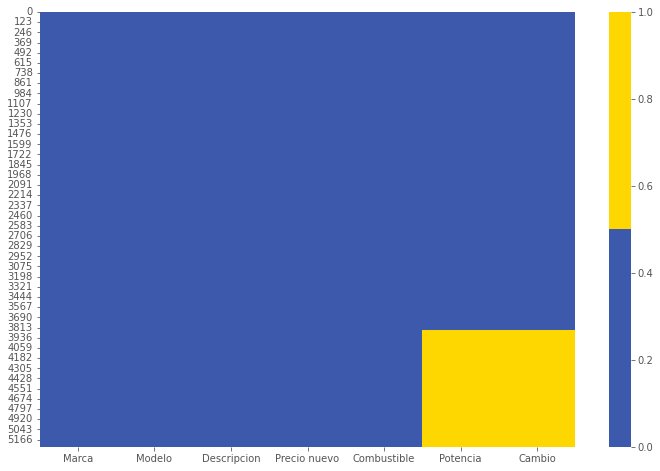

In [161]:
fig, ax = plt.subplots()
sns.heatmap(df_nuevos[df_nuevos.columns].isnull(), 
            cmap=sns.color_palette(['#3D59AB', '#FFD700'])) # Amarillo es missing y azul no es missing.

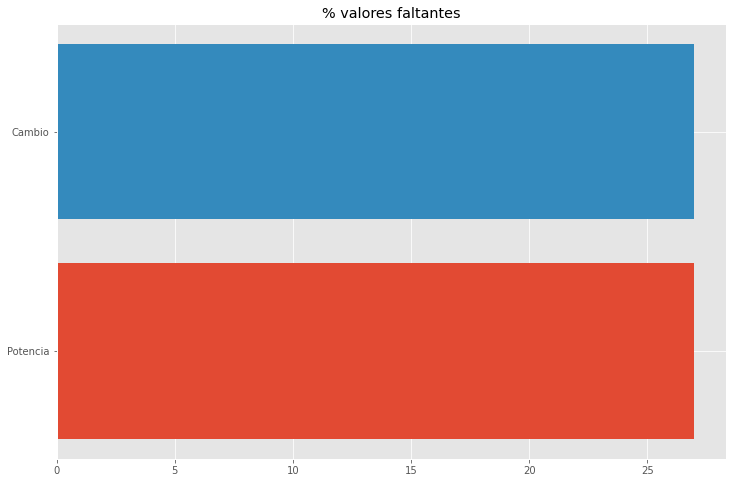

In [162]:
for nombre in df_nuevos.columns:
    columna = df_nuevos[nombre]
    NaN = sum(columna.isnull())/len(df_nuevos)
    if NaN > 0:
      plt.barh(nombre, round(NaN*100))
      plt.title("% valores faltantes")

In [163]:
df_nuevos_copy = df_nuevos.copy()

created missing indicator for: Potencia
created missing indicator for: Cambio


<AxesSubplot:xlabel='index'>

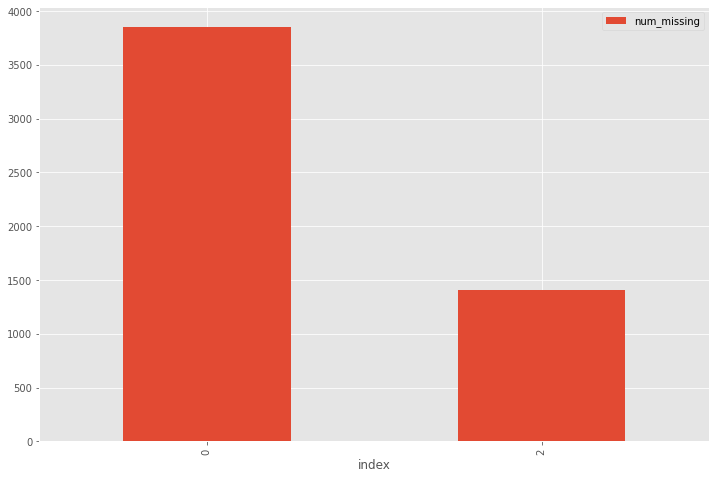

In [164]:
#Crear un histograma con missings

# first create missing indicator for features with missing data
for col in df_nuevos_copy.columns:
    missing = df_nuevos_copy[col].isnull() #array of false and true if there is missing value
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))  #name of column with mising values
        df_nuevos_copy['{}_ismissing'.format(col)] = missing #create dataframe with the name of the column +is_missing
        
# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_nuevos_copy.columns if 'ismissing' in col]
df_nuevos_copy['num_missing'] = df_nuevos_copy[ismissing_cols].sum(axis=1) #add one column with num of missing in each row
df_nuevos_copy['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Vemos que las instancias que tienen missing values son dos características las que faltan

Vemos si en la descripción aparecen palabras clave para obtener la potencia

Para eso, primero cambiamos los términos relacionados a CV

In [165]:
df_nuevos['Descripcion'] = df_nuevos['Descripcion'].str.replace('cv', 'CV').str.replace('Cv', 'CV').str.replace('cV', 'CV')
df_nuevos['Descripcion'] = df_nuevos['Descripcion'].str.replace('CV', ' CV')

De este modo, en la 'Descripcion' las potencias aparecerán en formato XXX CV

Las potencias de los coches tienen 2 o 3 dígitos. De modo que creamos dos características auxiliares que nos permitan extraer la información

In [166]:
df_nuevos['Potencia aux3'] = df_nuevos['Descripcion'].str.extract(r'(\d{3}\s+CV)')
df_nuevos['Potencia aux2'] = df_nuevos['Descripcion'].str.extract(r'(\d{2}\s+CV)')

Eliminamos el string ' CV' que acompaña a los números creados y los convertimos a formato numérico

In [167]:
df_nuevos['Potencia aux3'] = df_nuevos['Potencia aux3'].str.replace(' CV', '')
df_nuevos['Potencia aux2'] = df_nuevos['Potencia aux2'].str.replace(' CV', '')
df_nuevos['Potencia aux3'] = pd.to_numeric(df_nuevos['Potencia aux3'])
df_nuevos['Potencia aux2'] = pd.to_numeric(df_nuevos['Potencia aux2'])

Buscamos ahora las instancias que contienen valores de 'CV' en la descripción y valores NaN en la característica 'Potencia'

In [168]:
index = df_nuevos[(df_nuevos['Descripcion'].str.contains('CV')) & (df_nuevos['Potencia'].isna())].index
df_nuevos.iloc[index]

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio,Potencia aux3,Potencia aux2
3849,SKODA,Fabia,SKODA Fabia 1.0 TSI 81KW 110 CV Monte Carlo 5p.,21250,Gasolina,NaN,NaN,110.0,10.0
3850,ALFA ROMEO,Tonale,ALFA-ROMEO Tonale 1.5 MHEV GASOLINA 130 CV SU...,35690,Híbrido,NaN,NaN,130.0,30.0
3854,KIA,Stonic,KIA Stonic 1.0 TGDi 74kW 100 CV MHEV iMT Conce...,19600,Híbrido,NaN,NaN,100.0,0.0
3857,CITROEN,C5,CITROEN C5 X PureTech 96kW 130 CV SS EAT8 Shin...,29380,Gasolina,NaN,NaN,130.0,30.0
3860,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Life 1.0 TSI 81kW 110 CV 5p.,28300,Gasolina,NaN,NaN,110.0,10.0
...,...,...,...,...,...,...,...,...,...
5245,OPEL,Astra,OPEL Astra 1.2T XHT 96kW 130 CV GSLine 5p.,27000,Gasolina,NaN,NaN,130.0,30.0
5247,OPEL,Astra,OPEL Astra 1.2T XHL 81kW 110 CV Edition 5p.,23300,Gasolina,NaN,NaN,110.0,10.0
5250,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Sport 2.0 TDI 110kW 150 CV DSG...,36170,Diesel,NaN,NaN,150.0,50.0
5251,PEUGEOT,3008,PEUGEOT 3008 1.5 BlueHDi 96kW 130 CV SS Active...,30950,Diesel,NaN,NaN,130.0,30.0


In [169]:
len(index)

705

Se observa que hay un total de 705 instancias que tenían información sobre su 'Potencia' pero no estaban en la columna reflejado.

Rellenamos los datos faltantes de 'Potencia' que están en 'Potencia aux3' (para los que tenían 3 dígitos en la 'Descripción') y en 'Potencia aux2' (para los que tenían 2). Hay que hacerlo en ese orden, puesto que en 'Potencia aux2' aparecen los dos últimos dígitos de 'Potencia aux3'

In [170]:
df_nuevos['Potencia'] = df_nuevos['Potencia'].fillna(df_nuevos['Potencia aux3'])
df_nuevos['Potencia'] = df_nuevos['Potencia'].fillna(df_nuevos['Potencia aux2'])

Comprobamos que el procedimiento se ha hecho correctamente

In [171]:
df_nuevos.iloc[index]

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio,Potencia aux3,Potencia aux2
3849,SKODA,Fabia,SKODA Fabia 1.0 TSI 81KW 110 CV Monte Carlo 5p.,21250,Gasolina,110.0,NaN,110.0,10.0
3850,ALFA ROMEO,Tonale,ALFA-ROMEO Tonale 1.5 MHEV GASOLINA 130 CV SU...,35690,Híbrido,130.0,NaN,130.0,30.0
3854,KIA,Stonic,KIA Stonic 1.0 TGDi 74kW 100 CV MHEV iMT Conce...,19600,Híbrido,100.0,NaN,100.0,0.0
3857,CITROEN,C5,CITROEN C5 X PureTech 96kW 130 CV SS EAT8 Shin...,29380,Gasolina,130.0,NaN,130.0,30.0
3860,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Life 1.0 TSI 81kW 110 CV 5p.,28300,Gasolina,110.0,NaN,110.0,10.0
...,...,...,...,...,...,...,...,...,...
5245,OPEL,Astra,OPEL Astra 1.2T XHT 96kW 130 CV GSLine 5p.,27000,Gasolina,130.0,NaN,130.0,30.0
5247,OPEL,Astra,OPEL Astra 1.2T XHL 81kW 110 CV Edition 5p.,23300,Gasolina,110.0,NaN,110.0,10.0
5250,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Sport 2.0 TDI 110kW 150 CV DSG...,36170,Diesel,150.0,NaN,150.0,50.0
5251,PEUGEOT,3008,PEUGEOT 3008 1.5 BlueHDi 96kW 130 CV SS Active...,30950,Diesel,130.0,NaN,130.0,30.0


Y quitamos las columnas 'Potencia aux2' y 'Potencia aux3', ya que no son necesarias en adelante

In [172]:
df_nuevos.drop(['Potencia aux2', 'Potencia aux3'], inplace = True, axis = 1)

Para el resto, vamos a asignar la potencia que corresponde a la mediana del mismo valor de las características 'Marca' y 'Modelo'

Primeros convertimos 'Potencia' a numérico

In [173]:
#df_nuevos['Potencia'] = pd.to_numeric(df_nuevos['Potencia'])

Aparece un error debido a que en 'Potencia' aparece el string '- '. Vemos el contenido de la columna 'Potencia'

In [174]:
df_nuevos[df_nuevos['Potencia'] == '- ']

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio
27,HYUNDAI,i20,HYUNDAI i20 1.2 MPI Essence LE,16515,Gasolina,-,Manual
958,CUPRA,Formentor,CUPRA Formentor 1.5 TSI 150,34570,Gasolina,-,Manual
1057,CUPRA,Formentor,CUPRA Formentor 1.5 TSI 150,34144,Gasolina,-,Manual
1436,BMW,Serie 1,BMW Serie 1 118dA Business,37052,Diésel,-,Automático
1437,BMW,Serie 1,BMW Serie 1 118d Business,35146,Diésel,-,Manual
1472,CITROEN,C4,CITROEN C4 1.5 BlueHDI S&S Feel Pack EAT8 130,28480,Diésel,-,Automático
2644,BMW,Serie 4,BMW Serie 4 420d Gran Coupé xDrive (4.75),47456,Diésel,-,Manual
3060,BMW,X1,BMW X1 xDrive 20dA,42467,Diésel,-,Automático
3801,VOLKSWAGEN,Polo,VOLKSWAGEN Polo 1.0 BMT Edition 75,14140,Gasolina,-,Manual
3802,VOLKSWAGEN,Polo,VOLKSWAGEN Polo 1.0 BMT Edition 75,14715,Gasolina,-,Manual


Se convierten estos valores a NaN

In [175]:
df_nuevos['Potencia'][df_nuevos['Potencia'] == '- '] = np.nan

Y se convierte la columna a numérico

In [176]:
df_nuevos['Potencia'] = pd.to_numeric(df_nuevos['Potencia'])

Se rellena con la mediana ahora

In [177]:
medianas = df_nuevos.groupby(['Marca', 'Modelo'])['Potencia'].transform('median')
df_nuevos['Potencia'] = df_nuevos['Potencia'].fillna(medianas)

In [178]:
df_nuevos.loc[df_2mano['Potencia'].isna()]

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio


Ya se han rellenado todos los missings values de 'Potencia'

In [179]:
df_nuevos

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio
0,KIA,Sportage,KIA Sportage 1.6 CRDi MHEV Drive 136,36924,Diésel,136.0,Manual
1,KIA,XCeed,KIA XCeed 1.0 T-GDi Eco-Dynamics Tech,27574,Gasolina,120.0,Manual
2,KIA,Stonic,KIA Stonic 1.0 T-GDi MHEV iMT Concept 100,21400,Gasolina,100.0,Manual
3,NISSAN,Qashqai,NISSAN Qashqai 1.3 DIG-T Acenta 4x2 103kW,26400,Gasolina,140.0,Manual
4,AUDI,A1,AUDI A1 Sportback 25 TFSI,23937,Gasolina,95.0,Manual
...,...,...,...,...,...,...,...
5249,HONDA,Jazz,HONDA Jazz 1.5 iMMD CROSSTAR 5p.,29140,Híbrido,109.0,NaN
5250,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Sport 2.0 TDI 110kW 150 CV DSG...,36170,Diesel,150.0,NaN
5251,PEUGEOT,3008,PEUGEOT 3008 1.5 BlueHDi 96kW 130 CV SS Active...,30950,Diesel,130.0,NaN
5252,PEUGEOT,208,PEUGEOT 208 PureTech 55kW 75 CV Active Pack 5p.,16450,Gasolina,75.0,NaN


Analizamos los missing values del tipo de cambio

In [180]:
df_nuevos.loc[df_nuevos['Cambio'].isna()]

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio
3848,MERCEDES-BENZ,EQB,MERCEDES-BENZ EQB EQB 300 4MATIC 5p.,70318,Eléctrico,292.0,NaN
3849,SKODA,Fabia,SKODA Fabia 1.0 TSI 81KW 110 CV Monte Carlo 5p.,21250,Gasolina,110.0,NaN
3850,ALFA ROMEO,Tonale,ALFA-ROMEO Tonale 1.5 MHEV GASOLINA 130 CV SU...,35690,Híbrido,130.0,NaN
3851,OPEL,Grandland,OPEL Grandland X 1.5 CDTi Design Tech 5p.,26400,Diesel,130.0,NaN
3852,CITROEN,C4,CITROEN C4 PureTech 100 SS 6v Live Pack 5p.,20190,Gasolina,130.0,NaN
...,...,...,...,...,...,...,...
5249,HONDA,Jazz,HONDA Jazz 1.5 iMMD CROSSTAR 5p.,29140,Híbrido,109.0,NaN
5250,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Sport 2.0 TDI 110kW 150 CV DSG...,36170,Diesel,150.0,NaN
5251,PEUGEOT,3008,PEUGEOT 3008 1.5 BlueHDi 96kW 130 CV SS Active...,30950,Diesel,130.0,NaN
5252,PEUGEOT,208,PEUGEOT 208 PureTech 55kW 75 CV Active Pack 5p.,16450,Gasolina,75.0,NaN


Se observa que hay algunos que son coches eléctricos, híbridos o híbridos enchufables. Todos esos cambios son automáticos

In [181]:
lista = ['Híbrido enchufable', 'Eléctrico', 'Híbrido']
for tipo in lista:
  index = df_nuevos[(df_nuevos['Combustible'] == tipo) & (df_nuevos['Cambio'].isna())].index
  df_nuevos['Cambio'].iloc[index] = 'Automático'

Se compreuba si en la descripción aparece alguna de las palabras relacionadas con los tipos de cambios automáticos que existen (consultado en: https://www.quecochemecompro.com/blog/tipos-de-cambios-automaticos/) 

In [182]:
cambios = ['tronic', 'Tronic', 'TRONIC', 'EAT', 'Skyactiv', 'Aut', 'aut','Auto', 'AUTO', 'auto', 'Multidrive']
for cambio in cambios:
  index = df_nuevos[(df_nuevos['Descripcion'].str.contains(pat = cambio)) & (df_nuevos['Cambio'].isna())].index
  df_nuevos['Cambio'].iloc[index] = 'Automatico'

In [183]:
df_nuevos.loc[df_nuevos['Cambio'].isna()]

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio
3849,SKODA,Fabia,SKODA Fabia 1.0 TSI 81KW 110 CV Monte Carlo 5p.,21250,Gasolina,110.0,NaN
3851,OPEL,Grandland,OPEL Grandland X 1.5 CDTi Design Tech 5p.,26400,Diesel,130.0,NaN
3852,CITROEN,C4,CITROEN C4 PureTech 100 SS 6v Live Pack 5p.,20190,Gasolina,130.0,NaN
3853,CITROEN,Berlingo,CITROEN Berlingo Talla M BlueHDi 100 SS FEEL 5p.,25400,Diesel,136.0,NaN
3855,CITROEN,C4,CITROEN C4 PureTech 130 SS 6v Feel Pack 5p.,21400,Gasolina,130.0,NaN
...,...,...,...,...,...,...,...
5246,PEUGEOT,2008,PEUGEOT 2008 Allure Puretech 100 SS BVM6 5p.,23390,Gasolina,130.0,NaN
5247,OPEL,Astra,OPEL Astra 1.2T XHL 81kW 110 CV Edition 5p.,23300,Gasolina,110.0,NaN
5250,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Sport 2.0 TDI 110kW 150 CV DSG...,36170,Diesel,150.0,NaN
5251,PEUGEOT,3008,PEUGEOT 3008 1.5 BlueHDi 96kW 130 CV SS Active...,30950,Diesel,130.0,NaN


Y se asume que el resto son de tipo manual, al ser lo más común

In [184]:
df_nuevos['Cambio'] = df_nuevos['Cambio'].fillna('Manual')

In [185]:
df_nuevos

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio
0,KIA,Sportage,KIA Sportage 1.6 CRDi MHEV Drive 136,36924,Diésel,136.0,Manual
1,KIA,XCeed,KIA XCeed 1.0 T-GDi Eco-Dynamics Tech,27574,Gasolina,120.0,Manual
2,KIA,Stonic,KIA Stonic 1.0 T-GDi MHEV iMT Concept 100,21400,Gasolina,100.0,Manual
3,NISSAN,Qashqai,NISSAN Qashqai 1.3 DIG-T Acenta 4x2 103kW,26400,Gasolina,140.0,Manual
4,AUDI,A1,AUDI A1 Sportback 25 TFSI,23937,Gasolina,95.0,Manual
...,...,...,...,...,...,...,...
5249,HONDA,Jazz,HONDA Jazz 1.5 iMMD CROSSTAR 5p.,29140,Híbrido,109.0,Automático
5250,VOLKSWAGEN,TRoc,VOLKSWAGEN TRoc Sport 2.0 TDI 110kW 150 CV DSG...,36170,Diesel,150.0,Manual
5251,PEUGEOT,3008,PEUGEOT 3008 1.5 BlueHDi 96kW 130 CV SS Active...,30950,Diesel,130.0,Manual
5252,PEUGEOT,208,PEUGEOT 208 PureTech 55kW 75 CV Active Pack 5p.,16450,Gasolina,75.0,Manual


####Procesado del dataframe de vehículos nuevo

Terminamos acondicionando el dataset para fijar variables numéricas, homogeneizar las categorías dentro de las clases, etc.

In [186]:
df_nuevos.dtypes

Marca            object
Modelo           object
Descripcion      object
Precio nuevo     object
Combustible      object
Potencia        float64
Cambio           object
dtype: object

Se comienza por las 'Marca'

In [187]:
lista = sorted(df_nuevos['Marca'].unique())
for a, b, c, d, e in zip (lista[::5], lista[1::5], lista[2::5], lista[3::5], lista[4::5]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e))

ABARTH              ALFA ROMEO          ALPINE              ASTON MARTIN        AUDI
BENTLEY             BMW                 CITROEN             CUPRA               DACIA
DFSK                DODGE               DR                  DS                  EVO
FERRARI             FIAT                FORD                HONDA               HYUNDAI
INVICTA             JAGUAR              JEEP                KIA                 LAMBORGHINI
LAND-ROVER          LEVC                LEXUS               LOTUS               MAHINDRA
MASERATI            MAZDA               MERCEDES-BENZ       MG                  MINI
MITSUBISHI          NISSAN              OPEL                PEUGEOT             POLESTAR
PORSCHE             RENAULT             SEAT                SKODA               SMART
SSANGYONG           SUBARU              SUZUKI              SWM                 TESLA


No se observan 'Marcas' que estén mal escritas o repetidas

Respecto a 'Modelo'

In [188]:
len(df_nuevos['Modelo'].unique())

349

Hay 349 modelos diferentes de vehículo

In [189]:
lista = sorted(df_nuevos['Modelo'].unique())
for a, b, c, d, e in zip (lista[::5], lista[1::5], lista[2::5], lista[3::5], lista[4::5]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e))

02                  108                 2008                208                 3
3008                308                 4                   5                   500
5008                500C                500X                508                 580
595                 6                   911                 A1                  A110
A3                  A4                  A5                  A6                  A7
A8                  AMG                 Across              Alhambra            Ariya
Arkana              Arona               Arteon              Astra               Ateca
Aventador           Aygo                Bayon               Bentayga            Berlingo
Born                Boxster             C-HR                C1                  C3
C4                  C40                 C5                  CHR                 CLA
CLS                 CR-V                CRV                 CX-3                CX-30
CX-5                CX-60               CX3                 CX30    

Hay muchos modelos diferentes. Agrupamos por marca, para poder ver las repeticiones

In [190]:
df_nuevos.groupby(['Marca', 'Modelo']).size().to_dict()

{('ABARTH', '595'): 3,
 ('ALFA ROMEO', 'Giulia'): 12,
 ('ALFA ROMEO', 'Stelvio'): 11,
 ('ALFA ROMEO', 'Tonale'): 5,
 ('ALPINE', 'A110'): 2,
 ('ASTON MARTIN', 'DBX'): 1,
 ('AUDI', 'A1'): 25,
 ('AUDI', 'A3'): 78,
 ('AUDI', 'A4'): 47,
 ('AUDI', 'A5'): 56,
 ('AUDI', 'A6'): 46,
 ('AUDI', 'A7'): 13,
 ('AUDI', 'A8'): 5,
 ('AUDI', 'Q2'): 41,
 ('AUDI', 'Q3'): 64,
 ('AUDI', 'Q4'): 18,
 ('AUDI', 'Q5'): 66,
 ('AUDI', 'Q7'): 20,
 ('AUDI', 'Q8'): 23,
 ('AUDI', 'R8'): 4,
 ('AUDI', 'TT'): 2,
 ('AUDI', 'e-tron'): 12,
 ('BENTLEY', 'Bentayga'): 1,
 ('BENTLEY', 'Continental'): 5,
 ('BENTLEY', 'Flying'): 2,
 ('BENTLEY', 'Mulsanne'): 1,
 ('BMW', 'Serie 1'): 15,
 ('BMW', 'Serie 2'): 14,
 ('BMW', 'Serie 3'): 5,
 ('BMW', 'Serie 4'): 8,
 ('BMW', 'Serie 5'): 20,
 ('BMW', 'Serie 6'): 4,
 ('BMW', 'Serie 8'): 2,
 ('BMW', 'X1'): 3,
 ('BMW', 'X2'): 13,
 ('BMW', 'X3'): 5,
 ('BMW', 'X4'): 1,
 ('BMW', 'X5'): 6,
 ('BMW', 'X6'): 5,
 ('BMW', 'X7'): 1,
 ('BMW', 'Z4'): 3,
 ('BMW', 'i3'): 3,
 ('BMW', 'i4'): 2,
 ('BMW', 'iX'):

Se puede observar que hay muchos modelos de marcas que son básicamente el mismo modelo, con pequeñas variaciones o, incluso, en los que sólo cambia la escritura del modelo. De modo que se va a proceder a unificar diferentes modelos

Vamos a crear variables auxiliares para poder cambiar el tipo de modelo y unificar

In [191]:
CitroenGrand = ['Grand C4 Picasso', 'Grand']
CitroenC4 = ['C4', 'eC4']
CupraLeon = ['Leon', 'León']
DfskSeres = ['Seres', 'SERES']
DS3 = ['DS 3', 'DS3']
DS4 = ['DS 4', 'DS4']
DS7 = ['DS 7', 'DS7']
DS9 = ['DS 9', 'DS9']
FordSmax = ['S-MAX', 'S-Max', 'SMAX']
HondaCrv = ['CRV', 'CR-V']
HyundaiIoniq = ['IONIQ', 'Ioniq']
HyundaiTucson = ['TUCSON', 'Tucson']
KiaCeed = ['Ceed', 'Ceed Tourer', 'Cee´d', 'ceed', 'ceed Sportswagon', 'ceed Sporty Wagon', 'pro_ceed GT']
KiaNiroPHEV = ['Niro PHEV', 'Niro Hïbrido Enchufable']
KiaProceed = ['Pro Ceed', 'ProCeed']
MazdaCx3 = ['CX-3', 'CX3']
MazdaCx5 = ['CX-5', 'CX5']
MazdaMx5  = ['MX-5', 'MX5']
MercedesbenzClaseCLA = ['Clase CLA', 'CLA']
MercedesbenzClaseCLS = ['Clase CLS', 'CLS']
MercedesbenzClaseGLA = ['Clase GLA', 'GLA']
MercedesbenzClaseGLB = ['Clase GLB', 'GLB']
MercedesbenzClaseGLC = ['Clase GLC', 'GLC']
MiniMini = ['MINI', 'Mini']
NissanJuke = ['JUKE', 'Juke']
NissanLeaf = ['LEAF', 'Leaf']
NissanQashqai = ['QASHQAI', 'Qashqai']
OpelCombo = ['Combo', 'Combo Life', 'Comboe']
OpelCorsa = ['Corsa', 'Corsa Van', 'Corsa-e', 'Corsae']
OpelMokka = ['Mokka', 'Mokka X', 'Mokkae']
Peugeot208 = ['208', '208 XAD', 'e208']
Peugeot2008 = ['2008', 'e2008']
RenaultMegane = ['Mégane', 'Megane']
SeatLeon = ['Leon', 'León']
SmartFortwo = ['Fortwo', 'Smart', 'fortwo', 'smart']
ToyotaChr = ['CHR', 'C-HR']
ToyotaRav4 = ['RAV-4', 'Rav4']
VolkswagenTcross = ['T-Cross', 'TCross']
VolkswagenTroc = ['T-Roc', 'TRoc']

In [192]:
nombre = ['CitroenGrand','CitroenC4','CupraLeon','DfskSeres','DS3','DS4','DS7','DS9','FordSmax','HondaCrv',
          'HyundaiIoniq','HyundaiTucson','KiaCeed','KiaNiroPHEV','KiaProceed','MazdaCx3','MazdaCx5',
          'MazdaMx5','MercedesbenzClaseCLA','MercedesbenzClaseCLS','MercedesbenzClaseGLA','MercedesbenzClaseGLB',
          'MercedesbenzClaseGLC','MiniMini','NissanJuke','NissanLeaf','NissanQashqai','OpelCombo','OpelCorsa',
          'OpelMokka','Peugeot208','Peugeot2008','RenaultMegane','SeatLeon','SmartFortwo','ToyotaChr','ToyotaRav4',
          'VolkswagenTcross','VolkswagenTroc']

In [193]:
grupos = [CitroenGrand,CitroenC4,CupraLeon,DfskSeres,DS3,DS4,DS7,DS9,FordSmax,HondaCrv,HyundaiIoniq,
HyundaiTucson,KiaCeed,KiaNiroPHEV,KiaProceed,MazdaCx3,MazdaCx5,MazdaMx5,MercedesbenzClaseCLA,MercedesbenzClaseCLS,
MercedesbenzClaseGLA,MercedesbenzClaseGLB,MercedesbenzClaseGLC,MiniMini,NissanJuke,NissanLeaf,NissanQashqai,
OpelCombo,OpelCorsa,OpelMokka,Peugeot208,Peugeot2008,RenaultMegane,SeatLeon,SmartFortwo,ToyotaChr,ToyotaRav4,
VolkswagenTcross,VolkswagenTroc]

Se ha creado una lista con los nombres de las familias de modelos implicadas (lista nombre) y una lista de listas con los modelos de cada nombre (grupos).

Se crean las columnas auxiliares en el dataframe df_nuevos

In [194]:
df_nuevos[nombre] = ''

Se añade un 1 en caso que la instancia tenga un modelo contenido en algunos de los modelos de cada grupo

In [195]:
for lista, n in zip(grupos, nombre):
  for modelo in lista:
    df_nuevos[n][df_nuevos['Modelo'] == modelo] = 1

Se procede a cambiar el nombre del modelo, de modo que aparecerá el primer nombre de la lista que corresponda para el modelo 

In [196]:
primer = (next(zip(*grupos))) #lista con el primer elemento de cada una de las listas
for lista, n, uno in zip(grupos, nombre, primer):
  for modelo in lista:
    index = df_nuevos[(df_nuevos['Modelo'] == modelo) & (df_nuevos[n] == 1)].index
    df_nuevos['Modelo'].iloc[index] = uno

Comprobamos que se ha hecho bien la asignación

In [197]:
df_nuevos.loc[df_nuevos['MazdaCx3'] == 1]

,Marca,Modelo,Descripcion,Precio nuevo,Combustible,Potencia,Cambio,CitroenGrand,CitroenC4,CupraLeon,...,OpelMokka,Peugeot208,Peugeot2008,RenaultMegane,SeatLeon,SmartFortwo,ToyotaChr,ToyotaRav4,VolkswagenTcross,VolkswagenTroc
1815,MAZDA,CX-3,MAZDA CX-3 2.0 Skyactiv-G 100 Aniversario 2WD ...,29495,Gasolina,121.0,Manual,,,,...,,,,,,,,,,
1833,MAZDA,CX-3,MAZDA CX-3 2.0 Skyactiv-G Zenith Safety 2WD Au...,28845,Gasolina,121.0,Automático,,,,...,,,,,,,,,,
1834,MAZDA,CX-3,MAZDA CX-3 2.0 Skyactiv-G Evolution Design 2WD...,27095,Gasolina,121.0,Automático,,,,...,,,,,,,,,,
1835,MAZDA,CX-3,MAZDA CX-3 2.0 Skyactiv-G Evolution Design 2WD...,24095,Gasolina,121.0,Manual,,,,...,,,,,,,,,,
1836,MAZDA,CX-3,MAZDA CX-3 2.0 Skyactiv-G Zenith Safety 2WD 89kW,25845,Gasolina,121.0,Manual,,,,...,,,,,,,,,,
1851,MAZDA,CX-3,MAZDA CX-3 2.0 Skyactiv-G Zenith 2WD 89kW,24595,Gasolina,121.0,Manual,,,,...,,,,,,,,,,
1852,MAZDA,CX-3,MAZDA CX-3 2.0 Skyactiv-G Zenith 2WD Aut. 89kW,27595,Gasolina,121.0,Automático,,,,...,,,,,,,,,,
1853,MAZDA,CX-3,MAZDA CX-3 2.0 Skyactiv-G Origin 2WD 89kW,22295,Gasolina,121.0,Manual,,,,...,,,,,,,,,,
1854,MAZDA,CX-3,MAZDA CX-3 2.0 Skyactiv-G Evolution 2WD 89kW,23095,Gasolina,121.0,Manual,,,,...,,,,,,,,,,
4495,MAZDA,CX-3,MAZDA CX3 2.0 G 89kW 121 CV 2WD Evolution Desi...,23900,Gasolina,121.0,Manual,,,,...,,,,,,,,,,


In [198]:
len(df_nuevos['Modelo'].unique())

315

Vemos que se ha pasado de 349 a 315 modelos

Eliminamos las columnas auxiliares que se crearon, al no ser ya necesarias

In [199]:
df_nuevos.drop(nombre, inplace = True, axis = 1)

Y, para homogeneizar, convertimos el nombre de los 'Modelos' a variables de tipo string y las ponemos en mayúsculas

In [200]:
df_nuevos['Modelo'] = df_nuevos['Modelo'].apply(str)

In [201]:
df_nuevos['Modelo'] = df_nuevos['Modelo'].str.upper()

Continuanos convirtiendo la variable 'Precio nuevo' a tipo float

In [202]:
df_nuevos['Precio nuevo'] = df_nuevos['Precio nuevo'].str.strip()
df_nuevos['Precio nuevo'] = pd.to_numeric(df_nuevos['Precio nuevo'], downcast = 'float')

Homogeniezamos las categorías de la característica combustible. 

Vemos que tipo de combustibles hay en el dataset

In [203]:
print(*df_nuevos['Combustible'].unique(), sep = '\n')

Diésel
Gasolina
Eléctrico
Híbrido Enchufable
Híbrido
Gas
Diesel
Híbrido enchufable
Gas natural (CNG)
Gas licuado (GLP)


Hacemos los siguientes cambios:

* Diésel -> Diesel
* Híbrido enchufable, Híbrido Enchufable, Híbrido -> Hibrido
* Eléctrico -> Electrico
* Gas natural (CNG), Gas -> GNC
* Gas licuado (GLP) -> GLP

De ese modo se homogeniza y quitamos carácteres con tildes, que pueden resultar problemáticas

In [204]:
df_nuevos['Combustible'][df_nuevos['Combustible'] == 'Diésel'] = 'Diesel'
df_nuevos['Combustible'][df_nuevos['Combustible'] == 'Híbrido enchufable'] = 'Hibrido'
df_nuevos['Combustible'][df_nuevos['Combustible'] == 'Híbrido Enchufable'] = 'Hibrido'
df_nuevos['Combustible'][df_nuevos['Combustible'] == 'Híbrido'] = 'Hibrido'
df_nuevos['Combustible'][df_nuevos['Combustible'] == 'Eléctrico'] = 'Electrico'
df_nuevos['Combustible'][df_nuevos['Combustible'] == 'Gas natural (CNG)'] = 'GNC'
df_nuevos['Combustible'][df_nuevos['Combustible'] == 'Gas'] = 'GNC'
df_nuevos['Combustible'][df_nuevos['Combustible'] == 'Gas licuado (GLP)'] = 'GLP'

La 'Potencia' ya es tipo float, así que vemos que categorías hay en 'Cambio'

In [205]:
print(*df_nuevos['Cambio'].unique(), sep = '\n')

Manual
Automático
Automatico


Cambiamos de Automático a Automatico, para quitar la tilde

In [206]:
df_nuevos['Cambio'][df_nuevos['Cambio'] == 'Automático'] = 'Automatico'

Finalmente, eliminamos la columna 'Descripcion', puesto que ya no va a ser necesaria

In [207]:
df_nuevos.drop('Descripcion', inplace = True, axis = 1)

Con esto el dataframe df_nuevo está completamente preparado

In [208]:
df_nuevos.dtypes

Marca            object
Modelo           object
Precio nuevo    float32
Combustible      object
Potencia        float64
Cambio           object
dtype: object

###Datasets con datos de matriculaciones

Mediante web scraping se han obtenido los datos de matriculaciones de coches en España en los años 2015 a 2022, por marca, modelo y provincia. Para cada año se dispone de un dataset por marca, otro por modelo y otro por provincia, incluyendo las matriculaciones por tipo de combustible.

El web scraping se ha realizado en https://www.estadisticacoches.com

De este modo, se generarán tres dataframes:

* Matriculaciones por marcas por año y tipo de combustible
* Matriculaciones por modelo por año y tipo de combustible
* Matriculaciones por provincia por año y tipo de combustible

####Matriculaciones por marcas por año y tipo de combustible el periodo 2015-2022

Se cargan cada uno de los dataset disponible por año

In [209]:
ds_2015marcas = pd.read_excel(path+'ventas marca 2015.xlsx')
ds_2016marcas = pd.read_excel(path+'ventas marca 2016.xlsx')
ds_2017marcas = pd.read_excel(path+'ventas marca 2017.xlsx')
ds_2018marcas = pd.read_excel(path+'ventas marca 2018.xlsx')
ds_2019marcas = pd.read_excel(path+'ventas marca 2019.xlsx')
ds_2020marcas = pd.read_excel(path+'ventas marca 2020.xlsx')
ds_2021marcas = pd.read_excel(path+'ventas marca 2021.xlsx')
ds_2022marcas = pd.read_excel(path+'ventas marca 2022.xlsx')

In [210]:
ds_2016marcas.head()

,Unnamed: 0,Gasolina,Diesel,Híbrido,Eléctrico,Otros,GLP,GNC,Total,%
0,RENAULT,37289,52811,0,401,0,0,0,90501,7.91%
1,OPEL,50846,37815,0,0,1,697,0,89359,7.81%
2,VOLKSWAGEN,37711,51083,0,247,0,0,5,89046,7.78%
3,PEUGEOT,32097,51424,0,17,3,3,0,83544,7.30%
4,SEAT,42115,35175,0,1,0,20,325,77636,6.79%


In [211]:
ds_2016marcas.tail()

,Unnamed: 0,Gasolina,Diesel,Híbrido,Eléctrico,Otros,GLP,GNC,Total,%
48,MORGAN,4,0,0,0,0,0,0,4,0.00%
49,MCLAREN,3,0,0,0,0,0,0,3,0.00%
50,PONTIAC,2,0,0,0,1,0,0,3,0.00%
51,SAAB,2,0,0,0,0,0,0,2,0.00%
52,Total:,490553,648460,0,3532,19,1309,353,1144226,100.00


Renombramos las cabeceras

In [212]:
cabecera = ['Marca', 'Mat. Gasolina', 'Mat. Diesel', 'Mat. Hibrido', 'Mat. Electrico', 'Mat. Otros', 'Mat. GLP', 'Mat. GNC', 'Mat. Total', 'Mat. %']

In [213]:
ds_2015marcas.columns = cabecera
ds_2016marcas.columns = cabecera
ds_2017marcas.columns = cabecera
ds_2018marcas.columns = cabecera
ds_2019marcas.columns = cabecera
ds_2020marcas.columns = cabecera
ds_2021marcas.columns = cabecera
ds_2022marcas.columns = cabecera

Quitamos las columnas 'Otros', 'Total' y '%', ya que no las vamos a usar directamente

In [214]:
drops = ['Mat. Otros', 'Mat. Total', 'Mat. %']

In [215]:
ds_2015marcas.drop(drops, inplace = True, axis = 1)
ds_2016marcas.drop(drops, inplace = True, axis = 1)
ds_2017marcas.drop(drops, inplace = True, axis = 1)
ds_2018marcas.drop(drops, inplace = True, axis = 1)
ds_2019marcas.drop(drops, inplace = True, axis = 1)
ds_2020marcas.drop(drops, inplace = True, axis = 1)
ds_2021marcas.drop(drops, inplace = True, axis = 1)
ds_2022marcas.drop(drops, inplace = True, axis = 1)

Eliminamos la última fila de cada dataset, que contiene las sumas

In [216]:
ds_2015marcas.drop(ds_2015marcas.tail(1).index, inplace=True)
ds_2016marcas.drop(ds_2016marcas.tail(1).index, inplace=True)
ds_2017marcas.drop(ds_2017marcas.tail(1).index, inplace=True)
ds_2018marcas.drop(ds_2018marcas.tail(1).index, inplace=True)
ds_2019marcas.drop(ds_2019marcas.tail(1).index, inplace=True)
ds_2020marcas.drop(ds_2020marcas.tail(1).index, inplace=True)
ds_2021marcas.drop(ds_2021marcas.tail(1).index, inplace=True)
ds_2022marcas.drop(ds_2022marcas.tail(1).index, inplace=True)

Añadimos el año a cada dataset, para luego poder indexar por marca y año

In [217]:
ds_2015marcas['Año'] = 2015
ds_2016marcas['Año'] = 2016
ds_2017marcas['Año'] = 2017
ds_2018marcas['Año'] = 2018
ds_2019marcas['Año'] = 2019
ds_2020marcas['Año'] = 2020
ds_2021marcas['Año'] = 2021
ds_2022marcas['Año'] = 2022

In [218]:
ds_2015marcas.set_index(['Año', 'Marca'], inplace = True)
ds_2016marcas.set_index(['Año', 'Marca'], inplace = True)
ds_2017marcas.set_index(['Año', 'Marca'], inplace = True)
ds_2018marcas.set_index(['Año', 'Marca'], inplace = True)
ds_2019marcas.set_index(['Año', 'Marca'], inplace = True)
ds_2020marcas.set_index(['Año', 'Marca'], inplace = True)
ds_2021marcas.set_index(['Año', 'Marca'], inplace = True)
ds_2022marcas.set_index(['Año', 'Marca'], inplace = True)

Unimos ahora los datasets para tener uno único para poder usarlo

In [219]:
frames = [ds_2015marcas, ds_2016marcas, ds_2017marcas, ds_2018marcas, ds_2019marcas,
              ds_2020marcas, ds_2021marcas, ds_2022marcas]

In [220]:
df_marcas = pd.concat(frames)

Se puede comprobar que en los datos de origen los vehículos híbridos son siempre 0. Esto es porque están todos incluidos en la categoría eléctrico. De ese modo, se elimina la característica "Mat. Hibrido".

In [221]:
df_marcas.drop(['Mat. Hibrido'], inplace = True, axis = 1)

In [222]:
df_marcas

Mat. Gasolina  Mat. Diesel  Mat. Electrico  Mat. GLP  \
Año  Marca                                                              
2015 VOLKSWAGEN          29372        58775             140         0   
     SEAT                30204        46867               0       230   
     RENAULT             27397        49334             312         7   
     PEUGEOT             23659        52785               4         3   
     OPEL                34477        41215               0       740   
...                        ...          ...             ...       ...   
2022 INFINITI                4            0               0         0   
     LOTUS                   3            0               0         0   
     BUICK                   2            0               0         0   
     PONTIAC                 2            0               0         0   
     MORGAN                  1            0               0         0   

                 Mat. GNC  
Año  Marca                 
2015 VOLKSWAGEN        14  
     SEAT             220  
     RENAULT            0  
     PEUGEOT            0  
     OPEL               0  
...                   ...  
2022 INFINITI           0  
     LOTUS              0  
     BUICK              0  
     PONTIAC            0  
     MORGAN             0  

[446 rows x 5 columns]

####Matriculaciones por modelo por año y tipo de combustible el periodo 2015-2022

Se sigue el mismo procedimiento que para las matriculaciones por marca

In [223]:
ds_2015modelos = pd.read_excel(path+'ventas modelo 2015.xlsx')
ds_2016modelos = pd.read_excel(path+'ventas modelo 2016.xlsx')
ds_2017modelos = pd.read_excel(path+'ventas modelo 2017.xlsx')
ds_2018modelos = pd.read_excel(path+'ventas modelo 2018.xlsx')
ds_2019modelos = pd.read_excel(path+'ventas modelo 2019.xlsx')
ds_2020modelos = pd.read_excel(path+'ventas modelo 2020.xlsx')
ds_2021modelos = pd.read_excel(path+'ventas modelo 2021.xlsx')
ds_2022modelos = pd.read_excel(path+'ventas modelo 2022.xlsx')

In [224]:
ds_2020modelos.head()

,Unnamed: 0,Gasolina,Diesel,Híbrido,Eléctrico,Otros,GLP,GNC,Total,%
0,SANDERO,15614,4864,0,0,0,3551,0,24029,2.83%
1,LEON,16240,5964,0,0,0,0,1472,23676,2.78%
2,QASHQAI,11254,8559,0,0,0,0,0,19813,2.33%
3,CLIO,10645,5057,0,0,0,2113,0,17815,2.09%
4,COROLLA,15472,0,0,0,1,2,0,15475,1.82%


In [225]:
ds_2020modelos.tail()

,Unnamed: 0,Gasolina,Diesel,Híbrido,Eléctrico,Otros,GLP,GNC,Total,%
330,PUNTO,1,0,0,0,0,0,0,1,0.00%
331,SERIE X,0,1,0,0,0,0,0,1,0.00%
332,SPARK,1,0,0,0,0,0,0,1,0.00%
333,WRX,1,0,0,0,0,0,0,1,0.00%
334,Total:,558085,261255,0,17915,71,10048,3204,850578,100.00


In [226]:
cabecera = ['Modelo', 'Mat. Gasolina', 'Mat. Diesel', 'Mat. Hibrido', 'Mat. Electrico', 'Mat. Otros', 'Mat. GLP', 'Mat. GNC', 'Mat. Total', 'Mat. %']

In [227]:
ds_2015modelos.columns = cabecera
ds_2016modelos.columns = cabecera
ds_2017modelos.columns = cabecera
ds_2018modelos.columns = cabecera
ds_2019modelos.columns = cabecera
ds_2020modelos.columns = cabecera
ds_2021modelos.columns = cabecera
ds_2022modelos.columns = cabecera

In [228]:
drops = ['Mat. Otros', 'Mat. Total', 'Mat. %']

In [229]:
ds_2015modelos.drop(drops, inplace = True, axis = 1)
ds_2016modelos.drop(drops, inplace = True, axis = 1)
ds_2017modelos.drop(drops, inplace = True, axis = 1)
ds_2018modelos.drop(drops, inplace = True, axis = 1)
ds_2019modelos.drop(drops, inplace = True, axis = 1)
ds_2020modelos.drop(drops, inplace = True, axis = 1)
ds_2021modelos.drop(drops, inplace = True, axis = 1)
ds_2022modelos.drop(drops, inplace = True, axis = 1)

In [230]:
ds_2015modelos.drop(ds_2015modelos.tail(1).index, inplace=True)
ds_2016modelos.drop(ds_2016modelos.tail(1).index, inplace=True)
ds_2017modelos.drop(ds_2017modelos.tail(1).index, inplace=True)
ds_2018modelos.drop(ds_2018modelos.tail(1).index, inplace=True)
ds_2019modelos.drop(ds_2019modelos.tail(1).index, inplace=True)
ds_2020modelos.drop(ds_2020modelos.tail(1).index, inplace=True)
ds_2021modelos.drop(ds_2021modelos.tail(1).index, inplace=True)
ds_2022modelos.drop(ds_2022modelos.tail(1).index, inplace=True)

In [231]:
ds_2015modelos

,Modelo,Mat. Gasolina,Mat. Diesel,Mat. Hibrido,Mat. Electrico,Mat. GLP,Mat. GNC
0,C4,8350,27125,0,0,1,0
1,LEON,10258,21418,0,0,0,201
2,IBIZA,16616,14756,0,0,0,0
3,GOLF,7373,21698,0,123,0,14
4,MEGANE,8678,20153,0,0,0,0
...,...,...,...,...,...,...,...
323,Q2,0,1,0,0,0,0
324,RAPIDE,1,0,0,0,0,0
325,V50,0,1,0,0,0,0
326,VANTAGE,1,0,0,0,0,0


Y, para homogeneizar, convertimos el nombre de los 'Modelos' a variables de tipo string y las ponemos en mayúsculas

In [232]:
ds_2015modelos['Modelo'] = ds_2015modelos['Modelo'].apply(str)
ds_2016modelos['Modelo'] = ds_2016modelos['Modelo'].apply(str)
ds_2017modelos['Modelo'] = ds_2017modelos['Modelo'].apply(str)
ds_2018modelos['Modelo'] = ds_2018modelos['Modelo'].apply(str)
ds_2019modelos['Modelo'] = ds_2019modelos['Modelo'].apply(str)
ds_2020modelos['Modelo'] = ds_2020modelos['Modelo'].apply(str)
ds_2021modelos['Modelo'] = ds_2021modelos['Modelo'].apply(str)
ds_2022modelos['Modelo'] = ds_2022modelos['Modelo'].apply(str)

In [233]:
ds_2015modelos['Modelo'] = ds_2015modelos['Modelo'].str.upper()
ds_2016modelos['Modelo'] = ds_2016modelos['Modelo'].str.upper()
ds_2017modelos['Modelo'] = ds_2017modelos['Modelo'].str.upper()
ds_2018modelos['Modelo'] = ds_2018modelos['Modelo'].str.upper()
ds_2019modelos['Modelo'] = ds_2019modelos['Modelo'].str.upper()
ds_2020modelos['Modelo'] = ds_2020modelos['Modelo'].str.upper()
ds_2021modelos['Modelo'] = ds_2021modelos['Modelo'].str.upper()
ds_2022modelos['Modelo'] = ds_2022modelos['Modelo'].str.upper()

In [234]:
ds_2015modelos['Año'] = 2015
ds_2016modelos['Año'] = 2016
ds_2017modelos['Año'] = 2017
ds_2018modelos['Año'] = 2018
ds_2019modelos['Año'] = 2019
ds_2020modelos['Año'] = 2020
ds_2021modelos['Año'] = 2021
ds_2022modelos['Año'] = 2022

In [235]:
ds_2015modelos.set_index(['Año', 'Modelo'], inplace = True)
ds_2016modelos.set_index(['Año', 'Modelo'], inplace = True)
ds_2017modelos.set_index(['Año', 'Modelo'], inplace = True)
ds_2018modelos.set_index(['Año', 'Modelo'], inplace = True)
ds_2019modelos.set_index(['Año', 'Modelo'], inplace = True)
ds_2020modelos.set_index(['Año', 'Modelo'], inplace = True)
ds_2021modelos.set_index(['Año', 'Modelo'], inplace = True)
ds_2022modelos.set_index(['Año', 'Modelo'], inplace = True)

In [236]:
frames = [ds_2015modelos, ds_2016modelos, ds_2017modelos, ds_2018modelos, ds_2019modelos,
          ds_2020modelos, ds_2021modelos, ds_2022modelos]

In [237]:
df_modelos = pd.concat(frames)

Se puede comprobar que en los datos de origen los vehículos híbridos son siempre 0. Esto es porque están todos incluidos en la categoría eléctrico. De ese modo, se elimina la característica "Mat. Hibrido".

In [238]:
df_modelos.drop(['Mat. Hibrido'], inplace = True, axis = 1)

In [239]:
df_modelos

Mat. Gasolina  Mat. Diesel  Mat. Electrico  Mat. GLP  \
Año  Modelo                                                               
2015 C4                     8350        27125               0         1   
     LEON                  10258        21418               0         0   
     IBIZA                 16616        14756               0         0   
     GOLF                   7373        21698             123         0   
     MEGANE                 8678        20153               0         0   
...                          ...          ...             ...       ...   
2022 Q50                       1            0               0         0   
     QASHQAI+2                 1            0               0         0   
     QUATTROPORTE              1            0               0         0   
     RODIUS                    0            1               0         0   
     V40                       0            1               0         0   

                   Mat. GNC  
Año  Modelo                  
2015 C4                   0  
     LEON               201  
     IBIZA                0  
     GOLF                14  
     MEGANE               0  
...                     ...  
2022 Q50                  0  
     QASHQAI+2            0  
     QUATTROPORTE         0  
     RODIUS               0  
     V40                  0  

[2799 rows x 5 columns]

####Matriculaciones por provincia por año y tipo de combustible el periodo 2015-2022

Se repite el mismo procedimiento que para marcas y modelos por año

In [240]:
ds_2015provincias = pd.read_excel(path+'ventas provincia 2015.xlsx')
ds_2016provincias = pd.read_excel(path+'ventas provincia 2016.xlsx')
ds_2017provincias = pd.read_excel(path+'ventas provincia 2017.xlsx')
ds_2018provincias = pd.read_excel(path+'ventas provincia 2018.xlsx')
ds_2019provincias = pd.read_excel(path+'ventas provincia 2019.xlsx')
ds_2020provincias = pd.read_excel(path+'ventas provincia 2020.xlsx')
ds_2021provincias = pd.read_excel(path+'ventas provincia 2021.xlsx')
ds_2022provincias = pd.read_excel(path+'ventas provincia 2022.xlsx')

In [241]:
cabecera = ['Provincia', 'Mat. Gasolina', 'Mat. Diesel', 'Mat. Hibrido', 'Mat. Electrico', 'Mat. Otros', 'Mat. GLP', 'Mat. GNC', 'Mat. Total', 'Mat. %']

In [242]:
ds_2015provincias.columns = cabecera
ds_2016provincias.columns = cabecera
ds_2017provincias.columns = cabecera
ds_2018provincias.columns = cabecera
ds_2019provincias.columns = cabecera
ds_2020provincias.columns = cabecera
ds_2021provincias.columns = cabecera
ds_2022provincias.columns = cabecera

In [243]:
ds_2015provincias.drop(drops, inplace = True, axis = 1)
ds_2016provincias.drop(drops, inplace = True, axis = 1)
ds_2017provincias.drop(drops, inplace = True, axis = 1)
ds_2018provincias.drop(drops, inplace = True, axis = 1)
ds_2019provincias.drop(drops, inplace = True, axis = 1)
ds_2020provincias.drop(drops, inplace = True, axis = 1)
ds_2021provincias.drop(drops, inplace = True, axis = 1)
ds_2022provincias.drop(drops, inplace = True, axis = 1)

In [244]:
ds_2015provincias.drop(ds_2015provincias.tail(1).index, inplace=True)
ds_2016provincias.drop(ds_2016provincias.tail(1).index, inplace=True)
ds_2017provincias.drop(ds_2017provincias.tail(1).index, inplace=True)
ds_2018provincias.drop(ds_2018provincias.tail(1).index, inplace=True)
ds_2019provincias.drop(ds_2019provincias.tail(1).index, inplace=True)
ds_2020provincias.drop(ds_2020provincias.tail(1).index, inplace=True)
ds_2021provincias.drop(ds_2021provincias.tail(1).index, inplace=True)
ds_2022provincias.drop(ds_2022provincias.tail(1).index, inplace=True)

In [245]:
ds_2015provincias['Año'] = 2015
ds_2016provincias['Año'] = 2016
ds_2017provincias['Año'] = 2017
ds_2018provincias['Año'] = 2018
ds_2019provincias['Año'] = 2019
ds_2020provincias['Año'] = 2020
ds_2021provincias['Año'] = 2021
ds_2022provincias['Año'] = 2022

In [246]:
ds_2015provincias.set_index(['Año', 'Provincia'], inplace = True)
ds_2016provincias.set_index(['Año', 'Provincia'], inplace = True)
ds_2017provincias.set_index(['Año', 'Provincia'], inplace = True)
ds_2018provincias.set_index(['Año', 'Provincia'], inplace = True)
ds_2019provincias.set_index(['Año', 'Provincia'], inplace = True)
ds_2020provincias.set_index(['Año', 'Provincia'], inplace = True)
ds_2021provincias.set_index(['Año', 'Provincia'], inplace = True)
ds_2022provincias.set_index(['Año', 'Provincia'], inplace = True)

In [247]:
frames = [ds_2015provincias, ds_2016provincias, ds_2017provincias, ds_2018provincias, ds_2019provincias,
          ds_2020provincias, ds_2021provincias, ds_2022provincias]

In [248]:
df_provincias = pd.concat(frames)

Se puede comprobar que en los datos de origen los vehículos híbridos son siempre 0. Esto es porque están todos incluidos en la categoría eléctrico. De ese modo, se elimina la característica "Mat. Hibrido".

In [249]:
df_provincias.drop(['Mat. Hibrido'], inplace = True, axis = 1)

In [250]:
df_provincias

Mat. Gasolina  Mat. Diesel  Mat. Electrico  Mat. GLP  \
Año  Provincia                                                          
2015 Alicante            23139        23750              54        38   
     Albacete             1303         2977               0         8   
     Almería              2523         7819              13         4   
     Ávila                 558         1452               1         2   
     Barcelona           54781        95097             385       288   
...                        ...          ...             ...       ...   
2022 Valencia            24192         4610            1436       730   
     Valladolid           3430          847             216       187   
     Álava                2842          636             170       133   
     Zaragoza             7719         1769             420       150   
     Zamora                954          268              37        23   

                 Mat. GNC  
Año  Provincia             
2015 Alicante           0  
     Albacete           0  
     Almería            0  
     Ávila              0  
     Barcelona         41  
...                   ...  
2022 Valencia           2  
     Valladolid         0  
     Álava              2  
     Zaragoza           0  
     Zamora             0  

[416 rows x 5 columns]

Se exporta este dataframe a excel para su uso en el Cuaderno 2 de este TFM

In [251]:
df_provincias.to_excel(path+"df_provincias.xlsx", header=True)

##Homogenización de dataframes df_2mano, df_nuevos, df_marcas, df_modelos y df_provincias

Una vez obtenidos los diferentes dataframes, es necesario comprobar que los distintos valores de las variables categóricas son similares entre sí. De este modo, se debe verificar que que los nombres de las marcas, modelos, tipos de combustible y provincias son los mismos en cada dataframe

#####Homogenización nombres de provincias

Se homogenizan los nombres de las provincias, de modo que coincidan con el resto de datasets que se van a utilizar. Para eso se toman como nombres de las provincias los de la sección "Datasets con datos de matriculaciones"

In [252]:
provincias_matriculados = df_provincias.index.unique(level = 'Provincia')

In [253]:
lista = sorted(provincias_matriculados)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

Albacete            Alicante            Almería             Asturias            Badajoz             Balears (Illes)
Barcelona           Bizkaia             Burgos              Cantabria           Castellón           Ceuta
Ciudad Real         Coruña (A)          Cuenca              Cáceres             Cádiz               Córdoba
Gipuzkoa            Girona              Granada             Guadalajara         Huelva              Huesca
Jaén                León                Lleida              Lugo                Madrid              Melilla
Murcia              Málaga              Navarra             Ourense             Palencia            Palmas (Las)
Pontevedra          Rioja (La)          Salamanca           Segovia             Sevilla             Soria
Tarragona           Tenerife            Teruel              Toledo              Valencia            Valladolid


In [254]:
df_2mano['Provincia'][df_2mano['Provincia'] == 'La Coruña'] = 'Coruña (A)'
df_2mano['Provincia'][df_2mano['Provincia'] == 'A Coruña'] = 'Coruña (A)'
df_2mano['Provincia'][df_2mano['Provincia'] == 'Vizcaya'] = 'Bizkaia'
df_2mano['Provincia'][df_2mano['Provincia'] == 'Las Palmas'] = 'Palmas (Las)'
df_2mano['Provincia'][df_2mano['Provincia'] == 'Guipúzcoa'] = 'Gipuzkoa'
df_2mano['Provincia'][df_2mano['Provincia'] == 'Baleares'] = 'Balears (Illes)'
df_2mano['Provincia'][df_2mano['Provincia'] == 'Tenerife'] = 'Sta. Cruz Tenerife'
df_2mano['Provincia'][df_2mano['Provincia'] == 'La Rioja'] = 'Rioja (La)'
df_2mano['Provincia'][df_2mano['Provincia'] == 'Orense'] = 'Ourense'
df_2mano['Provincia'][df_2mano['Provincia'] == 'Islas Baleares'] = 'Balears (Illes)'
df_2mano['Provincia'][df_2mano['Provincia'] == 'Sta. C. de Tenerife'] = 'Sta. Cruz Tenerife'

#####Homogenización nombres de marcas

Se homogenizan los nombres de las marcas entre los diferentes dataframes, de modo que coincidan entre ellos. Se toma como referencia los nombres de Marca del dataframe df_2mano

In [255]:
marcas_matriculados = df_marcas.index.unique(level = 'Marca')
marcas_2mano = df_2mano['Marca'].unique()
marcas_nuevos = df_nuevos['Marca'].unique()

Comprobamos si hay marcas que sean la misma pero tengan diferente escritura de nombre

Obtenemos las marcas de coche que hay los dataframes

In [256]:
lista = sorted(marcas_matriculados)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

ALFA ROMEO          ALPINE              ASTON               AUDI                BENTLEY             BMW
BUICK               CADILLAC            CHEVROLET           CITROEN             CUPRA               DACIA
DFSK                DR                  DS                  FERRARI             FIAT                FORD
HONDA               HYUNDAI             INFINITI            JAGUAR              JEEP                KIA
LADA                LAMBORGHINI         LANCIA              LAND ROVER          LEXUS               LOTUS
LYNK&CO             MAHINDRA            MASERATI            MAZDA               MCLAREN             MERCEDES
MG                  MINI                MITSUBISHI          MORGAN              NISSAN              OPEL
OTROS               PEUGEOT             POLESTAR            PONTIAC             PORSCHE             RENAULT
ROLLS ROYCE         SAAB                SEAT                SKODA               SMART               SSANGYONG
SUBARU              SUZUKI              SWM

In [257]:
lista = sorted(marcas_2mano)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

ABARTH              ALFA ROMEO          ALPINA              ALPINE              ASTON MARTIN        AUDI
AUSTIN              BENTLEY             BERTONE             BMW                 BUGATTI             CADILLAC
CHEVROLET           CHRYSLER            CITROEN             CORVETTE            CUPRA               DACIA
DAEWOO              DAIHATSU            DFSK                DODGE               DR                  DS
FERRARI             FIAT                FORD                GALLOPER            GMC                 HONDA
HUMMER              HURTAN              HYUNDAI             INFINITI            INVICTA             ISUZU
IVECO               JAGUAR              JEEP                KARMA               KIA                 KOENIGSEGG
KTM                 LAMBORGHINI         LANCIA              LAND-ROVER          LDV                 LEVC
LEXUS               LINCOLN             LOTUS               MAHINDRA            MASERATI            MAXUS
MAYBACH             MAZDA               MCL

In [258]:
lista = sorted(marcas_nuevos)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

ABARTH              ALFA ROMEO          ALPINE              ASTON MARTIN        AUDI                BENTLEY
BMW                 CITROEN             CUPRA               DACIA               DFSK                DODGE
DR                  DS                  EVO                 FERRARI             FIAT                FORD
HONDA               HYUNDAI             INVICTA             JAGUAR              JEEP                KIA
LAMBORGHINI         LAND-ROVER          LEVC                LEXUS               LOTUS               MAHINDRA
MASERATI            MAZDA               MERCEDES-BENZ       MG                  MINI                MITSUBISHI
NISSAN              OPEL                PEUGEOT             POLESTAR            PORSCHE             RENAULT
SEAT                SKODA               SMART               SSANGYONG           SUBARU              SUZUKI
SWM                 TESLA               TOYOTA              VOLKSWAGEN          VOLVO               ZHIDOU


In [259]:
print("Número de marcas en marcas_matriculados:", len(marcas_matriculados))
print("Número de marcas en marcas_2mano:", len(marcas_2mano))
print("Número de marcas en marcas_nuevos:", len(marcas_nuevos))

Número de marcas en marcas_matriculados: 63
Número de marcas en marcas_2mano: 91
Número de marcas en marcas_nuevos: 54


Obtenemos las marcas que están presentes en los tres dataframes

In [260]:
marcas_dif = marcas_matriculados | marcas_2mano | marcas_nuevos

<ipython-input-260-015224fcc52a>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  marcas_dif = marcas_matriculados | marcas_2mano | marcas_nuevos


In [261]:
lista = sorted(marcas_dif)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

ABARTH              ALFA ROMEO          ALPINA              ALPINE              ASTON               ASTON MARTIN
AUDI                AUSTIN              BENTLEY             BERTONE             BMW                 BUGATTI
BUICK               CADILLAC            CHEVROLET           CHRYSLER            CITROEN             CORVETTE
CUPRA               DACIA               DAEWOO              DAIHATSU            DFSK                DODGE
DR                  DS                  EVO                 FERRARI             FIAT                FORD
GALLOPER            GMC                 HONDA               HUMMER              HURTAN              HYUNDAI
INFINITI            INVICTA             ISUZU               IVECO               JAGUAR              JEEP
KARMA               KIA                 KOENIGSEGG          KTM                 LADA                LAMBORGHINI
LANCIA              LAND ROVER          LAND-ROVER          LDV                 LEVC                LEXUS
LINCOLN             LOTUS   

Se observa que hay algunas marcas que son la misma, pero con pequeños cambios en su nombre:

* ASTON y ASTON MARTIN
* LAND ROVER y LAND-ROVER
* MERCEDES y MERCEDES-BENZ
* ROLLS ROYCE y ROLLS-ROYCE

De modo que hay que homogeneizar, de modo que los nombres que queden sean:

* ASTON MARTIN
* LAND-ROVER
* MERCEDES-BENZ
* ROLLS-ROYCE

Que son los que están presentes en los dataframes df_2mano y df_nuevos

In [262]:
df_marcas.rename(index = {'ASTON': 'ASTON MARTIN'}, inplace = True)
df_marcas.rename(index = {'LAND ROVER': 'LAND-ROVER'}, inplace = True)
df_marcas.rename(index = {'MERCEDES': 'MERCEDES-BENZ'}, inplace = True)
df_marcas.rename(index = {'ROLLS ROYCE': 'ROLLS-ROYCE'}, inplace = True)

Volvemos a generar la lista de marcas en el df_marcas después de renombrar

In [263]:
marcas_matriculados = df_marcas.index.unique(level = 'Marca')

Vemos las marcas que son comunes entre el df_marcas y df_2mano

In [264]:
marcas_igual = marcas_matriculados & marcas_2mano
len(marcas_igual)

<ipython-input-264-eefb0fe5b914>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  marcas_igual = marcas_matriculados & marcas_2mano


58

Vemos que hay 58 marcas que están en los 2 dataframes simultáneamente

In [265]:
lista = sorted(marcas_igual)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

ALFA ROMEO          ALPINE              ASTON MARTIN        AUDI                BENTLEY             BMW
CADILLAC            CHEVROLET           CITROEN             CUPRA               DACIA               DFSK
DR                  DS                  FERRARI             FIAT                FORD                HONDA
HYUNDAI             INFINITI            JAGUAR              JEEP                KIA                 LAMBORGHINI
LANCIA              LAND-ROVER          LEXUS               LOTUS               MAHINDRA            MASERATI
MAZDA               MCLAREN             MERCEDES-BENZ       MG                  MINI                MITSUBISHI
MORGAN              NISSAN              OPEL                PEUGEOT             POLESTAR            PONTIAC
PORSCHE             RENAULT             ROLLS-ROYCE         SAAB                SEAT                SKODA
SMART               SSANGYONG           SUBARU              SUZUKI              SWM                 TATA


Se comprueba que % de vehículos de los dataframes están representados por esas marcas en df_2mano y df_nuevos

In [266]:
suma = 0
for marca in marcas_igual:
  valores = (df_2mano['Marca'] == marca).sum()
  print('Número de instancias de la marca', marca, 'es:', valores)
  suma = suma + valores
print('El total de instancias es:', suma, '. Lo que supone un:', round(100*suma/len(df_2mano.index),1),'%')

Número de instancias de la marca VOLKSWAGEN es: 6646
Número de instancias de la marca SEAT es: 4107
Número de instancias de la marca RENAULT es: 4334
Número de instancias de la marca PEUGEOT es: 5002
Número de instancias de la marca OPEL es: 4062
Número de instancias de la marca FORD es: 4671
Número de instancias de la marca CITROEN es: 4054
Número de instancias de la marca NISSAN es: 2401
Número de instancias de la marca TOYOTA es: 2842
Número de instancias de la marca DACIA es: 512
Número de instancias de la marca KIA es: 1921
Número de instancias de la marca HYUNDAI es: 1921
Número de instancias de la marca AUDI es: 6054
Número de instancias de la marca FIAT es: 2026
Número de instancias de la marca MERCEDES-BENZ es: 6941
Número de instancias de la marca BMW es: 7210
Número de instancias de la marca SKODA es: 979
Número de instancias de la marca MAZDA es: 785
Número de instancias de la marca VOLVO es: 1464
Número de instancias de la marca MINI es: 1372
Número de instancias de la mar

In [267]:
suma = 0
for marca in marcas_igual:
  valores = (df_nuevos['Marca'] == marca).sum()
  print('Número de instancias de la marca', marca, 'es:', valores)
  suma = suma + valores
print('El total de instancias es:', suma, '. Lo que supone un:', round(100*suma/len(df_nuevos.index),1),'%')

Número de instancias de la marca VOLKSWAGEN es: 421
Número de instancias de la marca SEAT es: 78
Número de instancias de la marca RENAULT es: 95
Número de instancias de la marca PEUGEOT es: 495
Número de instancias de la marca OPEL es: 266
Número de instancias de la marca FORD es: 295
Número de instancias de la marca CITROEN es: 205
Número de instancias de la marca NISSAN es: 85
Número de instancias de la marca TOYOTA es: 217
Número de instancias de la marca DACIA es: 13
Número de instancias de la marca KIA es: 315
Número de instancias de la marca HYUNDAI es: 304
Número de instancias de la marca AUDI es: 520
Número de instancias de la marca FIAT es: 59
Número de instancias de la marca MERCEDES-BENZ es: 389
Número de instancias de la marca BMW es: 112
Número de instancias de la marca SKODA es: 206
Número de instancias de la marca MAZDA es: 179
Número de instancias de la marca VOLVO es: 177
Número de instancias de la marca MINI es: 13
Número de instancias de la marca MITSUBISHI es: 16
Nú

Es decir, si se consideran las marcas que están presentes simultáneamente en los dataframes df_marcas y df_2mano se están recogiendo más del 99% de las instancias. 
De este modo, para analizar cómo de bueno será el modelo, se crea un dataframe que incluya...
**Básicamente aquí ahora sacamos un dataframe que tiene la info de df_2mano conjuntamente con los datos de popularidad** 

In [268]:
df_2mano_pop = df_2mano[df_2mano.Marca.isin(marcas_igual)]
df_nuevos_pop = df_nuevos[df_nuevos.Marca.isin(marcas_igual)]
df_2mano_pop.reset_index(drop = True, inplace = True)
df_nuevos_pop.reset_index(drop = True, inplace = True)

Se resetean los índices

In [269]:
df_2mano_pop.reset_index(drop = True, inplace = True)
df_nuevos_pop.reset_index(drop = True, inplace = True)

#####Homogenización nombres de modelo

Se homogenizan los nombres de los modelos entre los diferentes dataframes, de modo que coincidan entre ellos. Se toma como referencia los nombres de Modelo del dataframe df_2mano

In [270]:
modelos_matriculados = df_modelos.index.unique(level = 'Modelo')
modelos_2mano = df_2mano_pop['Modelo'].unique()
modelos_nuevos = df_nuevos_pop['Modelo'].unique()

Comprobamos si hay modelos que sean el misma pero tengan diferente escritura de nombre

Obtenemos los modelos de coche que hay los dataframes

In [271]:
lista = sorted(modelos_matriculados)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

108                 124 SPIDER          2                   2008                2022-03-09 00:00:00 206
207                 208                 3                   3008                307                 308
350 Z               370 Z               458                 488                 4C                  5
500                 500 L               500 X               5008                508                 580
6                   607                 718                 720 S               807                 812
911                 991                 A1                  A110                A3                  A4
A5                  A6                  A7                  A8                  ACCORD              ACROSS
ADAM                ALHAMBRA            ALTEA               ALTIMA              AMG-GT              AMPERA
ANTARA              ARKANA              ARONA               ARTEON              ASTRA               ASX
ATECA               AURIS               AUSTRAL             A

In [272]:
lista = sorted(modelos_2mano)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

02                  100                 100 NX              1007                100D                106
107                 108                 121                 124                 140D                146
147                 156                 159                 164                 180D                19
190                 200                 2008                205                 206                 207
208                 220                 230                 240                 260                 280
2CV                 3                   300                 300 GT              3000                3008
3008 HYBRID         306                 307                 308                 309                 3200
323                 33                  350Z                355                 360                 370Z
4                   4-RUNNER            400                 4007                4008                405
406                 407                 440                 45

In [273]:
lista = sorted(modelos_nuevos)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

02                  108                 2008                208                 3008                308
4                   500                 5008                500C                500X                508
580                 6                   911                 A1                  A110                A3
A4                  A5                  A6                  A7                  A8                  ACROSS
ALHAMBRA            AMG                 ARIYA               ARKANA              ARONA               ARTEON
ASTRA               ATECA               AVENTADOR           AYGO                BAYON               BENTAYGA
BERLINGO            BORN                BOXSTER             C1                  C3                  C4
C40                 C5                  CADDY               CALIFORNIA          CAMRY               CAPTUR
CARAVELLE           CAYENNE             CAYMAN              CEED                CHR                 CITAN
CIVIC               CLASE A             CLASE B   

In [274]:
print("Número de modelos en modelos_matriculados:", len(modelos_matriculados))
print("Número de modelos en modelos_2mano:", len(modelos_2mano))
print("Número de modelos en modelos_nuevos:", len(modelos_nuevos))

Número de modelos en modelos_matriculados: 461
Número de modelos en modelos_2mano: 907
Número de modelos en modelos_nuevos: 305


Obtenemos las marcas que están presentes en los tres dataframes

In [275]:
modelos_dif = modelos_matriculados | modelos_2mano | modelos_nuevos

<ipython-input-275-6394a384e117>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  modelos_dif = modelos_matriculados | modelos_2mano | modelos_nuevos


In [276]:
lista = sorted(modelos_dif)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

02                  100                 100 NX              1007                100D                106
107                 108                 121                 124                 124 SPIDER          140D
146                 147                 156                 159                 164                 180D
19                  190                 2                   200                 2008                2022-03-09 00:00:00
205                 206                 207                 208                 220                 230
240                 260                 280                 2CV                 3                   300
300 GT              3000                3008                3008 HYBRID         306                 307
308                 309                 3200                323                 33                  350 Z
350Z                355                 360                 370 Z               370Z                4
4-RUNNER            400                 4007  

Se observa que hay algunos modelos que son los mismos, pero con pequeños cambios en su nombre. De modo que se procede a homogeneizar. Para ello se cambian los nombres de los modelos en el df_modelos, para adaptarlo a los nombres que aparecen en df_2mano_pop y df_nuevos_pop

In [277]:
df_modelos.rename(index = {'2': '02'}, inplace = True)
df_modelos.rename(index = {'124 SPIDER': '124'}, inplace = True)
df_modelos.rename(index = {'350 Z': '350Z'}, inplace = True)
df_modelos.rename(index = {'370 Z': '370Z'}, inplace = True)
df_modelos.rename(index = {'500 L': '500L'}, inplace = True)
df_modelos.rename(index = {'500 X': '500X'}, inplace = True)
df_modelos.rename(index = {'720 S': '720S'}, inplace = True)
df_modelos.rename(index = {'AMG-GT': 'AMG'}, inplace = True)
df_modelos.rename(index = {'C-ELYSEE': 'C-ELYSÉE'}, inplace = True)
df_modelos.rename(index = {'CRV': 'CR-V'}, inplace = True)
df_modelos.rename(index = {'DS3': 'DS 3'}, inplace = True)
df_modelos.rename(index = {'DS4': 'DS 4'}, inplace = True)
df_modelos.rename(index = {'DS5': 'DS 5'}, inplace = True)
df_modelos.rename(index = {'DS7': 'DS 7'}, inplace = True)
df_modelos.rename(index = {'EQB 300': 'EQB'}, inplace = True)
df_modelos.rename(index = {'F12 TDF': 'F12BERLINETTA'}, inplace = True)
df_modelos.rename(index = {'GRAN CABRIO': 'GRANCABRIO'}, inplace = True)
df_modelos.rename(index = {'FLYING SPUR': 'FLYING'}, inplace = True)
df_modelos.rename(index = {'GRAN TURISMO': 'GRANTURISMO'}, inplace = True)
df_modelos.rename(index = {'GT 86': 'GT86'}, inplace = True)
df_modelos.rename(index = {'HONDA E': 'HONDA'}, inplace = True)
df_modelos.rename(index = {'HRV': 'HR-V'}, inplace = True)
df_modelos.rename(index = {'HURACAN': 'HURACÁN'}, inplace = True)
df_modelos.rename(index = {'IX XDRIVE40': 'IX'}, inplace = True)
df_modelos.rename(index = {'KUV 100': 'KUV100'}, inplace = True)
df_modelos.rename(index = {'LANDCRUISER': 'LAND CRUISER'}, inplace = True)
df_modelos.rename(index = {'MEGANE': 'MÉGANE'}, inplace = True)
df_modelos.rename(index = {'PATHFINDER II': 'PATHFINDER'}, inplace = True)
df_modelos.rename(index = {'PROCEED': 'PRO CEED'}, inplace = True)
df_modelos.rename(index = {'RANGE ROVER EVO': 'RANGE ROVER EVOQUE'}, inplace = True)
df_modelos.rename(index = {'RANGE ROVER SPO': 'RANGE ROVER EVOQUE'}, inplace = True)
df_modelos.rename(index = {'RANGE ROVER VEL': 'RANGE ROVER EVOQUE'}, inplace = True)
df_modelos.rename(index = {'SANTA FE': 'SANTA'}, inplace = True)
df_modelos.rename(index = {'SCENIC': 'SCÉNIC'}, inplace = True)
df_modelos.rename(index = {'SILVER SHADOW I': 'SILVER'}, inplace = True)
df_modelos.rename(index = {'V40 CROSS COUNT': 'V40 CROSS COUNTRY'}, inplace = True)
df_modelos.rename(index = {'V60 CROSS COUNT': 'V60 CROSS COUNTRY'}, inplace = True)
df_modelos.rename(index = {'V90 CROSS COUNT': 'V90 CROSS COUNTRY'}, inplace = True)
df_modelos.rename(index = {'XC 40': 'XC40'}, inplace = True)
df_modelos.rename(index = {'XC 60': 'XC60'}, inplace = True)
df_modelos.rename(index = {'XC 70': 'XC70'}, inplace = True)
df_modelos.rename(index = {'XC 90': 'XC90'}, inplace = True)
df_modelos.rename(index = {'XUV 500': 'XUV500'}, inplace = True)

También se hace algunas modificaciones para homogeneizar en df_2mano_pop y df_nuevos_pop

In [278]:
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('508 HYBRID', '508')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('C5 AIRCROSS HYBRID', 'C5 AIRCROSS')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('COROLLA SEDÁN', 'COROLLA')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('COROLLA VERSO', 'COROLLA')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('CROSSLAND X', 'CROSSLAND')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('DS 3 CROSSBACK', 'DS 3')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('DS 3 CROSSBACK E-TENSE', 'DS 3')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('DS 4 CROSSBACK', 'DS 4')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('DS 7 CROSSBACK', 'DS 7')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('DS 7 CROSSBACK E-TENSE', 'DS 7')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('ECLIPSE CROSS', 'ECLIPSE')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('DISCOVERY SPORT', 'DISCOVERY')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('ECLIPSE CROSS', 'ECLIPSE')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('FIESTA VAN', 'FIESTA')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('GRANDLAND X PHEV', 'GRANDLAND X')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('NIRO PHEV', 'NIRO')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('OPTIMA PHEV', 'OPTIMA')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('KA+', 'KA')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('PRIUS+', 'PRIUS')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('OPTIMA SW', 'OPTIMA')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('PASSAT CC', 'PASSAT')
df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('SOUL EV', 'SOUL')

<ipython-input-278-30a8b685ce16>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('KA+', 'KA')
<ipython-input-278-30a8b685ce16>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2mano_pop['Modelo'] = df_2mano_pop['Modelo'].str.replace('PRIUS+', 'PRIUS')


In [279]:
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('508 HYBRID', '508')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('C5 AIRCROSS HYBRID', 'C5 AIRCROSS')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('COROLLA SEDÁN', 'COROLLA')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('COROLLA VERSO', 'COROLLA')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('CROSSLAND X', 'CROSSLAND')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('DS 3 CROSSBACK', 'DS 3')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('DS 3 CROSSBACK E-TENSE', 'DS 3')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('DS 4 CROSSBACK', 'DS 4')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('DS 7 CROSSBACK', 'DS 7')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('DS 7 CROSSBACK E-TENSE', 'DS 7')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('ECLIPSE CROSS', 'ECLIPSE')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('DISCOVERY SPORT', 'DISCOVERY')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('ECLIPSE CROSS', 'ECLIPSE')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('FIESTA VAN', 'FIESTA')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('GRANDLAND X PHEV', 'GRANDLAND X')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('NIRO PHEV', 'NIRO')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('OPTIMA PHEV', 'OPTIMA')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('KA+', 'KA')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('PRIUS+', 'PRIUS')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('OPTIMA SW', 'OPTIMA')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('PASSAT CC', 'PASSAT')
df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('SOUL EV', 'SOUL')

<ipython-input-279-1b8420ff8213>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('KA+', 'KA')
<ipython-input-279-1b8420ff8213>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df_nuevos_pop['Modelo'] = df_nuevos_pop['Modelo'].str.replace('PRIUS+', 'PRIUS')


Volvemos a generar la lista de modelos en el df_modelos después de renombrar

In [280]:
modelos_matriculados = df_modelos.index.unique(level = 'Modelo')

Vemos las modelos que son comunes entre el df_modelos y df_2mano_pop

In [281]:
modelos_igual = modelos_matriculados & modelos_2mano
len(modelos_igual)

<ipython-input-281-77a7df1b5e6b>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  modelos_igual = modelos_matriculados & modelos_2mano


394

Vemos que hay 394 marcas que están en los 2 dataframes simultáneamente

In [282]:
lista = sorted(modelos_igual)
for a, b, c, d, e, f in zip (lista[::6], lista[1::6], lista[2::6], lista[3::6], lista[4::6], lista[5::6]):
    print ('{:<20}{:<20}{:<20}{:<20}{:<20}{:<}'.format(a, b, c, d, e, f))

02                  108                 124                 2008                206                 207
208                 3                   3008                307                 308                 350Z
370Z                458                 488                 4C                  500                 5008
500L                500X                508                 580                 6                   607
718                 720S                807                 812                 911                 A1
A110                A3                  A4                  A5                  A6                  A7
A8                  ACCORD              ACROSS              ADAM                ALHAMBRA            ALTEA
AMG                 AMPERA              ANTARA              ARKANA              ARONA               ARTEON
ASTRA               ASX                 ATECA               AURIS               AVENSIS             AVENTADOR
AYGO                B-MAX               BALENO       

Se comprueba que % de vehículos de los dataframes están representados por esas marcas en df_2mano_pop y df_nuevos_pop

In [283]:
suma = 0
for modelo in modelos_igual:
  valores = (df_2mano_pop['Modelo'] == modelo).sum()
  print('Número de instancias del modelo', modelo, 'es:', valores)
  suma = suma + valores
print('El total de instancias es:', suma, '. Lo que supone un:', round(100*suma/len(df_2mano_pop.index),1),'%')

Número de instancias del modelo C4 es: 699
Número de instancias del modelo LEON es: 1333
Número de instancias del modelo IBIZA es: 1203
Número de instancias del modelo GOLF es: 2262
Número de instancias del modelo MÉGANE es: 1151
Número de instancias del modelo SANDERO es: 213
Número de instancias del modelo POLO es: 750
Número de instancias del modelo QASHQAI es: 964
Número de instancias del modelo CLIO es: 878
Número de instancias del modelo ASTRA es: 1075
Número de instancias del modelo CORSA es: 838
Número de instancias del modelo 308 es: 890
Número de instancias del modelo 208 es: 536
Número de instancias del modelo FOCUS es: 1213
Número de instancias del modelo AURIS es: 467
Número de instancias del modelo CAPTUR es: 330
Número de instancias del modelo 2008 es: 487
Número de instancias del modelo FIESTA es: 685
Número de instancias del modelo SPORTAGE es: 452
Número de instancias del modelo TIGUAN es: 483
Número de instancias del modelo C3 es: 855
Número de instancias del modelo 

In [284]:
suma = 0
for modelo in modelos_igual:
  valores = (df_nuevos_pop['Modelo'] == modelo).sum()
  print('Número de instancias del modelo', modelo, 'es:', valores)
  suma = suma + valores
print('El total de instancias es:', suma, '. Lo que supone un:', round(100*suma/len(df_nuevos_pop.index),1),'%')

Número de instancias del modelo C4 es: 46
Número de instancias del modelo LEON es: 44
Número de instancias del modelo IBIZA es: 7
Número de instancias del modelo GOLF es: 48
Número de instancias del modelo MÉGANE es: 24
Número de instancias del modelo SANDERO es: 7
Número de instancias del modelo POLO es: 34
Número de instancias del modelo QASHQAI es: 39
Número de instancias del modelo CLIO es: 11
Número de instancias del modelo ASTRA es: 27
Número de instancias del modelo CORSA es: 65
Número de instancias del modelo 308 es: 101
Número de instancias del modelo 208 es: 111
Número de instancias del modelo FOCUS es: 53
Número de instancias del modelo AURIS es: 0
Número de instancias del modelo CAPTUR es: 15
Número de instancias del modelo 2008 es: 104
Número de instancias del modelo FIESTA es: 12
Número de instancias del modelo SPORTAGE es: 51
Número de instancias del modelo TIGUAN es: 60
Número de instancias del modelo C3 es: 69
Número de instancias del modelo TUCSON es: 126
Número de in

Es decir, si se consideran los modelos que están presentes simultáneamente en los dataframes df_modelos_pop y df_2mano_pop se están recogiendo más del 87%

Si se analizan los coches de df_2mano_pop cuyo año de matriculación es 2015 o posterior, ya que son los datos que se disponen de matriculaciones por marca y modelo:

In [285]:
df_2mano2015 = df_2mano_pop.loc[(df_2mano_pop['Año'] >= 2015)]
suma = 0
for modelo in modelos_igual:
  valores = (df_2mano2015['Modelo'] == modelo).sum()
  print('Número de instancias del modelo', modelo, 'es:', valores)
  suma = suma + valores
print('El total de instancias (2015 o más recientes) es:', suma, '. Lo que supone un:', round(100*suma/len(df_2mano2015.index),1),'%')

Número de instancias del modelo C4 es: 326
Número de instancias del modelo LEON es: 894
Número de instancias del modelo IBIZA es: 584
Número de instancias del modelo GOLF es: 1089
Número de instancias del modelo MÉGANE es: 548
Número de instancias del modelo SANDERO es: 159
Número de instancias del modelo POLO es: 438
Número de instancias del modelo QASHQAI es: 745
Número de instancias del modelo CLIO es: 550
Número de instancias del modelo ASTRA es: 499
Número de instancias del modelo CORSA es: 554
Número de instancias del modelo 308 es: 678
Número de instancias del modelo 208 es: 476
Número de instancias del modelo FOCUS es: 645
Número de instancias del modelo AURIS es: 335
Número de instancias del modelo CAPTUR es: 305
Número de instancias del modelo 2008 es: 468
Número de instancias del modelo FIESTA es: 408
Número de instancias del modelo SPORTAGE es: 361
Número de instancias del modelo TIGUAN es: 387
Número de instancias del modelo C3 es: 630
Número de instancias del modelo TUCSO

Si se consideran los modelos desde que hay datos de matriculaciones (a partir de 2015), el % aumenta al 92%.
De este modo, para la segunda fase, se crea un dataframe que contendrá las instancias que cumplen simultáneamente:
* Su marca y modelo están presentes en los dataframes df_marcas y df_modelos
* Sean de fecha de matriculación igual o posterior a 2015

Nos quedamos con los que cumplen la primera condición

In [286]:
df_2mano_pop = df_2mano_pop[df_2mano_pop.Marca.isin(marcas_igual)]
df_nuevos_pop = df_nuevos_pop[df_nuevos_pop.Marca.isin(marcas_igual)]

Y con la segunda condición

In [287]:
df_2mano_pop = df_2mano_pop.loc[(df_2mano_pop['Año'] >= 2015)]

Se resetean los índices

In [288]:
df_2mano_pop.reset_index(drop = True, inplace = True)
df_nuevos_pop.reset_index(drop = True, inplace = True)

In [289]:
df_2mano_pop

,Marca,Modelo,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia
0,CITROEN,C1,6200.0,Gasolina,2017,50071,82.0,Manual,6,Sta. Cruz Tenerife
1,FORD,TRANSIT,7851.0,Diesel,2016,103000,100.0,Manual,10,Barcelona
2,FORD,TRANSIT,22850.0,Diesel,2017,107000,130.0,Manual,4,Sevilla
3,PEUGEOT,3008,11490.0,Gasolina,2016,78665,130.0,Manual,32,Madrid
4,LAND-ROVER,DISCOVERY,28500.0,Diesel,2017,36238,150.0,Automatico,47,Balears (Illes)
...,...,...,...,...,...,...,...,...,...,...
47554,LEXUS,LS,85490.0,Hibrido,2020,21233,359.0,Automatico,16,Castellón
47555,LEXUS,NX,33990.0,Hibrido,2018,64200,197.0,Automatico,16,Burgos
47556,LEXUS,ES,35990.0,Hibrido,2019,92942,218.0,Automatico,16,Guadalajara
47557,SEAT,IBIZA,12799.0,Gasolina,2019,40513,75.0,Manual,25,Barcelona


##Métricas de popularidad de marcas y modelos

Las métricas de popularidad se incluyen como:
* Popularidad por marca, combustible y año
* Popularidad por modelo, combustible y año

**¿Tiene sentido hacer también una popularidad por provincia?**

Antes de comenzar se observa que en los dataframes df_marcas, df_modelos y df_provincias las matriculaciones de vehículos híbridos es 0 en todos las instancias. Eso se debe a que los vehículos híbridos se habrán incluido dentro de la categoría eléctricos. Así, es necesario modificar la columna 'Combustible' en df_2mano_pop y en df_nuevos_pop

In [290]:
df_2mano_pop['Combustible'][df_2mano_pop['Combustible'] == 'Hibrido'] = 'Electrico'
df_nuevos_pop['Combustible'][df_nuevos_pop['Combustible'] == 'Hibrido'] = 'Electrico'

### Popularidad por marca

La popularidad por marca la creamos como: número de vehículos de ese combustible y marca del año / promedio anual de vehículos de ese combustible matriculados en el periodo 2015-22

Promedio de matriculaciones en el periodo 2015-22 para cada combustible

In [291]:
media_gasolina = df_marcas['Mat. Gasolina'].mean()
media_diesel = df_marcas['Mat. Diesel'].mean()
media_electrico = df_marcas['Mat. Electrico'].mean()
media_glp = df_marcas['Mat. GLP'].mean()
media_gnc = df_marcas['Mat. GNC'].mean()

In [292]:
df_marcas['Pop. Gasolina'] = df_marcas['Mat. Gasolina']/media_gasolina
df_marcas['Pop. Diesel'] = df_marcas['Mat. Diesel']/media_diesel
df_marcas['Pop. Electrico'] = df_marcas['Mat. Electrico']/media_electrico
df_marcas['Pop. GLP'] = df_marcas['Mat. GLP']/media_glp
df_marcas['Pop. GNC'] = df_marcas['Mat. GNC']/media_gnc

Creamos un dataframe auxiliar en el que quitamos todas las columnas que no nos interesan:

In [293]:
df_pop_marca = df_marcas[['Pop. Gasolina', 'Pop. Diesel', 'Pop. Electrico', 
                          'Pop. GLP', 'Pop. GNC']]

In [294]:
df_pop_marca

Pop. Gasolina  Pop. Diesel  Pop. Electrico  Pop. GLP  \
Año  Marca                                                              
2015 VOLKSWAGEN       2.656670     7.783564        0.579737  0.000000   
     SEAT             2.731924     6.206589        0.000000  1.264484   
     RENAULT          2.478033     6.533294        1.291985  0.038484   
     PEUGEOT          2.139934     6.990309        0.016564  0.016493   
     OPEL             3.118412     5.458096        0.000000  4.068340   
...                        ...          ...             ...       ...   
2022 INFINITI         0.000362     0.000000        0.000000  0.000000   
     LOTUS            0.000271     0.000000        0.000000  0.000000   
     BUICK            0.000181     0.000000        0.000000  0.000000   
     PONTIAC          0.000181     0.000000        0.000000  0.000000   
     MORGAN           0.000090     0.000000        0.000000  0.000000   

                 Pop. GNC  
Año  Marca                 
2015 VOLKSWAGEN  0.395666  
     SEAT        6.217603  
     RENAULT     0.000000  
     PEUGEOT     0.000000  
     OPEL        0.000000  
...                   ...  
2022 INFINITI    0.000000  
     LOTUS       0.000000  
     BUICK       0.000000  
     PONTIAC     0.000000  
     MORGAN      0.000000  

[446 rows x 5 columns]

Ahora hacemos un join entre df_2mano_pop y df_pop_marca

In [295]:
df_2mano_pop = df_2mano_pop.merge(df_pop_marca, on=["Año", "Marca"], how="inner")

In [296]:
df_2mano_pop

,Marca,Modelo,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia,Pop. Gasolina,Pop. Diesel,Pop. Electrico,Pop. GLP,Pop. GNC
0,CITROEN,C1,6200.0,Gasolina,2017,50071,82.0,Manual,6,Sta. Cruz Tenerife,3.001643,4.127176,0.712248,1.253488,0.0
1,CITROEN,BERLINGO,13900.0,Diesel,2017,81000,100.0,Manual,21,Murcia,3.001643,4.127176,0.712248,1.253488,0.0
2,CITROEN,C3 AIRCROSS,14000.0,Diesel,2017,90000,99.0,Manual,1,Málaga,3.001643,4.127176,0.712248,1.253488,0.0
3,CITROEN,NEMO,9250.0,Diesel,2017,42972,80.0,Manual,16,Zaragoza,3.001643,4.127176,0.712248,1.253488,0.0
4,CITROEN,GRAND C4 PICASSO,13300.0,Diesel,2017,128690,120.0,Manual,11,Madrid,3.001643,4.127176,0.712248,1.253488,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47542,BENTLEY,CONTINENTAL,155000.0,Gasolina,2016,9700,528.0,Automatico,23,Málaga,0.003347,0.000000,0.000000,0.000000,0.0
47543,BENTLEY,MULSANNE,139999.0,Gasolina,2016,93000,537.0,Automatico,46,Valencia,0.003347,0.000000,0.000000,0.000000,0.0
47544,DR,3,14900.0,Gasolina,2019,12328,106.0,Manual,40,Girona,0.000000,0.000132,0.000000,0.472807,0.0
47545,CADILLAC,XT4,41900.0,Gasolina,2019,32000,314.0,Automatico,25,Alicante,0.000181,0.000000,0.000000,0.000000,0.0


Añadimos la popularidad de marca a df_2mano_pop

Eliminamos las columnas auxiliares que usamos

In [297]:
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'Gasolina', 'Pop. Marca'] = df_2mano_pop['Pop. Gasolina']
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'Diesel', 'Pop. Marca'] = df_2mano_pop['Pop. Diesel']
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'Electrico', 'Pop. Marca'] = df_2mano_pop['Pop. Electrico']
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'GLP', 'Pop. Marca'] = df_2mano_pop['Pop. GLP']
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'GNC', 'Pop. Marca'] = df_2mano_pop['Pop. GNC']

In [298]:
nombre = ['Pop. Gasolina', 'Pop. Diesel', 'Pop. Electrico', 'Pop. GLP', 'Pop. GNC']
df_2mano_pop.drop(nombre, inplace = True, axis = 1)

In [299]:
df_2mano_pop

,Marca,Modelo,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia,Pop. Marca
0,CITROEN,C1,6200.0,Gasolina,2017,50071,82.0,Manual,6,Sta. Cruz Tenerife,3.001643
1,CITROEN,BERLINGO,13900.0,Diesel,2017,81000,100.0,Manual,21,Murcia,4.127176
2,CITROEN,C3 AIRCROSS,14000.0,Diesel,2017,90000,99.0,Manual,1,Málaga,4.127176
3,CITROEN,NEMO,9250.0,Diesel,2017,42972,80.0,Manual,16,Zaragoza,4.127176
4,CITROEN,GRAND C4 PICASSO,13300.0,Diesel,2017,128690,120.0,Manual,11,Madrid,4.127176
...,...,...,...,...,...,...,...,...,...,...,...
47542,BENTLEY,CONTINENTAL,155000.0,Gasolina,2016,9700,528.0,Automatico,23,Málaga,0.003347
47543,BENTLEY,MULSANNE,139999.0,Gasolina,2016,93000,537.0,Automatico,46,Valencia,0.003347
47544,DR,3,14900.0,Gasolina,2019,12328,106.0,Manual,40,Girona,0.000000
47545,CADILLAC,XT4,41900.0,Gasolina,2019,32000,314.0,Automatico,25,Alicante,0.000181


### Popularidad por modelo

La popularidad por modelo la creamos como: número de vehículos de ese combustible y modelo del año / promedio anual de vehículos de ese combustible matriculados en el periodo 2015-22

**Hay que tener en cuenta que en el caso de modelos pueden existir nombres que sean similares entre distintas marcas. Eso es una cuestión que no podemos resolver con los datos de los dataframes que disponemos, ya que los datos de partida no ofrecían la pareja marca-modelo**

Promedio de matriculaciones en el periodo 2015-22 para cada combustible

In [300]:
media_gasolina = df_modelos['Mat. Gasolina'].mean()
media_diesel = df_modelos['Mat. Diesel'].mean()
media_electrico = df_modelos['Mat. Electrico'].mean()
media_glp = df_modelos['Mat. GLP'].mean()
media_gnc = df_modelos['Mat. GNC'].mean()

In [301]:
df_modelos['Pop. Gasolina'] = df_modelos['Mat. Gasolina']/media_gasolina
df_modelos['Pop. Diesel'] = df_modelos['Mat. Diesel']/media_diesel
df_modelos['Pop. Electrico'] = df_modelos['Mat. Electrico']/media_electrico
df_modelos['Pop. GLP'] = df_modelos['Mat. GLP']/media_glp
df_modelos['Pop. GNC'] = df_modelos['Mat. GNC']/media_gnc

Creamos un dataframe auxiliar en el que quitamos todas las columnas que no nos interesan:

In [302]:
df_pop_modelo = df_modelos[['Pop. Gasolina', 'Pop. Diesel', 'Pop. Electrico', 
                          'Pop. GLP', 'Pop. GNC']]

In [303]:
df_pop_modelo

Pop. Gasolina  Pop. Diesel  Pop. Electrico  Pop. GLP  \
Año  Modelo                                                               
2015 C4                 4.739785    22.543619        0.000000  0.034503   
     LEON               5.822839    17.800525        0.000000  0.000000   
     IBIZA              9.431887    12.263729        0.000000  0.000000   
     GOLF               4.185201    18.033233        3.196511  0.000000   
     MÉGANE             4.925970    16.749182        0.000000  0.000000   
...                          ...          ...             ...       ...   
2022 Q50                0.000568     0.000000        0.000000  0.000000   
     QASHQAI+2          0.000568     0.000000        0.000000  0.000000   
     QUATTROPORTE       0.000568     0.000000        0.000000  0.000000   
     RODIUS             0.000000     0.000831        0.000000  0.000000   
     V40                0.000000     0.000831        0.000000  0.000000   

                    Pop. GNC  
Año  Modelo                   
2015 C4             0.000000  
     LEON          35.650402  
     IBIZA          0.000000  
     GOLF           2.483113  
     MÉGANE         0.000000  
...                      ...  
2022 Q50            0.000000  
     QASHQAI+2      0.000000  
     QUATTROPORTE   0.000000  
     RODIUS         0.000000  
     V40            0.000000  

[2799 rows x 5 columns]

Ahora hacemos un join entre df_2mano_pop y df_pop_modelo

In [304]:
df_2mano_pop = df_2mano_pop.merge(df_pop_modelo, on=["Año", "Modelo"], how="inner")

In [305]:
df_2mano_pop

,Marca,Modelo,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia,Pop. Marca,Pop. Gasolina,Pop. Diesel,Pop. Electrico,Pop. GLP,Pop. GNC
0,CITROEN,C1,6200.0,Gasolina,2017,50071,82.0,Manual,6,Sta. Cruz Tenerife,3.001643,1.041050,0.000000,0.0,0.0,0.0
1,CITROEN,C1,8900.0,Gasolina,2017,13863,82.0,Manual,24,Málaga,3.001643,1.041050,0.000000,0.0,0.0,0.0
2,CITROEN,C1,7000.0,Gasolina,2017,42000,82.0,Manual,10,Badajoz,3.001643,1.041050,0.000000,0.0,0.0,0.0
3,CITROEN,C1,9799.0,Gasolina,2017,43160,82.0,Manual,24,Sevilla,3.001643,1.041050,0.000000,0.0,0.0,0.0
4,CITROEN,C1,9990.0,Gasolina,2017,77389,82.0,Manual,17,Madrid,3.001643,1.041050,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43604,LOTUS,ELISE,196900.0,Gasolina,2018,150,436.0,Manual,24,Madrid,0.000452,0.002271,0.000000,0.0,0.0,0.0
43605,ALPINE,A110,64990.0,Gasolina,2022,400,252.0,Automatico,30,Pontevedra,0.005879,0.036897,0.000000,0.0,0.0,0.0
43606,BENTLEY,CONTINENTAL,155000.0,Gasolina,2016,9700,528.0,Automatico,23,Málaga,0.003347,0.011920,0.000000,0.0,0.0,0.0
43607,BENTLEY,MULSANNE,139999.0,Gasolina,2016,93000,537.0,Automatico,46,Valencia,0.003347,0.000568,0.000000,0.0,0.0,0.0


Añadimos la popularidad de marca a df_2mano_pop

In [306]:
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'Gasolina', 'Pop. Modelo'] = df_2mano_pop['Pop. Gasolina']
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'Diesel', 'Pop. Modelo'] = df_2mano_pop['Pop. Diesel']
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'Electrico', 'Pop. Modelo'] = df_2mano_pop['Pop. Electrico']
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'GLP', 'Pop. Modelo'] = df_2mano_pop['Pop. GLP']
df_2mano_pop.loc[df_2mano_pop['Combustible'] == 'GNC', 'Pop. Modelo'] = df_2mano_pop['Pop. GNC']

Eliminamos las columnas auxiliares que usamos

In [307]:
nombre = ['Pop. Gasolina', 'Pop. Diesel', 'Pop. Electrico', 'Pop. GLP', 'Pop. GNC']
df_2mano_pop.drop(nombre, inplace = True, axis = 1)

In [308]:
df_2mano_pop

,Marca,Modelo,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia,Pop. Marca,Pop. Modelo
0,CITROEN,C1,6200.0,Gasolina,2017,50071,82.0,Manual,6,Sta. Cruz Tenerife,3.001643,1.041050
1,CITROEN,C1,8900.0,Gasolina,2017,13863,82.0,Manual,24,Málaga,3.001643,1.041050
2,CITROEN,C1,7000.0,Gasolina,2017,42000,82.0,Manual,10,Badajoz,3.001643,1.041050
3,CITROEN,C1,9799.0,Gasolina,2017,43160,82.0,Manual,24,Sevilla,3.001643,1.041050
4,CITROEN,C1,9990.0,Gasolina,2017,77389,82.0,Manual,17,Madrid,3.001643,1.041050
...,...,...,...,...,...,...,...,...,...,...,...,...
43604,LOTUS,ELISE,196900.0,Gasolina,2018,150,436.0,Manual,24,Madrid,0.000452,0.002271
43605,ALPINE,A110,64990.0,Gasolina,2022,400,252.0,Automatico,30,Pontevedra,0.005879,0.036897
43606,BENTLEY,CONTINENTAL,155000.0,Gasolina,2016,9700,528.0,Automatico,23,Málaga,0.003347,0.011920
43607,BENTLEY,MULSANNE,139999.0,Gasolina,2016,93000,537.0,Automatico,46,Valencia,0.003347,0.000568


## Inclusión de precio de vehículo nuevo

Se complementa df_2mano_pop incluyendo los valores del vehículo nuevo, obtenidos a partir del dataframe df_nuevos_pop. Para eso, hacemos un join entre ambos dataframes

In [309]:
df_nuevos_pop

,Marca,Modelo,Precio nuevo,Combustible,Potencia,Cambio
0,KIA,SPORTAGE,36924.0,Diesel,136.0,Manual
1,KIA,XCEED,27574.0,Gasolina,120.0,Manual
2,KIA,STONIC,21400.0,Gasolina,100.0,Manual
3,NISSAN,QASHQAI,26400.0,Gasolina,140.0,Manual
4,AUDI,A1,23937.0,Gasolina,95.0,Manual
...,...,...,...,...,...,...
5229,HONDA,JAZZ,29140.0,Electrico,109.0,Automatico
5230,VOLKSWAGEN,T-ROC,36170.0,Diesel,150.0,Manual
5231,PEUGEOT,3008,30950.0,Diesel,130.0,Manual
5232,PEUGEOT,208,16450.0,Gasolina,75.0,Manual


Hay que conseguir un valor promedio de Precio nuevo para la misma Marca, Modelo, Combustible, Potencia y Cambio, ya que de lo contrario tendremos varias valores repetidos y eso dará lugar a duplicidad de filas

In [310]:
keys = ["Marca", "Modelo", "Combustible", "Potencia", "Cambio"]

In [311]:
keys = ["Marca", "Modelo", "Combustible", "Potencia", "Cambio"]
df_nuevos_unicos = df_nuevos_pop.groupby(keys)['Precio nuevo'].mean().reset_index()

Ahora hacemos un join entre df_2mano_pop y df_nuevos_unicos

In [312]:
df_2mano_pop_pre = df_2mano_pop.merge(df_nuevos_unicos, on = keys, how = "inner")

In [313]:
df_2mano_pop_pre

,Marca,Modelo,Precio,Combustible,Año,Kilometraje,Potencia,Cambio,Fotos,Provincia,Pop. Marca,Pop. Modelo,Precio nuevo
0,CITROEN,C3,12399.0,Gasolina,2017,77254,110.0,Automatico,22,Madrid,3.001643,8.141644,24315.000000
1,CITROEN,C3,12399.0,Gasolina,2017,77254,110.0,Automatico,23,Barcelona,3.001643,8.141644,24315.000000
2,CITROEN,C3,14999.0,Gasolina,2017,92981,110.0,Automatico,14,Málaga,3.001643,8.141644,24315.000000
3,CITROEN,C3,15999.0,Gasolina,2018,26753,110.0,Automatico,22,Sevilla,3.974694,9.433590,24315.000000
4,CITROEN,C3,15999.0,Gasolina,2018,26753,110.0,Automatico,22,Madrid,3.974694,9.433590,24315.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,VOLVO,XC40,43300.0,Electrico,2022,2635,231.0,Automatico,33,Zaragoza,4.327323,20.036665,47491.667969
16508,VOLVO,V90,65700.0,Electrico,2022,12,350.0,Automatico,30,Bizkaia,4.327323,0.000000,82296.796875
16509,RENAULT,CAPTUR,28800.0,Gasolina,2022,0,140.0,Manual,43,Pontevedra,3.299582,6.834940,27520.000000
16510,RENAULT,CAPTUR,26990.0,Gasolina,2022,1310,140.0,Manual,39,Barcelona,3.299582,6.834940,27520.000000


Al hacer esto, hemos pasado a un dataframe de 16512 instancias, es decir, la reducción de instancias ha sido muy importante (habrá que ver si merece la pena al hacerlo, porque se mejore el ajuste)

##Exportación de dataframes

Para poder usar los dataframes de manera más cómoda, se exportan como ficheros tipo excel. Estos dataframes incluyen:

* df_2mano: datos de vehículos de segunda mano obtenidos con las características iniciales
* df_2mano_pop: al anterior dataframe se le incluyen como características las popularidades por marca y por modelo. Al hacer esto, se reduce el número de instancias ya que los datos pertenecen a matriculaciones entre 2015 y 2022. Igualmente, desaparecen los vehículos cuya marca/modelo no aparece en df_marcas y df_modelos
* df_2mano_pop_pre: a df_2mano_pop se le añade el precio promedio de venta del vehículo nuevo equivalente. Al hacer esto, disminuye el número de instancias.  

In [314]:
df_2mano.to_excel(path+"df_2mano.xlsx", header=True)
df_2mano_pop.to_excel(path+"df_2mano_pop.xlsx", header=True)
df_2mano_pop_pre.to_excel(path+"df_2mano_pop_pre.xlsx", header=True)